### DSC 681-001 - Fall 2023: Applied Machine Learning
### Final Sprint
### Team TVS
### Submitted by Tirth, Vishal & Sakshi

### Importing all the necessary libraries

In [1]:
#Importing all the necessary librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import preprocessing

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBRegressor
from catboost import CatBoostRegressor


from lightgbm import LGBMRegressor

### Loading all the CSV Files

In [2]:
# Read data from CSV files into DataFrames
ccDF_filled = pd.read_csv('current_customers.csv')
cbDF_filled = pd.read_csv('current_billing.csv')
plDF_filled = pd.read_csv('prospect_list.csv')

# Display the first few rows of the ccDF_filled DataFrame
ccDF_filled.head()

Current_Customer  CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0                Y    1475361        1994.0              538046000   
1                Y   16400573        1998.0              256735000   
2                Y     246280        1989.0               63144419   
3                Y   43076614        1999.0              364115000   
4                Y  126828694        1983.0              136835000   

  Revenue_Range_(in_USD)  Est_Marketing_Department_Budget_(in_000s_USD)  \
0           Over $5 bil.                                     69407934.0   
1           Over $5 bil.                                     33118815.0   
2           Over $5 bil.                                      4862120.0   
3           Over $5 bil.                                     18205750.0   
4           Over $5 bil.                                     11083635.0   

   Est_Finance_Department_Budget_(in_000s_USD)  \
0                                    5380460.0   
1                                    2567350.0   
2                                     631444.0   
3                                    3641150.0   
4                                    2052525.0   

   Est_IT_Department_Budget_(in_000s_USD)  \
0                              15065288.0   
1                               7188580.0   
2                               2967787.0   
3                              10559335.0   
4                               5062895.0   

   Est_HR_Department_Budget_(in_000s_USD)  Employees  ...  \
0                                 4041427    1541000  ...   
1                                  228090     160000  ...   
2                                 1663794     738000  ...   
3                                  139776      62000  ...   
4                                  253627     112500  ...   

      Recent_Funding_Round  Recent_Funding_Date  Recent_Investors  \
0  Stock Issuance/Offering            14-May-97               NaN   
1  Stock Issuance/Offering            19-Aug-04       Undisclosed   
2  Stock Issuance/Offering            18-Jul-01               NaN   
3                      NaN                  NaN               NaN   
4                      NaN                  NaN               NaN   

                                       All_Investors   Company_City  \
0                                                NaN        Seattle   
1  Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...  Mountain View   
2                                                NaN         Dublin   
3                                                NaN         Spring   
4                                                NaN  New York City   

  Company_State  Company_Zip_Code  Company_Country Number_of_Locations  \
0    Washington             98109    United States                37.0   
1    California             94043    United States                91.0   
2      Leinster          D02 P820          Ireland                49.0   
3         Texas             77389    United States                28.0   
4      New York             10036    United States                55.0   

  Company_Is_Acquired  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 42 columns]

### Cleaning the Data

In [3]:
ccDF = ccDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
ccDF


DataFrame after filling null values with zero:


Current_Customer  CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0                  Y    1475361        1994.0              538046000   
1                  Y   16400573        1998.0              256735000   
2                  Y     246280        1989.0               63144419   
3                  Y   43076614        1999.0              364115000   
4                  Y  126828694        1983.0              136835000   
..               ...        ...           ...                    ...   
324                Y  372175531           0.0                   3951   
325                Y  347198798        2008.0                   1654   
326                Y   32080939        2001.0                    232   
327                Y   39371338        2002.0                   1946   
328                Y  441325878        2013.0                    912   

    Revenue_Range_(in_USD)  Est_Marketing_Department_Budget_(in_000s_USD)  \
0             Over $5 bil.                                     69407934.0   
1             Over $5 bil.                                     33118815.0   
2             Over $5 bil.                                      4862120.0   
3             Over $5 bil.                                     18205750.0   
4             Over $5 bil.                                     11083635.0   
..                     ...                                            ...   
324      $1 mil. - $5 mil.                                          513.0   
325      $1 mil. - $5 mil.                                          133.0   
326         Under $500,000                                           18.0   
327      $1 mil. - $5 mil.                                          251.0   
328     $500,000 - $1 mil.                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  ...  \
0                                   4041427    1541000  ...   
1                                    228090     160000  ...   
2                                   1663794     738000  ...   
3                                    139776      62000  ...   
4                                    253627     112500  ...   
..                                      ...        ...  ...   
324                                      30         13  ...   
325                                      18          8  ...   
326                                       4          2  ...   
327                                      34         15  ...   
328                                      17          6  ...   

        Recent_Funding_Round  Recent_Funding_Date  Recent_Investors  \
0    Stock Issuance/Offering            14-May-97                 0   
1    Stock Issuance/Offering            19-Aug-04       Undisclosed   
2    Stock Issuance/Offering            18-Jul-01     

In [4]:
plDF = plDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
plDF


DataFrame after filling null values with zero:


Current_Customer  CompanyID  Founded_Year Company_HQ_Phone  \
0                   N    2441797        1976.0   (408) 996-1010   
1                   N  155353090        1962.0   (479) 273-4000   
2                   N   24904409        1975.0   (425) 882-8080   
3                   N   10256729        1963.0   (401) 765-1500   
4                   N  141738322        1938.0    +82 312001114   
...               ...        ...           ...              ...   
1924                N  398742609        2014.0   (269) 350-3242   
1925                N   30344865        1932.0   (800) 442-2253   
1926                N  478996006        2019.0   (703) 594-6825   
1927                N  500997527        2002.0   (765) 553-5494   
1928                N  371347594        2011.0   (517) 774-4207   

                  Fax  Revenue_(in_000s_USD) Revenue_Range_(in_USD)  \
0      (408) 974-2113            387537000.0           Over $5 bil.   
1      (479) 277-1830            630794000.0           Over $5 bil.   
2      (425) 936-7329            204094000.0           Over $5 bil.   
3                   0            339204000.0           Over $5 bil.   
4     (82)31-200-7538            214420431.0           Over $5 bil.   
...               ...                    ...                    ...   
1924                0                 1643.0      $1 mil. - $5 mil.   
1925                0                 1204.0      $1 mil. - $5 mil.   
1926                0                  956.0     $500,000 - $1 mil.   
1927                0                 1144.0      $1 mil. - $5 mil.   
1928                0                22771.0    $10 mil. - $25 mil.   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  ...     Recent_Funding_Round  \
0                                 14338869.0  ...          Share Placement   
1                                 12615880.0  ...  Stock Issuance/Offering   
2                                  7551478.0  ...    Other Financing Round   
3                                  6784080.0  ...                        0   
4                                  7933555.0  ...                        0   
...                                      ...  ...                      ...   
1924                                    57.0  ...                        0   
1925                                    63.0  ...                        0   
1926                                    33.0  ...                        0   
1927                                    42.0  ...                        0   
1928                                   842.0  ...                        0   

      Recent_Funding_Date              Recent_Investors  \
0               16-May-16            Berkshire Hathaw

In [5]:
cbDF = cbDF_filled.fillna(0)

# Display the DataFrame after filling null values with zero
print("\nDataFrame after filling null values with zero:")
cbDF


DataFrame after filling null values with zero:


CompanyID  Lifetime_Park Place  Lifetime_Boardwalk  \
0      1475361            -0.070063            0.136329   
1     16400573            -0.033258            0.000000   
2       246280             0.000000            0.000000   
3     43076614             0.000000            0.000000   
4    126828694             6.300050            1.515290   
..         ...                  ...                 ...   
323  372175531             0.005658            0.000000   
324  347198798             0.000000            0.000000   
325   32080939             0.000000            0.000000   
326   39371338             0.000000            0.000000   
327  441325878             0.000000            0.000000   

     Lifetime_StJamesPlace  Lifetime_Marvin Gardens  Lifetime_Ventnor  \
0                 0.000000                 0.811350          0.000000   
1                 0.000000                 0.000000          0.000000   
2                 6.757425                 0.000000          0.000000   
3                13.025724                 0.000000          0.000000   
4                 4.322832                11.780571          0.240241   
..                     ...                      ...               ...   
323               0.000000                 0.000000          0.000000   
324               0.000000                 0.000000          0.000000   
325              -0.043088                 0.000000          0.000000   
326               0.000000                 0.000000          0.000000   
327               0.000000                 0.000000          0.000000   

     Lifetime_Kentucky  Lifetime_Tennessee  Lifetime_Pennslyvania  \
0             0.000000            1.753205                    0.0   
1             0.000000            0.171361                    0.0   
2             0.000000            0.000000                    0.0   
3             0.000000            0.000000                    0.0   
4             0.263761            1.047302                    0.0   
..                 ...                 ...                    ...   
323           0.000000            0.000000                    0.0   
324           0.000000           -0.027666                    0.0   
325           0.000000            0.000000                    0.0   
326           0.000000            0.086272                    0.0   
327          -0.054922            0.000000                    0.0   

     Last_Month_Park Place  Last_Month_Boardwalk  Last_Month_StJamesPlace  \
0                -0.148246             -0.085591                 0.000000   
1                -0.110040              0.000000                 0.000000   
2                 0.000000              0.000000                 2.405451   
3                 0.000000              0.000000                 4.937410   
4                 2.245466              0.590702                 0.860277   
..                     ...                   ...                      ...   
323              -0.100852              0.000000                 0.000000   
324               0.000000              0.000000                 0.000000   
325               0.000000              0.000000                -0.135046   
326               0.000000              0.000000                 0.000000   
327               0.000000              0.000000                 0.000000   

     Last_Month_Marvin Gardens  Last_Month_Ventnor  Last_Month_Kentucky  \
0                     0.798386            0.000000             0.000000   
1                     0.000000            0.000000             0.000000   
2                     0.000000            0.000000             0.000000   
3                     0.000000            0.000000             0.000000   
4                     3.875073            0.175216            -0.051244   
..                         ...                 ...                  ...   
323                   0.000000            0.000000             0.000000   
324                   0.000000            0.000000             0.

### Segregating the data into Categorical and Numeric for Current Customers

In [6]:
aggccDF = ccDF[['Current_Customer','CompanyID','Primary_Industry','Primary_Sub-Industry','All_Industries','All_Sub-Industries','Industry_Hierarchical_Category','All_Investors','Company_City','Company_State','Company_Country','Company_Is_Acquired']]# Creating a new DataFrame 'aggccDF' by selecting only categorical columns from the 'ccDF' DataFrame
aggccDF # Displaying the 'aggccDF' DataFrame containing the selected columns

Current_Customer  CompanyID           Primary_Industry  \
0                  Y    1475361                     Retail   
1                  Y   16400573                   Software   
2                  Y     246280          Business Services   
3                  Y   43076614  Energy, Utilities & Waste   
4                  Y  126828694         Telecommunications   
..               ...        ...                        ...   
324                Y  372175531           Media & Internet   
325                Y  347198798           Media & Internet   
326                Y   32080939          Consumer Services   
327                Y   39371338                    Finance   
328                Y  441325878                   Software   

                                  Primary_Sub-Industry  \
0    Department Stores, Shopping Centers & Superstores   
1                     Content & Collaboration Software   
2                                Management Consulting   
3                               Electricity, Oil & Gas   
4                                 Telephony & Wireless   
..                                                 ...   
324                                       Broadcasting   
325                 Data Collection & Internet Portals   
326              Automotive Service & Collision Repair   
327                                            Banking   
328                                                  0   

                              All_Industries  \
0                                     Retail   
1                                   Software   
2                          Business Services   
3    Energy, Utilities & Waste;Manufacturing   
4                         Telecommunications   
..                                       ...   
324                         Media & Internet   
325                         Media & Internet   
326                        Consumer Services   
327                Finance;Consumer Services   
328               Software;Business Services   

                                    All_Sub-Industries  \
0    Department Stores, Shopping Centers & Supersto...   
1                     Content & Collaboration Software   
2                                Management Consulting   
3    Electricity, Oil & Gas;Chemicals & Related Pro...   
4                                 Telephony & Wireless   
..                                                 ...   
324                                       Broadcasting   
325                 Data Collection & Internet Portals   
326              Automotive Service & Collision Repair   
327                         Banking;Photography Studio   
328                  Information & Document Management   

    Industry_Hierarchical_Category  \
0                           retail   
1                         software   
2                       bizservice   
3                           energy   
4                          telecom   
..                             ...   
324                          media   
325                          media   
326               consumerservices   
327                        finance   
328                       software   

                                         All_Investors    Company_City  \
0                                                    0         Seattle   
1    Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...   Mountain View   
2                                                    0          Dublin   
3                                                    0          Spring   
4                                                    0   New York City   
..                                                 ...             ...   
324                                                  0        Sherwood   
325                                                  0     Kansas City   
326                                                  0         Atlanta   
327                                                  0               0   
328              

In [7]:
agg2ccDF = ccDF[['CompanyID','Founded_Year','Revenue_(in_000s_USD)','Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Employees','Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Alexa_Rank','Total_Funding_Amount_(in_000s_USD)','Number_of_Locations']] # Creating a new DataFrame 'agg2ccDF' by selecting only numeric columns from the 'ccDF' DataFrame
agg2ccDF # Displaying the 'agg2ccDF' DataFrame containing the selected columns

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
324  372175531           0.0                   3951   
325  347198798        2008.0                   1654   
326   32080939        2001.0                    232   
327   39371338        2002.0                   1946   
328  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
324                                          513.0   
325                                          133.0   
326                                           18.0   
327                                          251.0   
328                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
324                                      30         13   
325                                      18          8   
326                                       4          2   
327                                      34         15   
328                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 5.5                               7.4   
4                                 0.0                               0.0   
..                                ...                               ...   
324                               0.0                               0.0   
325                               0.0                               0.0   
326                               0.0                               0.0   
327                               0.0                     

### Segregating the data into Categorical and Numeric for Prospect Customers

In [8]:
numericplDF=plDF[['CompanyID','Founded_Year','Revenue_(in_000s_USD)','Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Employees','Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Alexa_Rank','Total_Funding_Amount_(in_000s_USD)','Number_of_Locations']] # Creating a DataFrame 'numericplDF' by selecting onlu numeric columns from the 'plDF' DataFrame
numericplDF # Displaying the resulting DataFrame 'numericplDF' containing the selected columns

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                  0.0                               0.0   
1                                 11.2                              28.9   
2                                 -4.4                              -4.4   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
1924                               0.0                               0.0   
1925                               0.0                               0.0   
1926                               0.0                           

In [9]:
descriptiveplDF=plDF[['Current_Customer','CompanyID','Founded_Year','Employee_Range','Primary_Industry','Primary_Sub-Industry','All_Industries','All_Sub-Industries','Industry_Hierarchical_Category','Secondary_Industry_Hierarchical_Category','Ownership_Type','Business_Model','Certified_Active_Company','All_Investors','Company_City','Company_State','Company_Country','Company_Is_Acquired']] # Creating a DataFrame 'descriptiveplDF' by selecting specific columns from the 'plDF' DataFrame
descriptiveplDF # Displaying the resulting DataFrame 'descriptiveplDF' containing the selected columns 

Current_Customer  CompanyID  Founded_Year       Employee_Range  \
0                   N    2441797        1976.0  Employees.10000plus   
1                   N  155353090        1962.0  Employees.10000plus   
2                   N   24904409        1975.0  Employees.10000plus   
3                   N   10256729        1963.0  Employees.10000plus   
4                   N  141738322        1938.0  Employees.10000plus   
...               ...        ...           ...                  ...   
1924                N  398742609        2014.0       Employees.5to9   
1925                N   30344865        1932.0       Employees.5to9   
1926                N  478996006        2019.0       Employees.5to9   
1927                N  500997527        2002.0       Employees.5to9   
1928                N  371347594        2011.0     Employees.50to99   

        Primary_Industry                               Primary_Sub-Industry  \
0          Manufacturing                   Computer Equipment & Peripherals   
1                 Retail  Department Stores, Shopping Centers & Superstores   
2               Software                Database & File Management Software   
3                 Retail                           Drug Stores & Pharmacies   
4          Manufacturing                        Telecommunication Equipment   
...                  ...                                                ...   
1924   Business Services                                                  0   
1925    Media & Internet                                       Broadcasting   
1926   Business Services                                                  0   
1927  Telecommunications                                                  0   
1928            Software                                                  0   

                  All_Industries  \
0                  Manufacturing   
1                         Retail   
2         Software;Manufacturing   
3       Retail;Consumer Services   
4                  Manufacturing   
...                          ...   
1924           Business Services   
1925            Media & Internet   
1926           Business Services   
1927          Telecommunications   
1928  Software;Business Services   

                                     All_Sub-Industries  \
0                      Computer Equipment & Peripherals   
1     Department Stores, Shopping Centers & Supersto...   
2     Database & File Management Software;Computer E...   
3     Drug Stores & Pharmacies;Apparel & Accessories...   
4     Telecommunication Equipment;Computer Equipment...   
...                                                 ...   
1924                      Custom Software & IT Services   
1925                                       Broadcasting   
1926                      Custom Software & IT Services   
1927                               Telephony & Wireless   
1928                      Custom Software & IT Services   

     Industry_Hierarchical_Category Secondary_Industry_Hierarchical_Category  \
0                               mfg                            mfg.computers   
1                            retail                   retail.departmentstore   
2                          software                              software.db   
3                            retail                          retail.pharmacy   
4                               mfg                              mfg.telecom   
...                             ...                                      ...   
1924                     bizservice                                        0   
1925                          media                       media.broadcasting   
1926                     bizservice                                        0   
1927                        telecom                                        0   
1928                       software                                        0   

     Ownership_Type Business_Model Certified_Active_Company  \
0            Public            B2B   

### Segregating the billing data into Last Month's Total and Lifetime Billing for Current Customers

In [10]:
agg2cbDF= cbDF[['CompanyID','Last_Month_Park Place','Last_Month_Boardwalk','Last_Month_StJamesPlace','Last_Month_Marvin Gardens','Last_Month_Ventnor','Last_Month_Kentucky','Last_Month_Tennessee']] # Creating a DataFrame 'agg2cbDF' by selecting specific columns from the 'cbDF' DataFrame
agg2cbDF # Displaying the resulting DataFrame 'agg2cbDF' containing information about the last month's values for various properties

CompanyID  Last_Month_Park Place  Last_Month_Boardwalk  \
0      1475361              -0.148246             -0.085591   
1     16400573              -0.110040              0.000000   
2       246280               0.000000              0.000000   
3     43076614               0.000000              0.000000   
4    126828694               2.245466              0.590702   
..         ...                    ...                   ...   
323  372175531              -0.100852              0.000000   
324  347198798               0.000000              0.000000   
325   32080939               0.000000              0.000000   
326   39371338               0.000000              0.000000   
327  441325878               0.000000              0.000000   

     Last_Month_StJamesPlace  Last_Month_Marvin Gardens  Last_Month_Ventnor  \
0                   0.000000                   0.798386            0.000000   
1                   0.000000                   0.000000            0.000000   
2                   2.405451                   0.000000            0.000000   
3                   4.937410                   0.000000            0.000000   
4                   0.860277                   3.875073            0.175216   
..                       ...                        ...                 ...   
323                 0.000000                   0.000000            0.000000   
324                 0.000000                   0.000000            0.000000   
325                -0.135046                   0.000000            0.000000   
326                 0.000000                   0.000000            0.000000   
327                 0.000000                   0.000000            0.000000   

     Last_Month_Kentucky  Last_Month_Tennessee  
0               0.000000              1.037185  
1               0.000000             -0.121411  
2               0.000000              0.000000  
3               0.000000              0.000000  
4              -0.051244              0.348938  
..                   ...                   ...  
323             0.000000              0.000000  
324             0.000000             -0.135548  
325             0.000000              0.000000  
326             0.000000             -0.121995  
327            -0.139078              0.000000  

[328 rows x 8 columns]

In [11]:
aggcbDF = cbDF[['CompanyID','Lifetime_Park Place','Lifetime_Boardwalk','Lifetime_StJamesPlace','Lifetime_Marvin Gardens','Lifetime_Ventnor','Lifetime_Kentucky','Lifetime_Tennessee','Lifetime_Pennslyvania']] # Creating a DataFrame 'aggcbDF' by selecting specific columns from the 'cbDF' DataFrame
aggcbDF # Displaying the resulting DataFrame 'aggcbDF' containing information about company lifetime values for various properties

CompanyID  Lifetime_Park Place  Lifetime_Boardwalk  \
0      1475361            -0.070063            0.136329   
1     16400573            -0.033258            0.000000   
2       246280             0.000000            0.000000   
3     43076614             0.000000            0.000000   
4    126828694             6.300050            1.515290   
..         ...                  ...                 ...   
323  372175531             0.005658            0.000000   
324  347198798             0.000000            0.000000   
325   32080939             0.000000            0.000000   
326   39371338             0.000000            0.000000   
327  441325878             0.000000            0.000000   

     Lifetime_StJamesPlace  Lifetime_Marvin Gardens  Lifetime_Ventnor  \
0                 0.000000                 0.811350          0.000000   
1                 0.000000                 0.000000          0.000000   
2                 6.757425                 0.000000          0.000000   
3                13.025724                 0.000000          0.000000   
4                 4.322832                11.780571          0.240241   
..                     ...                      ...               ...   
323               0.000000                 0.000000          0.000000   
324               0.000000                 0.000000          0.000000   
325              -0.043088                 0.000000          0.000000   
326               0.000000                 0.000000          0.000000   
327               0.000000                 0.000000          0.000000   

     Lifetime_Kentucky  Lifetime_Tennessee  Lifetime_Pennslyvania  
0             0.000000            1.753205                    0.0  
1             0.000000            0.171361                    0.0  
2             0.000000            0.000000                    0.0  
3             0.000000            0.000000                    0.0  
4             0.263761            1.047302                    0.0  
..                 ...                 ...                    ...  
323           0.000000            0.000000                    0.0  
324           0.000000           -0.027666                    0.0  
325           0.000000            0.000000                    0.0  
326           0.000000            0.086272                    0.0  
327          -0.054922            0.000000                    0.0  

[328 rows x 9 columns]

### Summing up the Billing of Last Month Total and Lifetime Billing

In [12]:
agg2cbDF['Last_Month_Total']=agg2cbDF['Last_Month_Park Place']+agg2cbDF['Last_Month_Boardwalk']+agg2cbDF['Last_Month_StJamesPlace']+agg2cbDF['Last_Month_Marvin Gardens']+agg2cbDF['Last_Month_Ventnor']+agg2cbDF['Last_Month_Kentucky']+agg2cbDF['Last_Month_Tennessee'] # creating a new column by summing values from specific column
agg2cbDF # displaying the dataframe with the newly added column

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2485331887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2cbDF['Last_Month_Total']=agg2cbDF['Last_Month_Park Place']+agg2cbDF['Last_Month_Boardwalk']+agg2cbDF['Last_Month_StJamesPlace']+agg2cbDF['Last_Month_Marvin Gardens']+agg2cbDF['Last_Month_Ventnor']+agg2cbDF['Last_Month_Kentucky']+agg2cbDF['Last_Month_Tennessee'] # creating a new column by summing values from specific column


CompanyID  Last_Month_Park Place  Last_Month_Boardwalk  \
0      1475361              -0.148246             -0.085591   
1     16400573              -0.110040              0.000000   
2       246280               0.000000              0.000000   
3     43076614               0.000000              0.000000   
4    126828694               2.245466              0.590702   
..         ...                    ...                   ...   
323  372175531              -0.100852              0.000000   
324  347198798               0.000000              0.000000   
325   32080939               0.000000              0.000000   
326   39371338               0.000000              0.000000   
327  441325878               0.000000              0.000000   

     Last_Month_StJamesPlace  Last_Month_Marvin Gardens  Last_Month_Ventnor  \
0                   0.000000                   0.798386            0.000000   
1                   0.000000                   0.000000            0.000000   
2                   2.405451                   0.000000            0.000000   
3                   4.937410                   0.000000            0.000000   
4                   0.860277                   3.875073            0.175216   
..                       ...                        ...                 ...   
323                 0.000000                   0.000000            0.000000   
324                 0.000000                   0.000000            0.000000   
325                -0.135046                   0.000000            0.000000   
326                 0.000000                   0.000000            0.000000   
327                 0.000000                   0.000000            0.000000   

     Last_Month_Kentucky  Last_Month_Tennessee  Last_Month_Total  
0               0.000000              1.037185          1.601733  
1               0.000000             -0.121411         -0.231451  
2               0.000000              0.000000          2.405451  
3               0.000000              0.000000          4.937410  
4              -0.051244              0.348938          8.044427  
..                   ...                   ...               ...  
323             0.000000              0.000000         -0.100852  
324             0.000000             -0.135548         -0.135548  
325             0.000000              0.000000         -0.135046  
326             0.000000             -0.121995         -0.121995  
327            -0.139078              0.000000         -0.139078  

[328 rows x 9 columns]

In [13]:
aggcbDF['Lifetime_Total']=aggcbDF['Lifetime_Park Place']+aggcbDF['Lifetime_Boardwalk']+aggcbDF['Lifetime_StJamesPlace']+aggcbDF['Lifetime_Marvin Gardens']+aggcbDF['Lifetime_Ventnor']+aggcbDF['Lifetime_Kentucky']+aggcbDF['Lifetime_Tennessee']# creating a new columnby summing values from specific column representing lifetime values for different properties
aggcbDF# displaying the dataframe with the newly added column 

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938458237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggcbDF['Lifetime_Total']=aggcbDF['Lifetime_Park Place']+aggcbDF['Lifetime_Boardwalk']+aggcbDF['Lifetime_StJamesPlace']+aggcbDF['Lifetime_Marvin Gardens']+aggcbDF['Lifetime_Ventnor']+aggcbDF['Lifetime_Kentucky']+aggcbDF['Lifetime_Tennessee']# creating a new columnby summing values from specific column representing lifetime values for different properties


CompanyID  Lifetime_Park Place  Lifetime_Boardwalk  \
0      1475361            -0.070063            0.136329   
1     16400573            -0.033258            0.000000   
2       246280             0.000000            0.000000   
3     43076614             0.000000            0.000000   
4    126828694             6.300050            1.515290   
..         ...                  ...                 ...   
323  372175531             0.005658            0.000000   
324  347198798             0.000000            0.000000   
325   32080939             0.000000            0.000000   
326   39371338             0.000000            0.000000   
327  441325878             0.000000            0.000000   

     Lifetime_StJamesPlace  Lifetime_Marvin Gardens  Lifetime_Ventnor  \
0                 0.000000                 0.811350          0.000000   
1                 0.000000                 0.000000          0.000000   
2                 6.757425                 0.000000          0.000000   
3                13.025724                 0.000000          0.000000   
4                 4.322832                11.780571          0.240241   
..                     ...                      ...               ...   
323               0.000000                 0.000000          0.000000   
324               0.000000                 0.000000          0.000000   
325              -0.043088                 0.000000          0.000000   
326               0.000000                 0.000000          0.000000   
327               0.000000                 0.000000          0.000000   

     Lifetime_Kentucky  Lifetime_Tennessee  Lifetime_Pennslyvania  \
0             0.000000            1.753205                    0.0   
1             0.000000            0.171361                    0.0   
2             0.000000            0.000000                    0.0   
3             0.000000            0.000000                    0.0   
4             0.263761            1.047302                    0.0   
..                 ...                 ...                    ...   
323           0.000000            0.000000                    0.0   
324           0.000000           -0.027666                    0.0   
325           0.000000            0.000000                    0.0   
326           0.000000            0.086272                    0.0   
327          -0.054922            0.000000                    0.0   

     Lifetime_Total  
0          2.630822  
1          0.138103  
2          6.757425  
3         13.025724  
4         25.470047  
..              ...  
323        0.005658  
324       -0.027666  
325       -0.043088  
326        0.086272  
327       -0.054922  

[328 rows x 10 columns]

### Summing up the budget of different departments to create a feature as Total Budget for both current customers and prospect customers

In [14]:
# Calculating the total budget for current customers by summing the budgets of marketing, finance, IT, and HR departments
currentBudgetDF = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] + ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] + ccDF['Est_IT_Department_Budget_(in_000s_USD)'] + ccDF['Est_HR_Department_Budget_(in_000s_USD)']

# Creating a new DataFrame 'netDF' by selecting specific columns from 'ccDF'
netDF = ccDF[['CompanyID', 'Revenue_Range_(in_USD)', 'Revenue_(in_000s_USD)']]

# Concatenating 'netDF' and 'currentBudgetDF' along the columns to create 'currentresultDF'
currentresultDF = pd.concat([netDF], axis=1)

# Resetting the index of 'currentresultDF' and replacing the existing index with a new one
currentresultDF.reset_index(drop=True, inplace=True)

# Adding a new column 'Total_Budget' to 'currentresultDF' to store the calculated total budget
currentresultDF['Total_Budget'] = currentBudgetDF

# Displaying the resulting DataFrame 'currentresultDF' with the added column
currentresultDF

# Adding the 'Total_Budget' column to 'ccDF' for reference and completeness
agg2ccDF['Total Budget'] = currentBudgetDF

# Displaying 'ccDF' with the added 'Total Budget' column
agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/1105704026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Total Budget'] = currentBudgetDF


CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
324  372175531           0.0                   3951   
325  347198798        2008.0                   1654   
326   32080939        2001.0                    232   
327   39371338        2002.0                   1946   
328  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
324                                          513.0   
325                                          133.0   
326                                           18.0   
327                                          251.0   
328                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
324                                      30         13   
325                                      18          8   
326                                       4          2   
327                                      34         15   
328                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 5.5                               7.4   
4                                 0.0                               0.0   
..                                ...                               ...   
324                               0.0                               0.0   
325                               0.0                               0.0   
326                               0.0                               0.0   
327                               0.0                     

In [15]:
# Calculating the total budget for prospect customers by summing up the budget columns
prospectBudgetDF = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] + plDF['Est_Finance_Department_Budget_(in_000s_USD)'] + plDF['Est_IT_Department_Budget_(in_000s_USD)'] + plDF['Est_HR_Department_Budget_(in_000s_USD)']

# Creating a DataFrame 'netDF' by selecting specific columns from the 'plDF' DataFrame
netDF = plDF[['CompanyID', 'Revenue_Range_(in_USD)', 'Revenue_(in_000s_USD)']]

# Creating a new DataFrame 'prospectresultDF' by concatenating the 'netDF' and 'prospectBudgetDF'
prospectresultDF = pd.concat([netDF], axis=1)

# Resetting the index of 'prospectresultDF' and applying the changes in-place
prospectresultDF.reset_index(drop=True, inplace=True)

# Creating a new column 'Total_Budget' in 'prospectresultDF' and assigning the 'prospectBudgetDF' values to it
prospectresultDF['Total_Budget'] = prospectBudgetDF

# Displaying the resulting DataFrame 'prospectresultDF' containing information about prospect customers and their budgets
prospectresultDF

# Adding the 'Total Budget' column to 'plDF' for reference and completeness
numericplDF['Total Budget'] = prospectBudgetDF

# Displaying 'plDF' with the added 'Total Budget' column
numericplDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/4018401824.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Total Budget'] = prospectBudgetDF


CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                  0.0                               0.0   
1                                 11.2                              28.9   
2                                 -4.4                              -4.4   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
1924                               0.0                               0.0   
1925                               0.0                               0.0   
1926                               0.0                           

### Calculating Profit for Current and Prospect Customers

In [16]:
# Calculate profit by subtracting the 'Total_Budget' column from the 'Revenue_(in_000s_USD)' column
currentprofitDF = currentresultDF['Revenue_(in_000s_USD)'] - currentresultDF['Total_Budget']

# Create a new column named 'Profit' in the 'currentresultDF' DataFrame and assign the calculated profit values
currentresultDF['Profit'] = currentprofitDF

# Adding the 'Profit' column to 'ccDF' for reference and completeness
agg2ccDF['Profit'] = currentprofitDF
ccDF['Profit'] = currentprofitDF

# Display the updated DataFrame 'currentresultDF' with the added 'Profit' column
currentresultDF

# Displaying 'ccDF' with the added 'Profit' column
agg2ccDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2922733268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Profit'] = currentprofitDF


CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
324  372175531           0.0                   3951   
325  347198798        2008.0                   1654   
326   32080939        2001.0                    232   
327   39371338        2002.0                   1946   
328  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
324                                          513.0   
325                                          133.0   
326                                           18.0   
327                                          251.0   
328                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
324                                      30         13   
325                                      18          8   
326                                       4          2   
327                                      34         15   
328                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 5.5                               7.4   
4                                 0.0                               0.0   
..                                ...                               ...   
324                               0.0                               0.0   
325                               0.0                               0.0   
326                               0.0                               0.0   
327                               0.0                     

In [17]:
# Calculate profit by subtracting the 'Total_Budget' column from the 'Revenue_(in_000s_USD)' column for prospect customers
prospectprofitDF = prospectresultDF['Revenue_(in_000s_USD)'] - prospectresultDF['Total_Budget']

# Create a new column named 'Profit' in the 'prospectresultDF' DataFrame and assign the calculated profit values
prospectresultDF['Profit'] = prospectprofitDF

# Add the 'Profit' column to 'plDF' for reference and completeness
numericplDF['Profit'] = prospectprofitDF
plDF['Profit'] = prospectprofitDF

# Display the updated DataFrame 'prospectresultDF' with the 'Profit' column
prospectresultDF

# Display the updated DataFrame 'plDF' with the added 'Profit' column
numericplDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/1005972584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Profit'] = prospectprofitDF


CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                  0.0                               0.0   
1                                 11.2                              28.9   
2                                 -4.4                              -4.4   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
1924                               0.0                               0.0   
1925                               0.0                               0.0   
1926                               0.0                           

### Calculating Budget Ratio for all the Departments of Current and Prospect Customers

In [18]:
# Calculate the Marketing Budget Ratio by dividing 'Est_Marketing_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['Marketing_Budget_Ratio'] = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the Finance Budget Ratio by dividing 'Est_Finance_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['Finance_Budget_Ratio'] = ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the IT Budget Ratio by dividing 'Est_IT_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['IT_Budget_Ratio'] = ccDF['Est_IT_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Calculate the HR Budget Ratio by dividing 'Est_HR_Department_Budget_(in_000s_USD)' by 'currentBudgetDF'
agg2ccDF['HR_Budget_Ratio'] = ccDF['Est_HR_Department_Budget_(in_000s_USD)'] / currentBudgetDF

# Display the updated DataFrame 'ccDF' with the newly calculated budget ratios

agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2384280264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Marketing_Budget_Ratio'] = ccDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / currentBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/2384280264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Finance_Budget_Ratio'] = ccDF['Est_Finance_Department_Budget_(in_000s_USD)'] / currentBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g82000

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
324  372175531           0.0                   3951   
325  347198798        2008.0                   1654   
326   32080939        2001.0                    232   
327   39371338        2002.0                   1946   
328  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
324                                          513.0   
325                                          133.0   
326                                           18.0   
327                                          251.0   
328                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
324                                      30         13   
325                                      18          8   
326                                       4          2   
327                                      34         15   
328                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 5.5                               7.4   
4                                 0.0                               0.0   
..                                ...                               ...   
324                               0.0                               0.0   
325                               0.0                               0.0   
326                               0.0                               0.0   
327                               0.0                     

In [19]:
# Calculate the Marketing Budget Ratio for prospect customers by dividing 'Est_Marketing_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['Marketing_Budget_Ratio'] = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the Finance Budget Ratio for prospect customers by dividing 'Est_Finance_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['Finance_Budget_Ratio'] = plDF['Est_Finance_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the IT Budget Ratio for prospect customers by dividing 'Est_IT_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['IT_Budget_Ratio'] = plDF['Est_IT_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Calculate the HR Budget Ratio for prospect customers by dividing 'Est_HR_Department_Budget_(in_000s_USD)' by 'prospectBudgetDF'
numericplDF['HR_Budget_Ratio'] = plDF['Est_HR_Department_Budget_(in_000s_USD)'] / prospectBudgetDF

# Display the updated DataFrame 'plDF' with the newly calculated budget ratios
numericplDF


/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/889189850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Marketing_Budget_Ratio'] = plDF['Est_Marketing_Department_Budget_(in_000s_USD)'] / prospectBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/889189850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Finance_Budget_Ratio'] = plDF['Est_Finance_Department_Budget_(in_000s_USD)'] / prospectBudgetDF
/var/folders/gx/8l_dgnkj2p728pttmmr9

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                  0.0                               0.0   
1                                 11.2                              28.9   
2                                 -4.4                              -4.4   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
1924                               0.0                               0.0   
1925                               0.0                               0.0   
1926                               0.0                           

### Converting Business Model and Ownership Type feature into Float of Current and Prospect Customer

In [20]:
ccDF['Business_Model'] = ccDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Replace values in 'Ownership_Type'
ccDF['Ownership_Type'] = ccDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})

# Convert 'Business_Model' to float
agg2ccDF['Business_Model'] = ccDF['Business_Model'].astype(float)
agg2ccDF['Ownership_Type'] = ccDF['Ownership_Type'].astype(float)
# Print the modified DataFrame
agg2ccDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3355795700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Business_Model'] = ccDF['Business_Model'].astype(float)
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3355795700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg2ccDF['Ownership_Type'] = ccDF['Ownership_Type'].astype(float)


CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
324  372175531           0.0                   3951   
325  347198798        2008.0                   1654   
326   32080939        2001.0                    232   
327   39371338        2002.0                   1946   
328  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
324                                          513.0   
325                                          133.0   
326                                           18.0   
327                                          251.0   
328                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
324                                         39.0   
325                                         24.0   
326                                          3.0   
327                                         19.0   
328                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
324                                   209.0   
325                                    61.0   
326                                     8.0   
327                                    54.0   
328                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
324                                      30         13   
325                                      18          8   
326                                       4          2   
327                                      34         15   
328                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                 0.0                               0.0  ...   
1                                 0.0                               0.0  ...   
2                                 0.0                               0.0  ...   
3                                 5.5                               7.4  ...   
4                                 0.0                               0.0  ...   
..                                ...                               ...  ...   
324                               0.0                               0.0  ...   
325                               0.0                               0.0  ...   
326                               0.0                               0.0  ...   
327     

In [21]:
# Replace values in 'Business_Model'
numericplDF['Business_Model'] = plDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Replace values in 'Ownership_Type'
numericplDF['Ownership_Type'] = plDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})

# Convert 'Business_Model' and 'Ownership_Type' to float
numericplDF['Business_Model'] = numericplDF['Business_Model'].astype(float)
numericplDF['Ownership_Type'] = numericplDF['Ownership_Type'].astype(float)

# Print the modified DataFrame
numericplDF

/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Business_Model'] = plDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericplDF['Ownership_Type'] = plDF['Ownership_Type'].replace({'Public': 0, 'Private': 1})
/var/folders/gx/8l_dgnkj2p728pttmmr9g8200000gp/T/ipykernel_35222/3938091972.py:

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                  0.0                               0.0  ...   
1                                 11.2                              28.9  ...   
2                                 -4.4                              -4.4  ...   
3                                  0.0                               0.0  ...   
4                                  0.0                               0.0  ...   
...                                ...                               ...  ...   
1924                               0.0                               0.0  ...   
1925                               0.0                               0.0  ...   
1926                

### Visualizing the Data of Budgets of Different Departments of Current and Prospect Customers

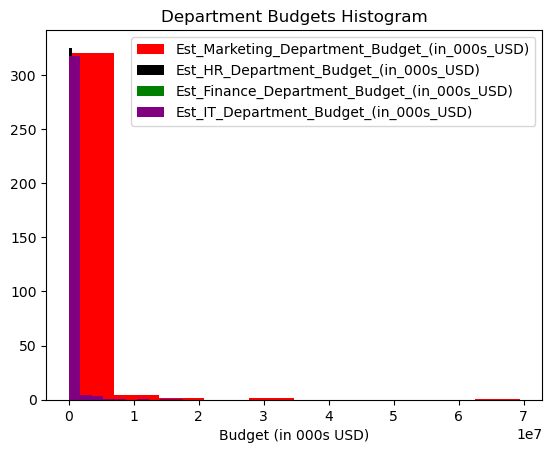

In [22]:
currentCompanyBudget = agg2ccDF[['Est_Marketing_Department_Budget_(in_000s_USD)', 'Est_HR_Department_Budget_(in_000s_USD)', 'Est_Finance_Department_Budget_(in_000s_USD)', 'Est_IT_Department_Budget_(in_000s_USD)']]
budgetData = currentCompanyBudget.values.T
                                                            
colors = ['red', 'black', 'green', 'purple']                # Defining a list of colors for each dataset
           
for i, data in enumerate(budgetData):                       # Creating a histogram for each dataset with a unique color
    plt.hist(data, bins=10, color=colors[i])

plt.title('Department Budgets Histogram')
plt.xlabel('Budget (in 000s USD)')
plt.legend(currentCompanyBudget.columns)                    # Add a legend for clarity
plt.show()

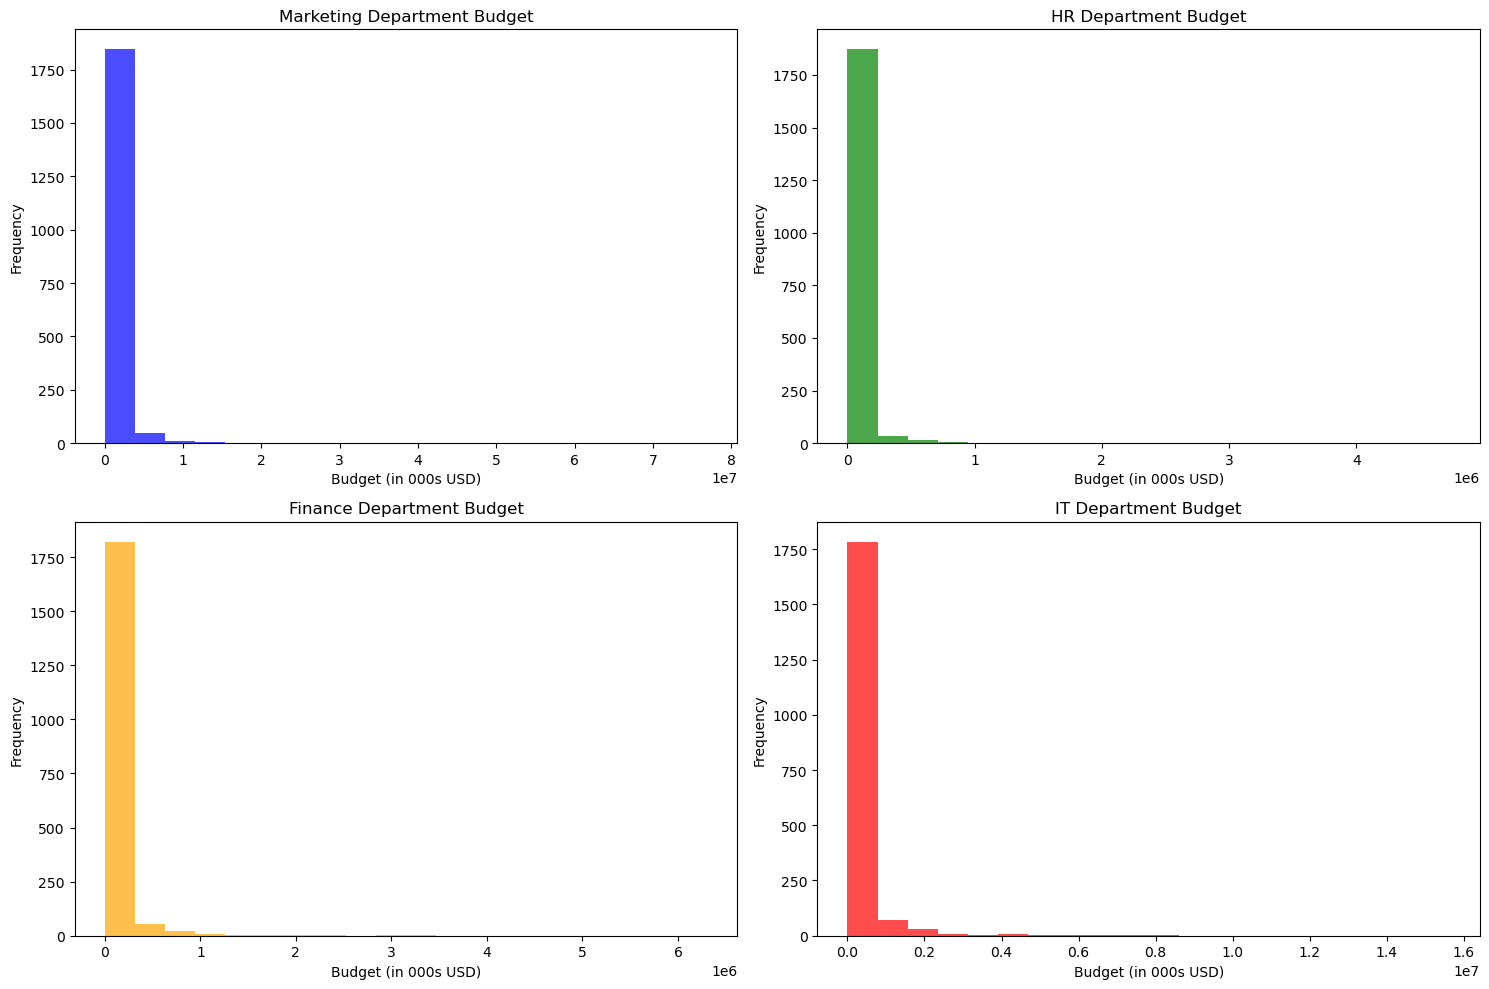

In [23]:
import matplotlib.pyplot as plt

# Selecting budget columns for prospect companies
prospectCompanyBudget = numericplDF[['Est_Marketing_Department_Budget_(in_000s_USD)', 
                                     'Est_HR_Department_Budget_(in_000s_USD)',
                                     'Est_Finance_Department_Budget_(in_000s_USD)',
                                     'Est_IT_Department_Budget_(in_000s_USD)']]

# Plotting histograms for each department's budget
plt.figure(figsize=(15, 10))

# Marketing Department Budget
plt.subplot(2, 2, 1)
plt.hist(prospectCompanyBudget['Est_Marketing_Department_Budget_(in_000s_USD)'], bins=20, color='blue', alpha=0.7)
plt.title('Marketing Department Budget')
plt.xlabel('Budget (in 000s USD)')
plt.ylabel('Frequency')

# HR Department Budget
plt.subplot(2, 2, 2)
plt.hist(prospectCompanyBudget['Est_HR_Department_Budget_(in_000s_USD)'], bins=20, color='green', alpha=0.7)
plt.title('HR Department Budget')
plt.xlabel('Budget (in 000s USD)')
plt.ylabel('Frequency')

# Finance Department Budget
plt.subplot(2, 2, 3)
plt.hist(prospectCompanyBudget['Est_Finance_Department_Budget_(in_000s_USD)'], bins=20, color='orange', alpha=0.7)
plt.title('Finance Department Budget')
plt.xlabel('Budget (in 000s USD)')
plt.ylabel('Frequency')

# IT Department Budget
plt.subplot(2, 2, 4)
plt.hist(prospectCompanyBudget['Est_IT_Department_Budget_(in_000s_USD)'], bins=20, color='red', alpha=0.7)
plt.title('IT Department Budget')
plt.xlabel('Budget (in 000s USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Scatter Plot of HR Department Budget vs Employees of Current and Prospect Customers

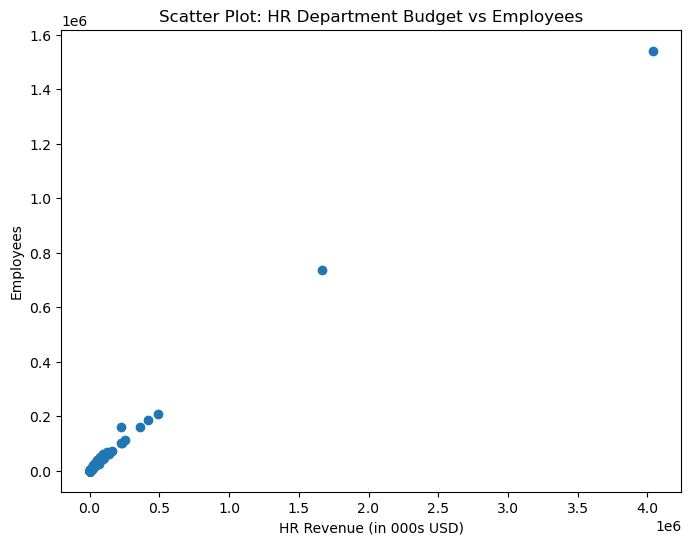

In [24]:
plt.figure(figsize=(8, 6))# Creating a figure with a specific size (8x6)
plt.scatter(agg2ccDF['Est_HR_Department_Budget_(in_000s_USD)'], agg2ccDF['Employees'])# Creating a scatter plot, with 'Est_HR_Department_Budget_(in_000s_USD)' on the x-axis and 'Employees' on the y-axis
plt.title('Scatter Plot: HR Department Budget vs Employees')# Setting the title for the scatter plot
plt.xlabel('HR Revenue (in 000s USD)')# Setting the label for the x-axis
plt.ylabel('Employees')# Setting the label for the y-axis
plt.show()# Showing the scatter plot

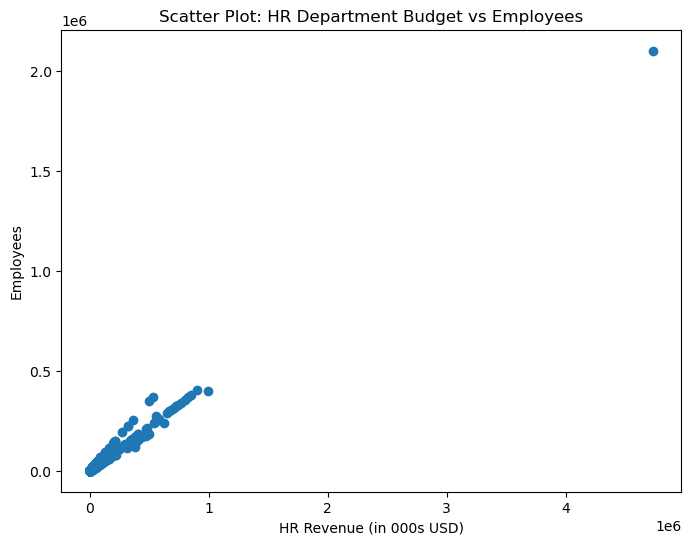

In [25]:
plt.figure(figsize=(8, 6))# Creating a figure with a specific size (8x6)
plt.scatter(numericplDF['Est_HR_Department_Budget_(in_000s_USD)'], numericplDF['Employees'])# Creating a scatter plot, with 'Est_HR_Department_Budget_(in_000s_USD)' on the x-axis and 'Employees' on the y-axis
plt.title('Scatter Plot: HR Department Budget vs Employees')# Setting the title for the scatter plot
plt.xlabel('HR Revenue (in 000s USD)')# Setting the label for the x-axis
plt.ylabel('Employees')# Setting the label for the y-axis
plt.show()# Showing the scatter plot

### EMPLOYEE GROWTH RATE - REVENUE of Current and Prospect Customers

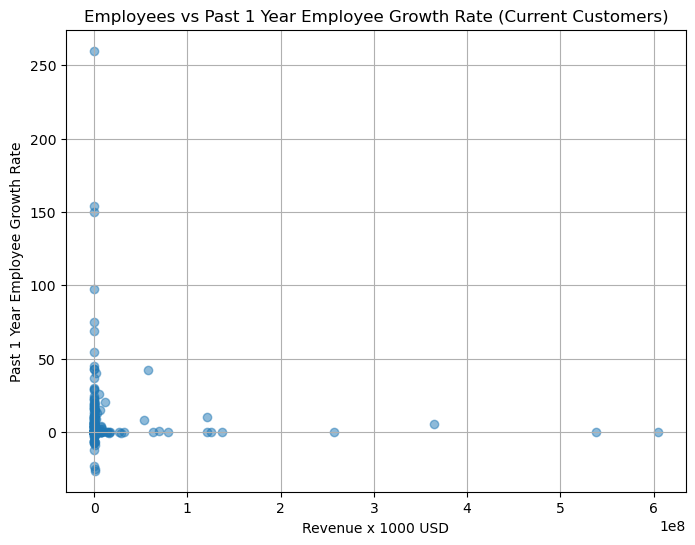

In [26]:
plt.figure(figsize=(8, 6))# Creating a figure with a specific size (8x6)
plt.scatter(agg2ccDF['Revenue_(in_000s_USD)'], agg2ccDF['Past_1_Year_Employee_Growth_Rate'], alpha=0.5)# Creating a scatter plot, with 'Revenue_(in_000s_USD)' on the x-axis and 'Past_1_Year_Employee_Growth_Rate' on the y-axis
plt.title('Employees vs Past 1 Year Employee Growth Rate (Current Customers)')# Setting the title for the scatter plot
plt.xlabel('Revenue x 1000 USD')# Setting the label for the x-axis
plt.ylabel('Past 1 Year Employee Growth Rate')# Setting the label for the y-axis
plt.grid(True)# Showing the grid on the plot
plt.show()# Showing the scatter plot

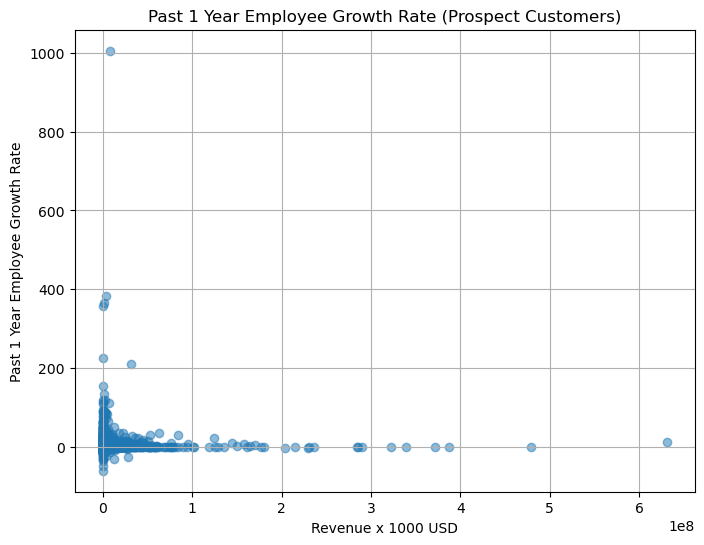

In [27]:
plt.figure(figsize=(8, 6))# Creating a figure with a specific size (8x6)
plt.scatter(numericplDF['Revenue_(in_000s_USD)'], numericplDF['Past_1_Year_Employee_Growth_Rate'], alpha=0.5)# Creating a scatter plot, with 'Revenue_(in_000s_USD)' on the x-axis and 'Past_1_Year_Employee_Growth_Rate' on the y-axis
plt.title('Past 1 Year Employee Growth Rate (Prospect Customers)')# Setting the title for the scatter plot
plt.xlabel('Revenue x 1000 USD')# Setting the label for the x-axis
plt.ylabel('Past 1 Year Employee Growth Rate')# Setting the label for the y-axis
plt.grid(True)# Showing the grid on the plot
plt.show()# Showing the scatter plot

### PAIRED PLOTS of Current and Prospect Customers

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

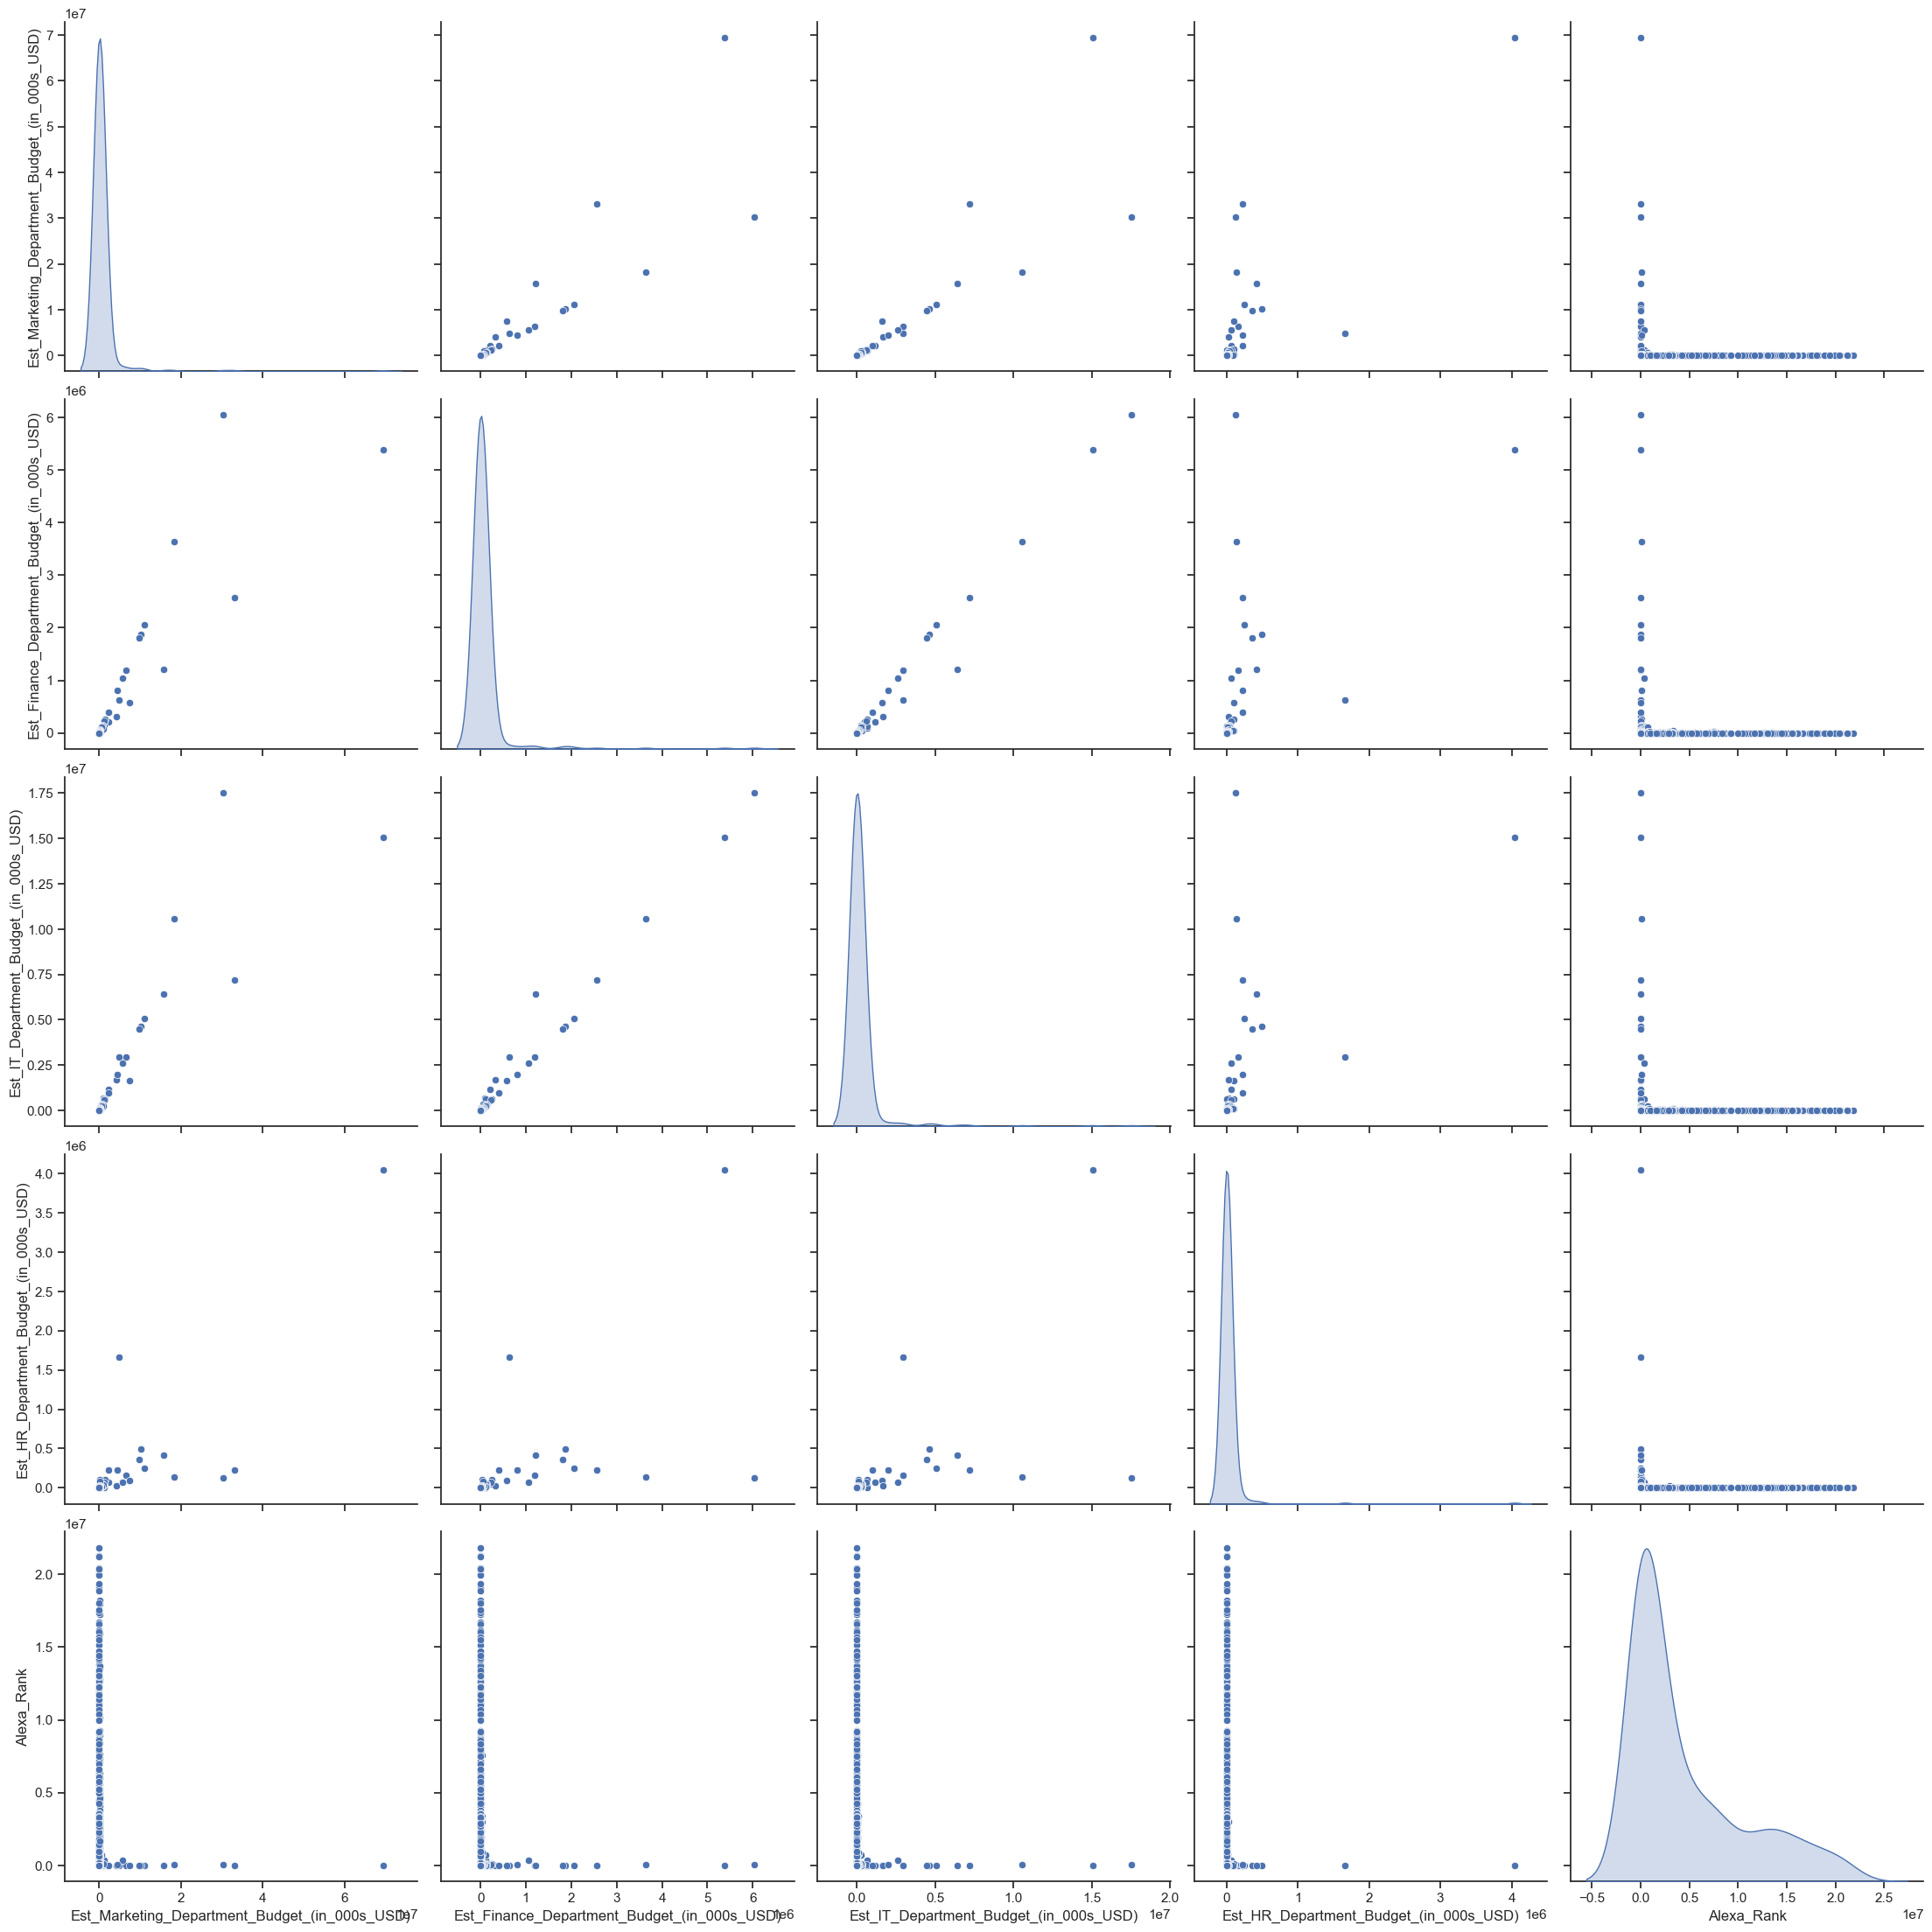

In [28]:
totalBudgetCurrentData=agg2ccDF[['Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Alexa_Rank']]# Creating a DataFrame 'totalBudgetCurrentData' containing all department budgets and alexa rank of current customers from 'agg2ccDF'
sns.set(style="ticks")# Setting the style for Seaborn pairplot as "ticks"
# Creating a pairplot using Seaborn to visualize relationships between pairs of columns in 'totalBudgetCurrentData'
# 'diag_kind="kde"' specifies that the diagonal plots should be kernel density estimates (KDEs)
# 'height=4.5' sets the height of the pairplot
sns.pairplot(totalBudgetCurrentData, diag_kind="kde", height=4.5)
plt.show() #Showing the pairplot

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

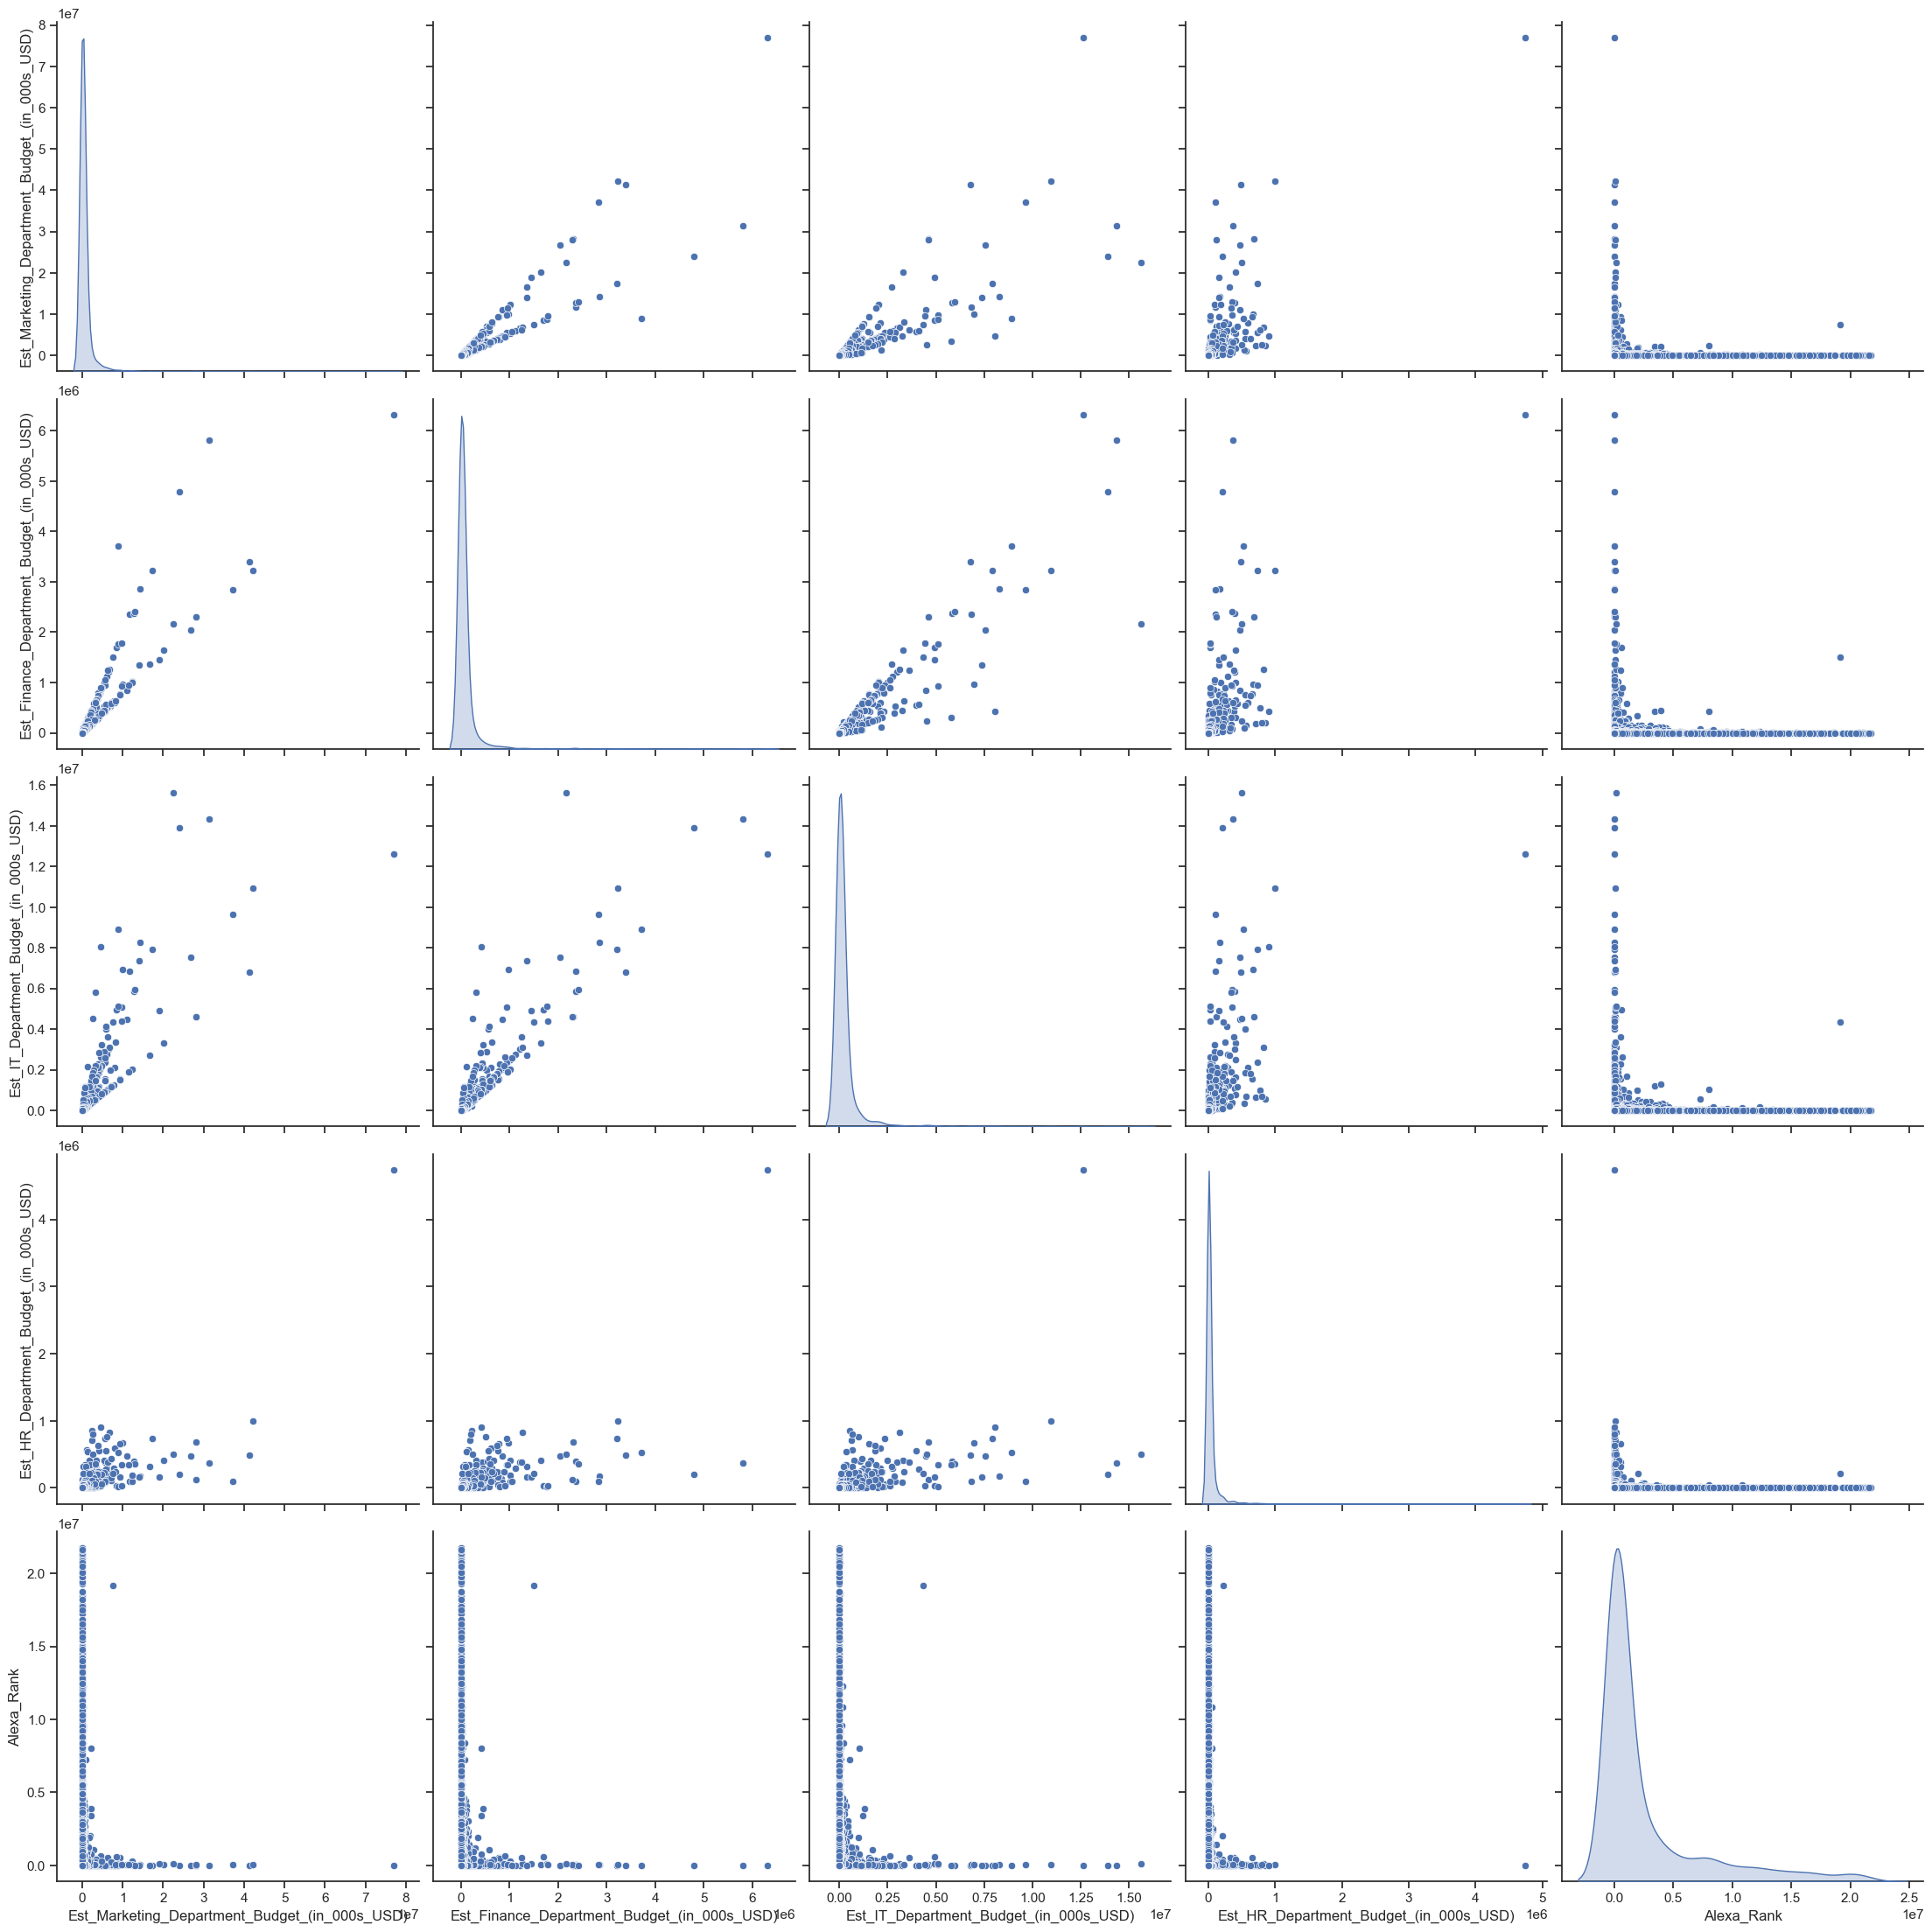

In [29]:
totalBudgetProspectData=numericplDF[['Est_Marketing_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Alexa_Rank']]# Creating a DataFrame 'totalBudgetProspecttData' containing all department budgets and alexa rank of prospect customers from 'numericplDF'
sns.set(style="ticks")# Setting the style for Seaborn pairplot as "ticks"
# Creating a pairplot using Seaborn to visualize relationships between pairs of columns in 'totalBudgetProspectData'
# 'diag_kind="kde"' specifies that the diagonal plots should be kernel density estimates (KDEs)
# 'height=4.5' sets the height of the pairplot
sns.pairplot(totalBudgetProspectData, diag_kind="kde", height=4.5)

plt.show()#Showing the pairplot

### LOCATIONS of Current and Prospect Customers

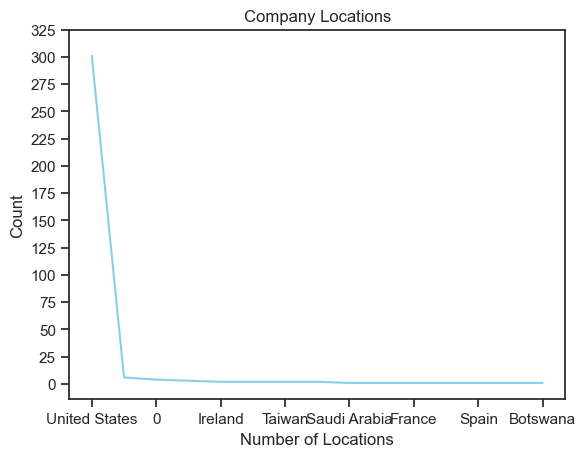

In [30]:
currentCompanylocation=aggccDF['Company_Country'].value_counts()# Counting the number of occurrences of each location for current companies
ax=currentCompanylocation.plot(kind='line', color='skyblue')# Creating a line plot to visualize the counts of locations, with a specified line color
plt.title('Company Locations')# Setting the title of the plot
# Setting labels for the x and y axes
plt.xlabel('Number of Locations')
plt.ylabel('Count')
custom_y_ticks = [0, 25, 50, 75, 100, 125,150,175,200,225,250,275,300,325] # Defining a custom list of y-axis ticks
ax.set_yticks(custom_y_ticks)# Setting the y-axis ticks to the custom list
plt.show()# Showing the plot

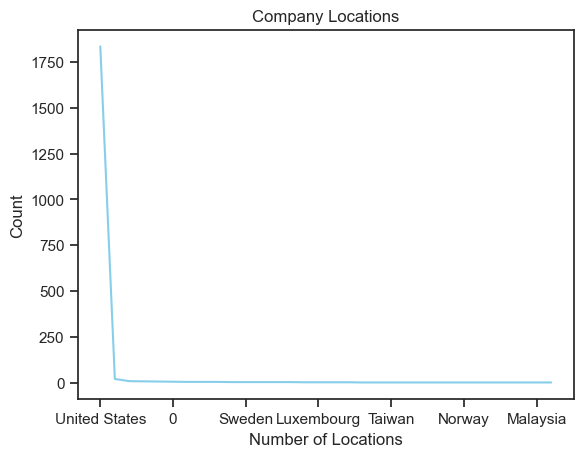

In [31]:
prospectCompanylocation=descriptiveplDF['Company_Country'].value_counts()# Counting the number of occurrences of each location for prospect companies
prospectCompanylocation.plot(kind='line', color='skyblue')# Creating a line plot to visualize the counts of locations, with a specified line color
plt.title('Company Locations')# Setting the title of the plot
# Setting labels for the x and y axes
plt.xlabel('Number of Locations')
plt.ylabel('Count')
plt.show()# Showing the plot

### EMPLOYMENT GROWTH RATE vs BUDGET of Current and Prospect Customers

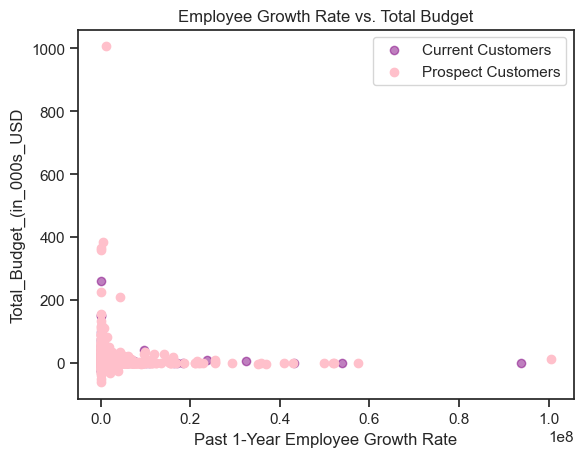

In [32]:
plt.scatter(currentresultDF['Total_Budget'], agg2ccDF['Past_1_Year_Employee_Growth_Rate'], label='Current Customers', color='purple', alpha=0.5)# Creating a scatter plot for current customers with Total Budget (in 000s USD) vs Past 1-Year Employee Growth Rate
plt.scatter(prospectresultDF['Total_Budget'], numericplDF['Past_1_Year_Employee_Growth_Rate'], label='Prospect Customers', color='pink')# Creating a scatter plot for prospect customers with Total Budget (in 000s USD) vs Past 1-Year Employee Growth Rate
# Setting labels for the x and y axes
plt.xlabel('Past 1-Year Employee Growth Rate')  
plt.ylabel('Total_Budget_(in_000s_USD')  
plt.title('Employee Growth Rate vs. Total Budget')# Setting the title of the plot
plt.legend()# Displaying the legend to distinguish between current and prospect customers
plt.show()# Showing the plot

### EMPLOYMENT GROWTH RATE vs REVENUE of Current and Prospect Customers

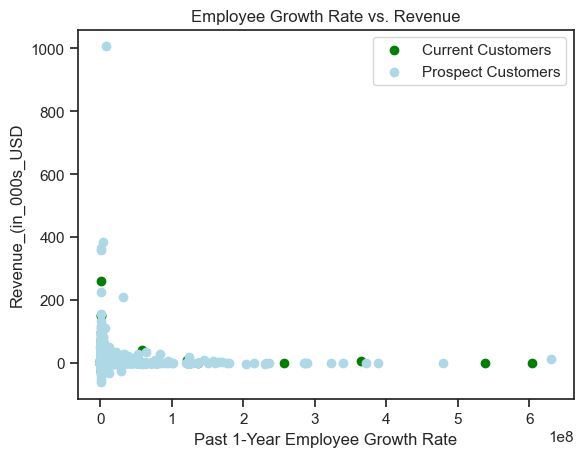

In [33]:
plt.scatter(agg2ccDF['Revenue_(in_000s_USD)'], agg2ccDF['Past_1_Year_Employee_Growth_Rate'], label='Current Customers', color='green')# Creating a scatter plot for current customers with Past 1-Year Employee Growth Rate vs Revenue
plt.scatter(numericplDF['Revenue_(in_000s_USD)'], numericplDF['Past_1_Year_Employee_Growth_Rate'], label='Prospect Customers', color='lightblue')# Creating a scatter plot for prospect customers with Past 1-Year Employee Growth Rate vs Revenue
# Setting labels for the x and y axis
plt.xlabel('Past 1-Year Employee Growth Rate')  
plt.ylabel('Revenue_(in_000s_USD') 
plt.title('Employee Growth Rate vs. Revenue')# Setting the title of the plot
plt.legend()# Displaying the legend to distinguish between current and prospect customers
plt.show()# Showing the plot

### BUDGET vs REVENUE of Current and Prospect Customers

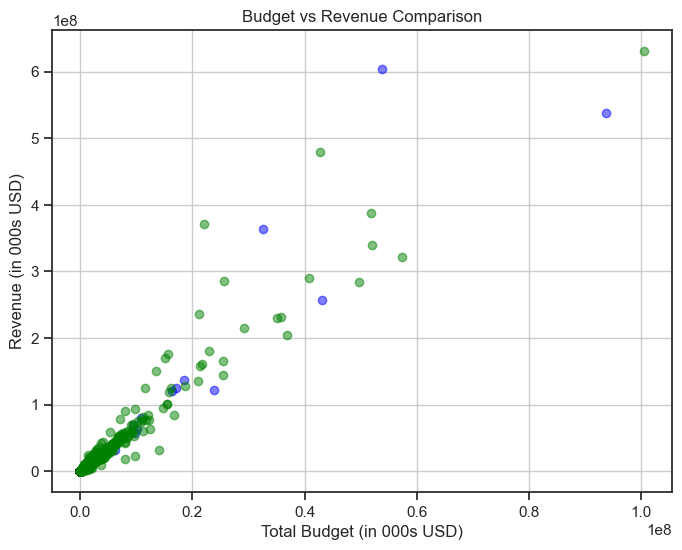

In [34]:
# Creating new variables by Extracting budget and revenue data for current customers
current_budget = currentresultDF['Total_Budget']
current_revenue = agg2ccDF['Revenue_(in_000s_USD)']  

# Creating new variables by Extracting budget and revenue data for prospect customers
prospect_budget = prospectresultDF['Total_Budget']
prospect_revenue = numericplDF['Revenue_(in_000s_USD)']

plt.figure(figsize=(8, 6))# Creating a scatter plot to compare budget vs revenue for current and prospect customers
plt.scatter(current_budget, current_revenue, color='blue', label='Current Customers', alpha=0.5)# Scatter plot for current customers in blue

plt.scatter(prospect_budget, prospect_revenue, color='green', label='Prospect Customers', alpha=0.5)# Scatter plot for prospect customers in green
#Setting the title, x-axis and y-axis label
plt.title('Budget vs Revenue Comparison')
plt.xlabel('Total Budget (in 000s USD)')
plt.ylabel('Revenue (in 000s USD)')
plt.grid(True)  
plt.show() #Displaying the scatter plot

### Distribution of Primary Industry in Current and Prospect Customers

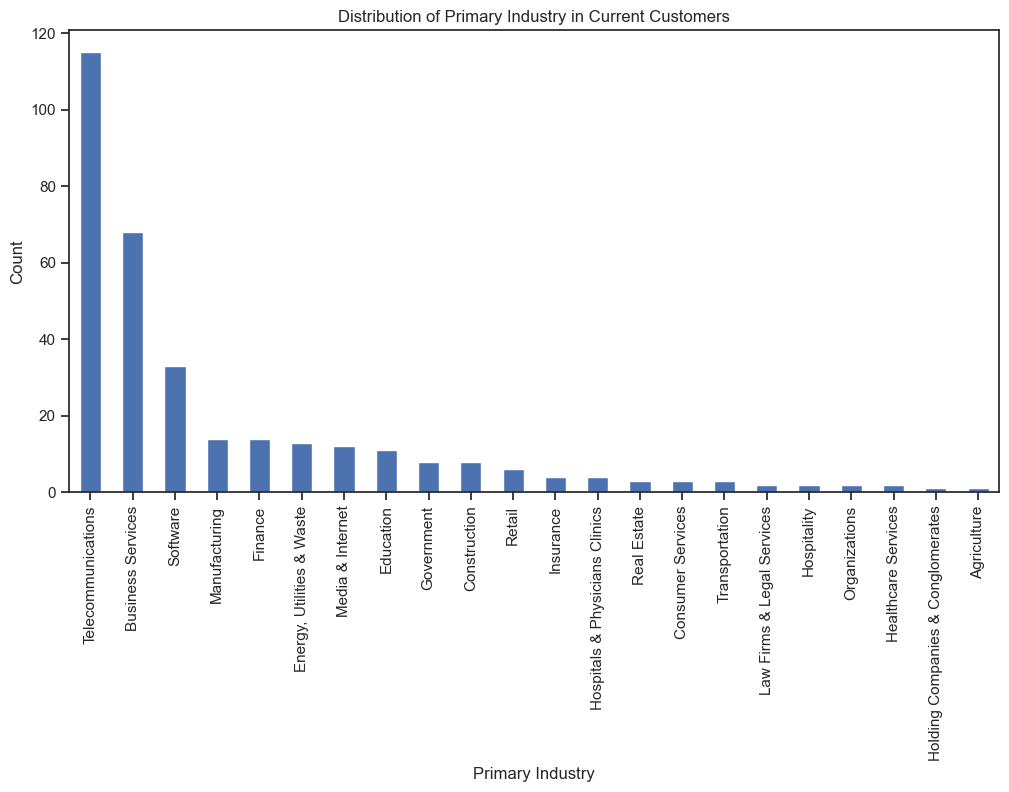

In [35]:
current_primary_industry_counts = ccDF['Primary_Industry'].value_counts()

# Plot a bar chart to visualize the distribution of Primary Industry in current customers
plt.figure(figsize=(12, 6))
current_primary_industry_counts.plot(kind='bar')
plt.title('Distribution of Primary Industry in Current Customers')
plt.xlabel('Primary Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

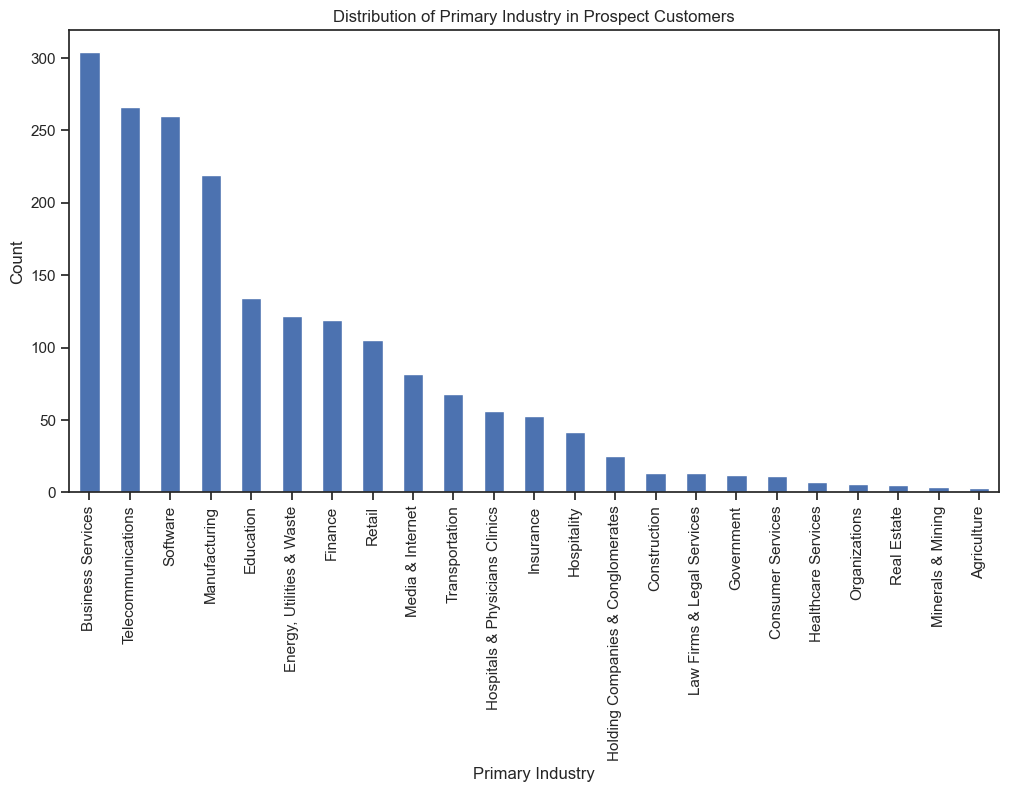

In [36]:
current_primary_industry_counts = plDF['Primary_Industry'].value_counts()

# Plot a bar chart to visualize the distribution of Primary Industry in prospect customers
plt.figure(figsize=(12, 6))
current_primary_industry_counts.plot(kind='bar')
plt.title('Distribution of Primary Industry in Prospect Customers')
plt.xlabel('Primary Industry')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Comparing Budget Ratios of all the Department of Current and Prospect Customers

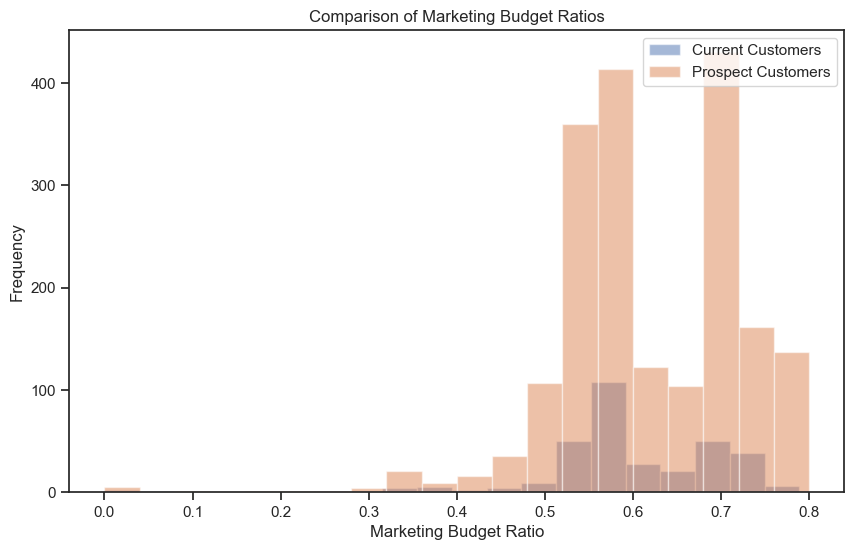

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(agg2ccDF['Marketing_Budget_Ratio'], alpha=0.5, label='Current Customers', bins=20)
plt.hist(numericplDF['Marketing_Budget_Ratio'], alpha=0.5, label='Prospect Customers', bins=20)
plt.xlabel('Marketing Budget Ratio')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Comparison of Marketing Budget Ratios')
plt.show()

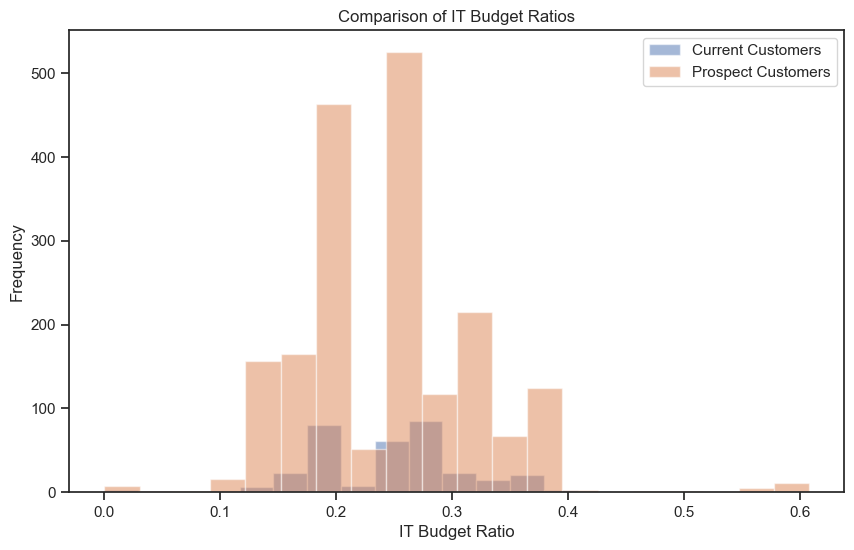

In [38]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot histograms for IT_Budget_Ratio of Current Customers and Prospect Customers
plt.hist(agg2ccDF['IT_Budget_Ratio'], alpha=0.5, label='Current Customers', bins=20)
plt.hist(numericplDF['IT_Budget_Ratio'], alpha=0.5, label='Prospect Customers', bins=20)

# Label the x-axis and y-axis
plt.xlabel('IT Budget Ratio')
plt.ylabel('Frequency')

# Add a legend in the upper right corner
plt.legend(loc='upper right')

# Set the title of the plot
plt.title('Comparison of IT Budget Ratios')

# Display the plot
plt.show()

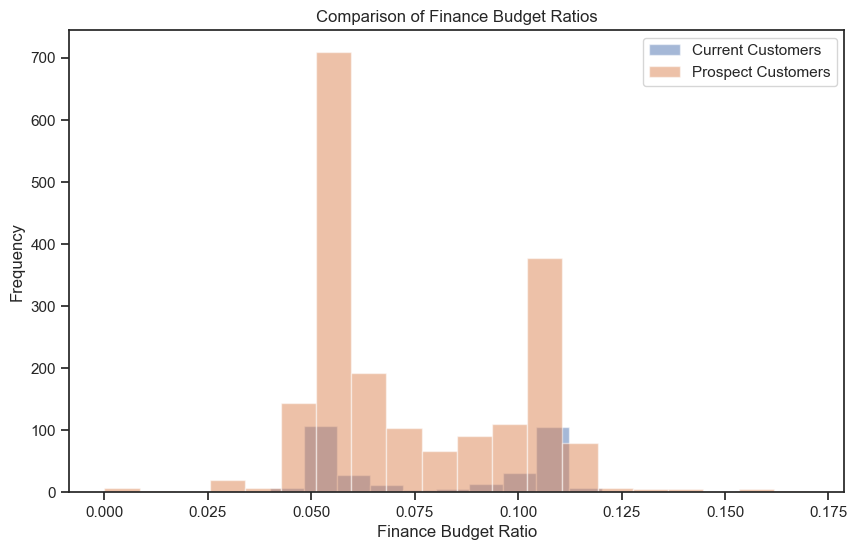

In [39]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot histograms for Finance_Budget_Ratio of Current Customers and Prospect Customers
plt.hist(agg2ccDF['Finance_Budget_Ratio'], alpha=0.5, label='Current Customers', bins=20)
plt.hist(numericplDF['Finance_Budget_Ratio'], alpha=0.5, label='Prospect Customers', bins=20)

# Label the x-axis and y-axis
plt.xlabel('Finance Budget Ratio')
plt.ylabel('Frequency')

# Add a legend in the upper right corner
plt.legend(loc='upper right')

# Set the title of the plot
plt.title('Comparison of Finance Budget Ratios')

# Display the plot
plt.show()


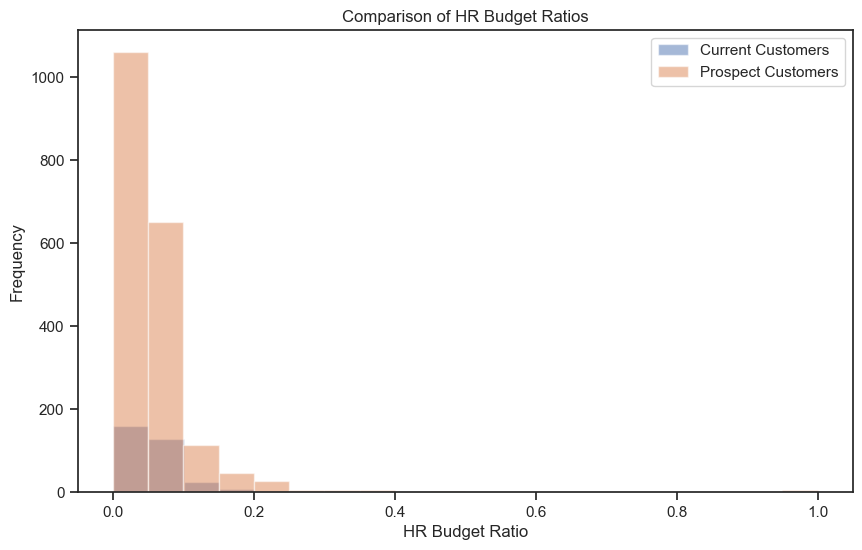

In [40]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot histograms for HR_Budget_Ratio of Current Customers and Prospect Customers
plt.hist(agg2ccDF['HR_Budget_Ratio'], alpha=0.5, label='Current Customers', bins=20)
plt.hist(numericplDF['HR_Budget_Ratio'], alpha=0.5, label='Prospect Customers', bins=20)

# Label the x-axis and y-axis
plt.xlabel('HR Budget Ratio')
plt.ylabel('Frequency')

# Add a legend in the upper right corner
plt.legend(loc='upper right')

# Set the title of the plot
plt.title('Comparison of HR Budget Ratios')

# Display the plot
plt.show()

### Displaying the Outliers of IT Budget Ratio for Current and Prospect Customers

In [41]:
# Select rows based on the specified conditions for IT_Budget_Ratio
selected_rows1 = agg2ccDF[(agg2ccDF['IT_Budget_Ratio'] >= 0.0) & (agg2ccDF['IT_Budget_Ratio'] <= 0.1)]

selected_rows1

# Create a new DataFrame with the selected rows
currentnewDF1 = selected_rows1[['CompanyID', 'IT_Budget_Ratio','Revenue_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Profit']]

# Display or use the new DataFrame
currentnewDF1

CompanyID  IT_Budget_Ratio  Revenue_(in_000s_USD)  \
90    23202721         0.000000                 252075   
132   71960561         0.030945                    518   
161  345981134         0.087848                  12013   
203   21135666         0.000000                   4043   

     Est_IT_Department_Budget_(in_000s_USD)    Profit  
90                                      0.0  249932.0  
132                                    19.0     -96.0  
161                                   120.0   10647.0  
203                                     0.0    4011.0

In [42]:

# Select rows based on the specified conditions for IT_Budget_Ratio
selected_rows2 = agg2ccDF[(agg2ccDF['IT_Budget_Ratio'] >= 0.4) & (agg2ccDF['IT_Budget_Ratio'] <= 0.7)]

# Display the selected rows
selected_rows2

# Create a new DataFrame with specific columns from the selected rows
currentnewDF2 = selected_rows2[['CompanyID', 'IT_Budget_Ratio', 'Revenue_(in_000s_USD)', 'Est_IT_Department_Budget_(in_000s_USD)', 'Profit']]

# Display or use the new DataFrame
currentnewDF2

CompanyID  IT_Budget_Ratio  Revenue_(in_000s_USD)  \
81    60558040         0.583335                 405880   
297  371626310         0.412706                  25061   

     Est_IT_Department_Budget_(in_000s_USD)    Profit  
81                                 101470.0  231932.0  
297                                   877.0   22936.0

In [43]:
selected_rows3 = numericplDF[(numericplDF['IT_Budget_Ratio'] >= 0.0) & (numericplDF['IT_Budget_Ratio'] <= 0.1)]# Select rows based on the specified conditions for IT_Budget_Ratio

selected_rows3# Display the selected rows

# Create a new DataFrame with the selected rows
prospectnewDF1 = selected_rows3[['CompanyID', 'IT_Budget_Ratio','Revenue_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Profit']]

# Display or use the new DataFrame
prospectnewDF1

CompanyID  IT_Budget_Ratio  Revenue_(in_000s_USD)  \
420    52398162         0.063107                78400.0   
581    34570613         0.000000              4108661.0   
833   370875193         0.000000               614815.0   
1025   23317950         0.000000               105023.0   
1179   12092815         0.029870                36700.0   
1452   15483029         0.000000                    0.0   
1680  397909049         0.037634                  403.0   
1702  350704995         0.000000                 3590.0   
1794  382934990         0.000000                    5.0   

      Est_IT_Department_Budget_(in_000s_USD)     Profit  
420                                   2665.0    36170.0  
581                                      0.0  3867411.0  
833                                      0.0   610914.0  
1025                                     0.0   103538.0  
1179                                   734.0    12127.0  
1452                                     0.0     -289.0  
1680                                    14.0       31.0  
1702                                     0.0     3553.0  
1794                                     0.0      -13.0

In [44]:
# Select rows based on the specified conditions for IT_Budget_Ratio
selected_rows4 = numericplDF[(numericplDF['IT_Budget_Ratio'] >= 0.4) & (numericplDF['IT_Budget_Ratio'] <= 0.70)]

selected_rows4

# Create a new DataFrame with the selected rows
prospectnewDF2 = selected_rows4[['CompanyID', 'IT_Budget_Ratio','Revenue_(in_000s_USD)','Est_IT_Department_Budget_(in_000s_USD)','Profit']]

# Display or use the new DataFrame
prospectnewDF2 

CompanyID  IT_Budget_Ratio  Revenue_(in_000s_USD)  \
22      3444162         0.403880            371510000.0   
29     36487399         0.573919             32250300.0   
84     24182874         0.592295             23182600.0   
117    93323946         0.509010              2437000.0   
118    30347697         0.574840              8634652.0   
152    84099764         0.574602             18088148.0   
212    26198600         0.417914             24400000.0   
436   297664519         0.580262              4699745.0   
503   157713259         0.583331              3382328.0   
512     7897402         0.580519              3694828.0   
590   227623271         0.577026              3382328.0   
694    29677496         0.583626              1489817.0   
712    36739880         0.605377              4537158.0   
890    31474409         0.463086               689820.0   
1010   43205367         0.608179              2000000.0   
1032  507377945         0.601619              1140768.0   
1044  129777827         0.588981               423590.0   
1073   23216845         0.554835               160820.0   
1501   24133877         0.598226               262286.0   
1574  469014210         0.604213                28225.0   

      Est_IT_Department_Budget_(in_000s_USD)       Profit  
22                                 8916240.0  349433536.0  
29                                 8062575.0   18202010.0  
84                                 5795650.0   13397523.0  
117                                 609250.0    1240068.0  
118                                2158663.0    4879409.0  
152                                4522037.0   10218282.0  
212                                 585600.0   22998756.0  
436                                1174936.0    2674909.0  
503                                 845582.0    1932752.0  
512                                 923707.0    2103654.0  
590                                 845582.0    1916913.0  
694                                 372454.0     851645.0  
712                                1134289.0    2663468.0  
890                                  24143.0     637685.0  
1010                                500000.0    1177873.0  
1032                                285192.0     666727.0  
1044                                105897.0     243793.0  
1073                                 40205.0      88357.0  
1501                                 65571.0     152677.0  
1574                                  7056.0      16547.0

### Calculating Employee Growth Rate for Current and Prospect Customers

In [45]:
# Calculate the past employee growth rate for current customers
ccDF['Employee_Growth_Rate'] = ((ccDF['Past_1_Year_Employee_Growth_Rate'] - ccDF['Past_2_Year_Employee_Growth_Rate']) / ccDF['Past_2_Year_Employee_Growth_Rate']) * 100
CurrentEmployeeGrowthRate = ['Past_1_Year_Employee_Growth_Rate','Past_2_Year_Employee_Growth_Rate','Employee_Growth_Rate']
ccDF[CurrentEmployeeGrowthRate]
# Calculate the past employee growth rate for prospect customers

Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 5.5                               7.4   
4                                 0.0                               0.0   
..                                ...                               ...   
324                               0.0                               0.0   
325                               0.0                               0.0   
326                               0.0                               0.0   
327                               0.0                               0.0   
328                               0.0                               0.0   

     Employee_Growth_Rate  
0                     NaN  
1                     NaN  
2                     NaN  
3              -25.675676  
4                     NaN  
..                    ...  
324                   NaN  
325                   NaN  
326                   NaN  
327                   NaN  
328                   NaN  

[329 rows x 3 columns]

In [46]:
# Calculate the employee growth rate based on the given formula
plDF['Employee_Growth_Rate'] = ((plDF['Past_2_Year_Employee_Growth_Rate'] - plDF['Past_1_Year_Employee_Growth_Rate']) / plDF['Past_2_Year_Employee_Growth_Rate']) * 100

# Select columns related to employee growth rate for the prospect
ProspectEmployeeGrowthRate = ['Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate', 'Employee_Growth_Rate']

# Display the selected columns for the prospect
plDF[ProspectEmployeeGrowthRate]


Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  \
0                                  0.0                               0.0   
1                                 11.2                              28.9   
2                                 -4.4                              -4.4   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
1924                               0.0                               0.0   
1925                               0.0                               0.0   
1926                               0.0                               0.0   
1927                               0.0                               0.0   
1928                              -4.8                              -4.8   

      Employee_Growth_Rate  
0                      NaN  
1                61.245675  
2                -0.000000  
3                      NaN  
4                      NaN  
...                    ...  
1924                   NaN  
1925                   NaN  
1926                   NaN  
1927                   NaN  
1928             -0.000000  

[1929 rows x 3 columns]

### Displaying the Maximum and Minimum Revenue, Budget and Profit of Current and Prospect Customers

In [47]:
# Find the index of the company with the maximum revenue
max_revenue_index = currentresultDF['Revenue_(in_000s_USD)'].idxmax()
# Find the index of the company with the minimum revenue
min_revenue_index = currentresultDF['Revenue_(in_000s_USD)'].idxmin()

# Find the index of the company with the maximum total budget
max_budget_index = currentresultDF['Total_Budget'].idxmax()
# Find the index of the company with the minimum total budget
min_budget_index = currentresultDF['Total_Budget'].idxmin()

# Find the index of the company with the maximum profit
max_profit_index = currentresultDF['Profit'].idxmax()
# Find the index of the company with the minimum profit
min_profit_index = currentresultDF['Profit'].idxmin()

# Print the results for the company with the maximum revenue
print("Max Revenue:")
print(currentresultDF.loc[max_revenue_index, ['CompanyID', 'Revenue_(in_000s_USD)']])

# Print the results for the company with the minimum revenue
print("\nMin Revenue:")
print(currentresultDF.loc[min_revenue_index, ['CompanyID', 'Revenue_(in_000s_USD)']])

# Print the results for the company with the maximum total budget
print("\nMax Current Total Budget:")
print(currentresultDF.loc[max_budget_index, ['CompanyID', 'Total_Budget']])

# Print the results for the company with the minimum total budget
print("\nMin Current Total Budget:")
print(currentresultDF.loc[min_budget_index, ['CompanyID', 'Total_Budget']])

# Print the results for the company with the maximum profit
print("\nMax Profit:")
print(currentresultDF.loc[max_profit_index, ['CompanyID', 'Profit']])

# Print the results for the company with the minimum profit
print("\nMin Profit:")
print(currentresultDF.loc[min_profit_index, ['CompanyID', 'Profit']])



Max Revenue:
CompanyID                  2555990
Revenue_(in_000s_USD)    604284257
Name: 8, dtype: object

Min Revenue:
CompanyID                32080939
Revenue_(in_000s_USD)         232
Name: 326, dtype: object

Max Current Total Budget:
CompanyID          1475361
Total_Budget    93895109.0
Name: 0, dtype: object

Min Current Total Budget:
CompanyID       21135666
Total_Budget        32.0
Name: 203, dtype: object

Max Profit:
CompanyID        2555990
Profit       550380131.0
Name: 8, dtype: object

Min Profit:
CompanyID    71960561
Profit          -96.0
Name: 132, dtype: object


In [48]:
# Find the index of the company with the maximum revenue
max_revenue_index = prospectresultDF['Revenue_(in_000s_USD)'].idxmax()
# Find the index of the company with the minimum revenue
min_revenue_index = prospectresultDF['Revenue_(in_000s_USD)'].idxmin()

# Find the index of the company with the maximum total budget
max_budget_index = prospectresultDF['Total_Budget'].idxmax()
# Find the index of the company with the minimum total budget
min_budget_index = prospectresultDF['Total_Budget'].idxmin()

# Find the index of the company with the maximum profit
max_profit_index = prospectresultDF['Profit'].idxmax()
# Find the index of the company with the minimum profit
min_profit_index = prospectresultDF['Profit'].idxmin()

# Print the results for the company with the maximum revenue
print("Max Revenue:")
print(prospectresultDF.loc[max_revenue_index, ['CompanyID', 'Revenue_(in_000s_USD)']])

# Print the results for the company with the minimum revenue
print("\nMin Revenue:")
print(prospectresultDF.loc[min_revenue_index, ['CompanyID', 'Revenue_(in_000s_USD)']])

# Print the results for the company with the maximum total budget
print("\nMax Current Total Budget:")
print(prospectresultDF.loc[max_budget_index, ['CompanyID', 'Total_Budget']])

# Print the results for the company with the minimum total budget
print("\nMin Current Total Budget:")
print(prospectresultDF.loc[min_budget_index, ['CompanyID', 'Total_Budget']])

# Print the results for the company with the maximum profit
print("\nMax Profit:")
print(prospectresultDF.loc[max_profit_index, ['CompanyID', 'Profit']])

# Print the results for the company with the minimum profit
print("\nMin Profit:")
print(prospectresultDF.loc[min_profit_index, ['CompanyID', 'Profit']])


Max Revenue:
CompanyID                  155353090
Revenue_(in_000s_USD)    630794000.0
Name: 1, dtype: object

Min Revenue:
CompanyID                15483029
Revenue_(in_000s_USD)         0.0
Name: 1452, dtype: object

Max Current Total Budget:
CompanyID         155353090
Total_Budget    100615061.0
Name: 1, dtype: object

Min Current Total Budget:
CompanyID       382934990
Total_Budget         18.0
Name: 1794, dtype: object

Max Profit:
CompanyID      155353090
Profit       530178939.0
Name: 1, dtype: object

Min Profit:
CompanyID    15483029
Profit         -289.0
Name: 1452, dtype: object


### Industry Wise Total Profit of Current and Prospect Customers

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


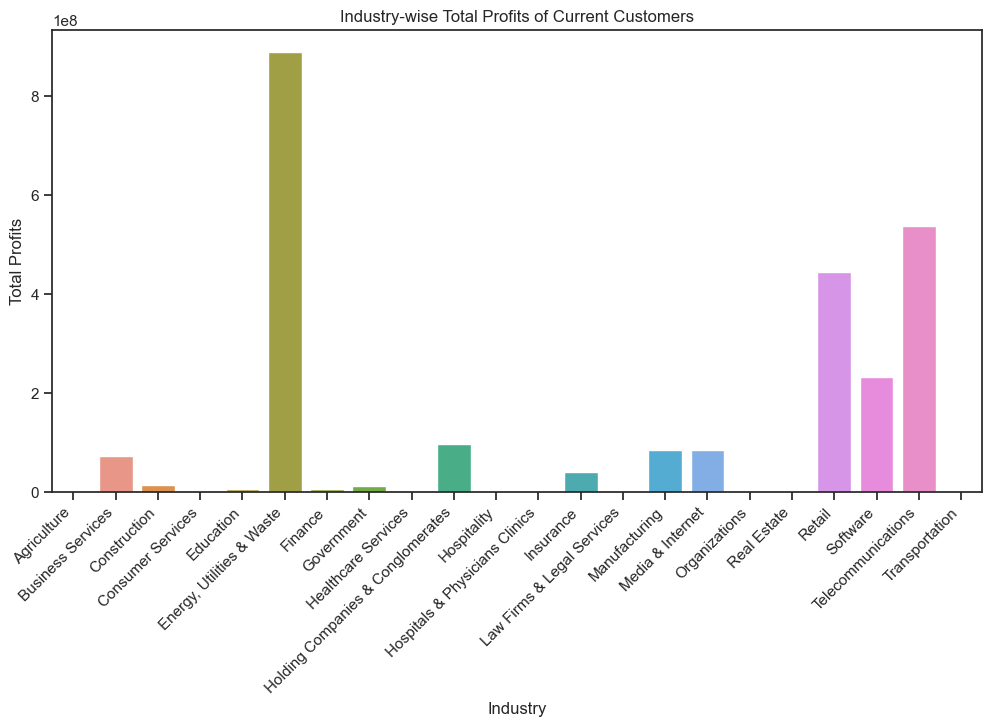

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns from plDF
ccdf = ccDF[['Profit', 'Primary_Industry']]
industry_total_profits = ccdf.groupby('Primary_Industry')['Profit'].sum().reset_index()# Group by 'Primary_Industry' and calculate the sum of profits

plt.figure(figsize=(12, 6))# Set the size of the figure
ax = sns.barplot(x='Primary_Industry', y='Profit', data=industry_total_profits)# Create a bar plot using seaborn
plt.xticks(rotation=45, ha='right')# Rotate x-axis labels for better readability
# Labeling the x-axis, y-axis, and title of the plot
plt.xlabel('Industry')
plt.ylabel('Total Profits')
plt.title('Industry-wise Total Profits of Current Customers')
plt.show()# Display the plot

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


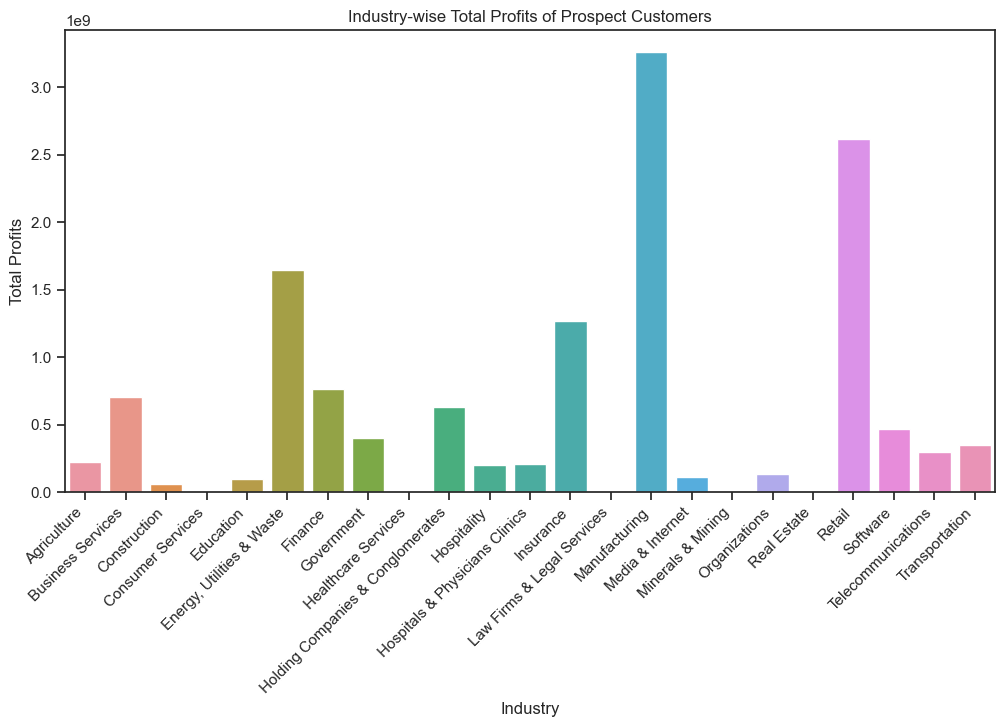

In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns from plDF
pldf = plDF[['Profit', 'Primary_Industry']]

# Group by 'Primary_Industry' and calculate the sum of profits
industry_total_profits1 = pldf.groupby('Primary_Industry')['Profit'].sum().reset_index()

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
ax = sns.barplot(x='Primary_Industry', y='Profit', data=industry_total_profits1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labeling the x-axis, y-axis, and title of the plot
plt.xlabel('Industry')
plt.ylabel('Total Profits')
plt.title('Industry-wise Total Profits of Prospect Customers')

# Display the plot
plt.show()

### Clustering of Primary Industry using Elbow Method of Current and Prospect Customers

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412:

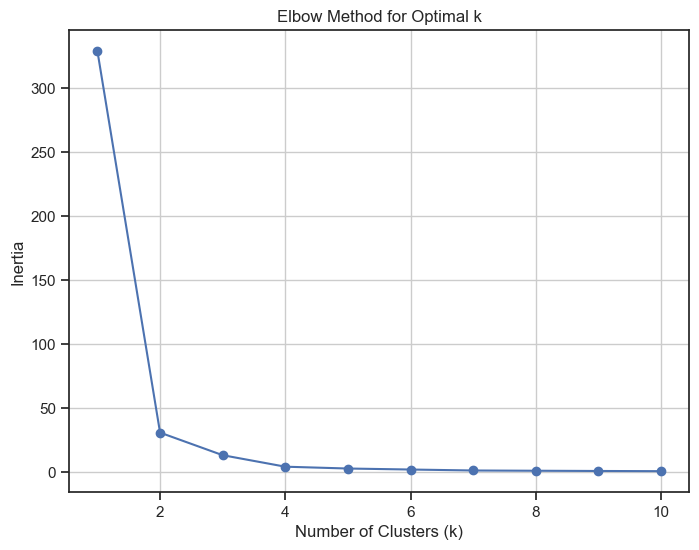

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


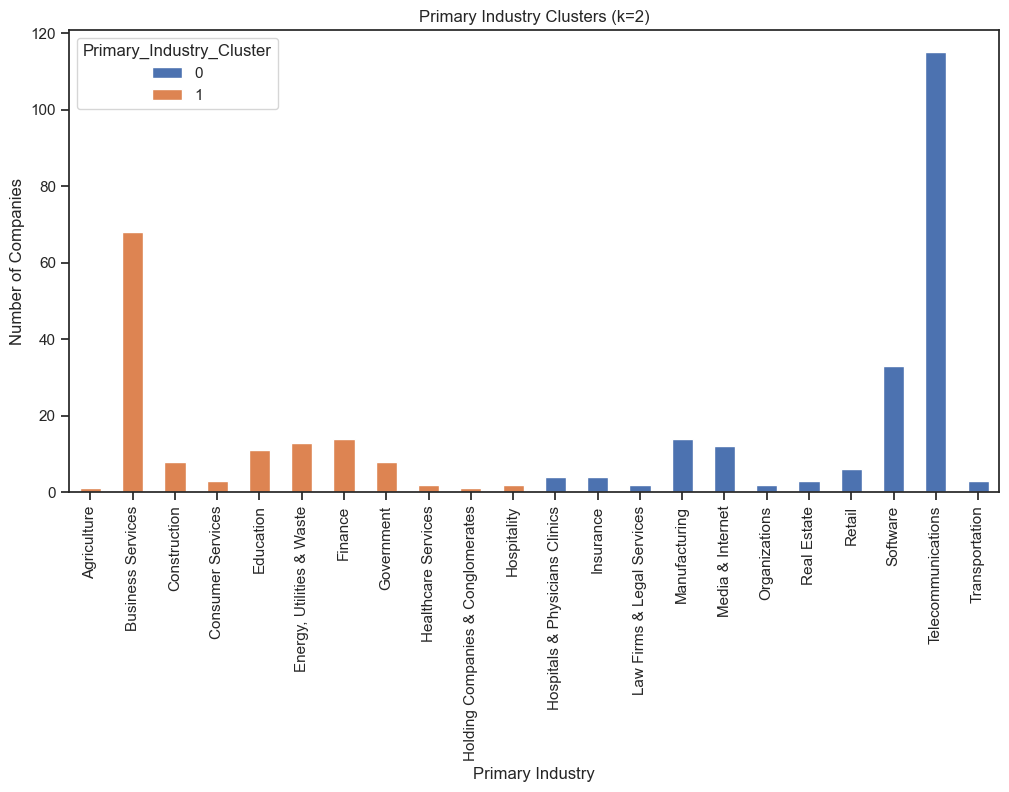

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the feature for clustering
X = ccDF[['Primary_Industry']].copy()

# Use LabelEncoder to convert categorical values to numerical values
label_encoder = LabelEncoder()
X['Primary_Industry'] = label_encoder.fit_transform(X['Primary_Industry'])

# Standardize the feature using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform the Elbow Method to determine the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=329)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal k based on the Elbow Method graph
k = 2

# Perform k-means clustering with the chosen k
kmeans = KMeans(n_clusters=k, random_state=329)
clusters = kmeans.fit_predict(X_scaled)

# Add a new column 'Primary_Industry_Cluster' to the dataframe
ccDF['Primary_Industry_Cluster'] = clusters

# Count the number of companies in each cluster for each primary industry
cluster_counts = ccDF.groupby(['Primary_Industry', 'Primary_Industry_Cluster']).size().unstack(fill_value=0)

# Plot a stacked bar chart to visualize the clusters
cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title(f'Primary Industry Clusters (k={k})')
plt.xlabel('Primary Industry')
plt.ylabel('Number of Companies')
plt.show()

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412:

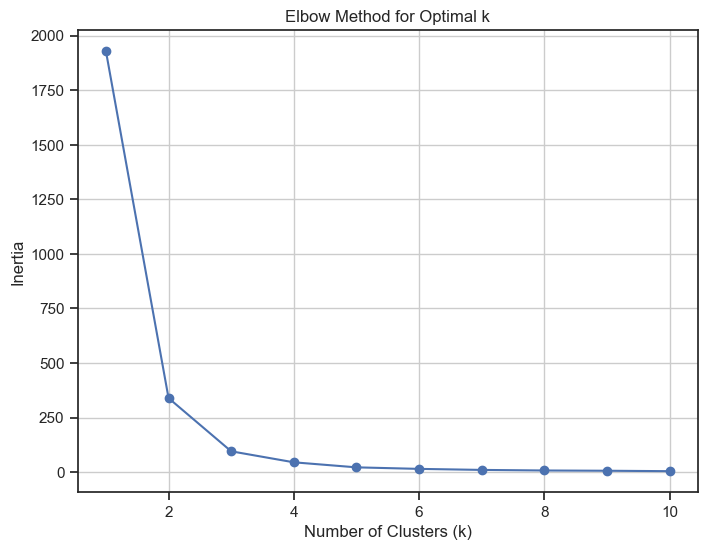

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


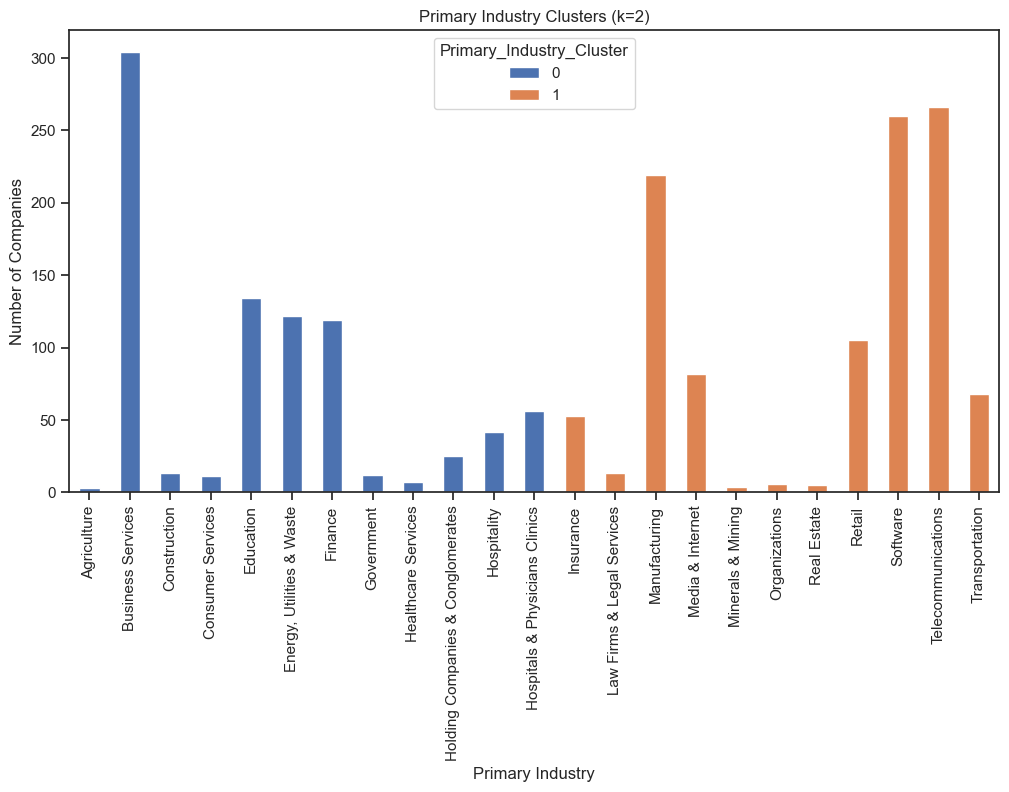

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Primary_Industry' is categorical
X1 = plDF[['Primary_Industry']].copy()

# Use LabelEncoder to convert categorical to numerical
label_encoder1 = LabelEncoder()
X1['Primary_Industry'] = label_encoder1.fit_transform(X1['Primary_Industry'])

# Standardize the data
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# Elbow Method for Optimal k
inertia1 = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(X1_scaled)
    inertia1.append(kmeans1.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia1, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal k based on the Elbow Method (e.g., k=2)
k1 = 2
kmeans1 = KMeans(n_clusters=k1, random_state=32)
clusters1 = kmeans1.fit_predict(X1_scaled)
plDF['Primary_Industry_Cluster'] = clusters1

# Visualize the clusters
cluster_counts1 = plDF.groupby(['Primary_Industry', 'Primary_Industry_Cluster']).size().unstack(fill_value=0)
cluster_counts1.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title(f'Primary Industry Clusters (k={k1})')
plt.xlabel('Primary Industry')
plt.ylabel('Number of Companies')
plt.show()

### Visualizing Alexa Rank of Current and Prospect Customers and displaying the highest and lowest Alexa Rank with Company ID

Highest Alexa Rank: 21841578.0 (Company ID: 350944369)
Lowest Alexa Rank: 0.0 (Company ID: 116244586)


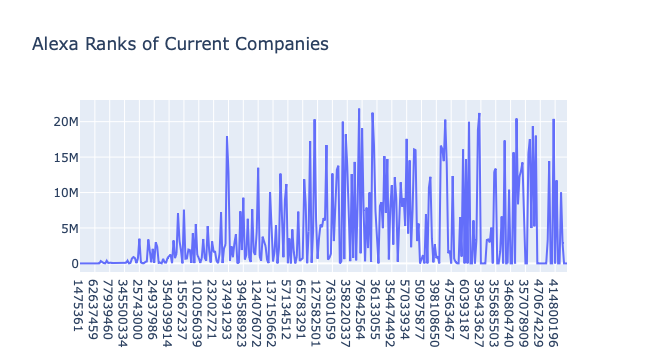

In [53]:
import plotly.offline as pyoff
import plotly.graph_objs as go

# Function to plot revenue
def plot_rev(ccDF, CompanyID, Alexa_Rank, cat, title, plot_type=go.Scatter):
    plot_data = [
        plot_type(
            x=ccDF[CompanyID],
            y=ccDF[Alexa_Rank],
        )
    ]

    plot_layout = go.Layout(
        xaxis={"type": cat},
        title=title
    )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

# Find the highest and lowest Alexa rank
highest_rank = ccDF['Alexa_Rank'].max()
lowest_rank = ccDF['Alexa_Rank'].min()

# Find the corresponding Company IDs for highest and lowest ranks
highest_rank_company_id = ccDF.loc[ccDF['Alexa_Rank'] == highest_rank, 'CompanyID'].values[0]
lowest_rank_company_id = ccDF.loc[ccDF['Alexa_Rank'] == lowest_rank, 'CompanyID'].values[0]

# Print the highest and lowest Alexa ranks with their Company IDs
print(f"Highest Alexa Rank: {highest_rank} (Company ID: {highest_rank_company_id})")
print(f"Lowest Alexa Rank: {lowest_rank} (Company ID: {lowest_rank_company_id})")

# Call the plot_rev function
plot_rev(ccDF, "CompanyID", "Alexa_Rank", "category", "Alexa Ranks of Current Companies")

Highest Alexa Rank: 21769494.0 (Company ID: 123094279)
Lowest Alexa Rank: 0.0 (Company ID: 41058369)


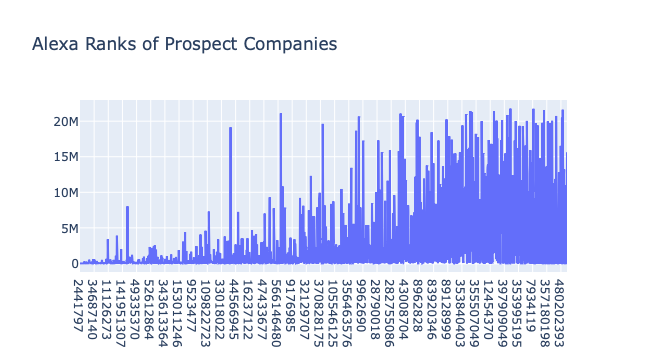

In [54]:
import plotly.offline as pyoff
import plotly.graph_objs as go

# Function to plot revenue
def plot_rev1(plDF, CompanyID, Alexa_Rank, cat, title, plot_type1=go.Scatter):
    plot_data1 = [
        plot_type1(
            x=plDF[CompanyID],  
            y=plDF[Alexa_Rank], 
        )
    ]

    plot_layout1 = go.Layout(
        xaxis={"type": cat},
        title=title
    )
    fig1 = go.Figure(data=plot_data1, layout=plot_layout1)  
    pyoff.iplot(fig1)

# Find the highest and lowest Alexa rank
highest_rank1 = plDF['Alexa_Rank'].max()
lowest_rank1 = plDF['Alexa_Rank'].min()

# Find the corresponding Company IDs for highest and lowest ranks
highest_rank_company_id1 = plDF.loc[plDF['Alexa_Rank'] == highest_rank1, 'CompanyID'].values[0] 
lowest_rank_company_id1 = plDF.loc[plDF['Alexa_Rank'] == lowest_rank1, 'CompanyID'].values[0]  

# Print the highest and lowest Alexa ranks with their Company IDs
print(f"Highest Alexa Rank: {highest_rank1} (Company ID: {highest_rank_company_id1})")
print(f"Lowest Alexa Rank: {lowest_rank1} (Company ID: {lowest_rank_company_id1})")

# Call the plot_rev function
plot_rev1(plDF, "CompanyID", "Alexa_Rank", "category", "Alexa Ranks of Prospect Companies")


### Merging the Last Month Total Billing and Lifetime Billing with Numeric Dataframe of Current Customers

In [55]:
# Merge DataFrames based on 'company ID'
merged_data_lastmonth = pd.merge(agg2ccDF,agg2cbDF[['CompanyID','Last_Month_Total']], on='CompanyID', how='inner')

# Save the merged data to a new CSV file
merged_data_lastmonth

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
323  372175531           0.0                   3951   
324  347198798        2008.0                   1654   
325   32080939        2001.0                    232   
326   39371338        2002.0                   1946   
327  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
323                                          513.0   
324                                          133.0   
325                                           18.0   
326                                          251.0   
327                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
323                                         39.0   
324                                         24.0   
325                                          3.0   
326                                         19.0   
327                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
323                                   209.0   
324                                    61.0   
325                                     8.0   
326                                    54.0   
327                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
323                                      30         13   
324                                      18          8   
325                                       4          2   
326                                      34         15   
327                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                 0.0                               0.0  ...   
1                                 0.0                               0.0  ...   
2                                 0.0                               0.0  ...   
3                                 5.5                               7.4  ...   
4                                 0.0                               0.0  ...   
..                                ...                               ...  ...   
323                               0.0                               0.0  ...   
324                               0.0                               0.0  ...   
325                               0.0                               0.0  ...   
326     

In [56]:
# Merge DataFrames based on 'CompanyID'
merged_data_lifetime = pd.merge(merged_data_lastmonth, aggcbDF[['CompanyID', 'Lifetime_Total']], on='CompanyID', how='inner')


# Replace values in 'Business_Model' and 'Ownership_Type' columns

# Display the updated DataFrame 'merged_data_lifetime'
merged_data_lifetime

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
323  372175531           0.0                   3951   
324  347198798        2008.0                   1654   
325   32080939        2001.0                    232   
326   39371338        2002.0                   1946   
327  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
323                                          513.0   
324                                          133.0   
325                                           18.0   
326                                          251.0   
327                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
323                                         39.0   
324                                         24.0   
325                                          3.0   
326                                         19.0   
327                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
323                                   209.0   
324                                    61.0   
325                                     8.0   
326                                    54.0   
327                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
323                                      30         13   
324                                      18          8   
325                                       4          2   
326                                      34         15   
327                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                 0.0                               0.0  ...   
1                                 0.0                               0.0  ...   
2                                 0.0                               0.0  ...   
3                                 5.5                               7.4  ...   
4                                 0.0                               0.0  ...   
..                                ...                               ...  ...   
323                               0.0                               0.0  ...   
324                               0.0                               0.0  ...   
325                               0.0                               0.0  ...   
326     

### Converting Categorical Columns into Numeric for Current and Prospect Customers

In [57]:
# Replace categorical values in 'Industry_Hierarchical_Category' with numerical equivalents
ccDF['Industry_Hierarchical_Category']=ccDF['Industry_Hierarchical_Category'].replace({'retail':22, 'software':1, 'bizservice':2, 'energy':3, 'telecom':4,
       'conglomerate':5, 'insurance':6, 'media':7, 'mfg':8, 'finance':9,
       'construction':10, 'government':11, 'education':12, 'realestate':13, 'legal':14,
       'hospitality':15, 'orgs':16, 'consumerservices':17, 'transportation':18,
       'healthservices':19, 'agriculture':20, 'hospitals':21})

# Convert 'Company_State' to numerical values
ccDF['Company_State']=ccDF['Company_State'].replace({'Alabama': 1, 'Andalusia': 2, 'Arizona': 3, 'Arkansas': 4, 'California': 5, 'Colorado': 6,
                                                     'Connecticut': 7, 'Delaware': 8, 'District of Columbia': 9, 'Douglas': 10, 'Eastern Province': 11, 'Florida': 12, 'Georgia': 13, 'Greater London': 14,'Ile-de-France': 15, 'Illinois': 16, 'Indiana': 17, 'Iowa': 18, 'Kansas': 19, 'Leinster': 20, 'Louisiana': 21, 'Maryland': 22,
                                                     'Massachusetts': 23, 'Michigan': 24, 'Missouri': 25, 'Nevada': 26, 'New Hampshire': 27, 'New Jersey': 28, 'New York': 29,
                                                     'Nordrhein-Westfalen': 30, 'North Carolina': 31, 'Nottinghamshire': 32, 'Ontario': 33, 'Oregon': 34, 'Pennsylvania': 35,
                                                     'Queensland': 36, 'South Dakota': 37, 'South-East': 38, 'Stockholm': 39, 'Taiwan': 40, 'Tennessee': 41, 'Texas': 42,
                                                     'Tokyo': 43, 'Virginia': 44, 'Washington': 45, 'Western Australia': 46,'Oklahoma':47 , 'Ohio':48,'Nebraska':49})

# Replace 'Employee_Range' values with numerical equivalents
ccDF['Employee_Range']=ccDF['Employee_Range'].replace({'Employees.10000plus':1,'Employees.5000to9999':2,'Employees.1000to4999':3,'Employees.500to999':4,'Employees.250to499':5,'Employees.100to249':6,'Employees.50to99':7,'Employees.20to49':8,'Employees.10to19':9,'Employees.5to9':10,'Employees.1to4':11})


ccDF['Company_Age']=2023-ccDF['Founded_Year']# Calculate 'Company_Age' based on 'Founded_Year'


# Replace 'Primary_Industry' values with numerical equivalents
ccDF['Primary_Industry']=ccDF['Primary_Industry'].replace({'Energy, Utilities & Waste':4, 'Telecommunications':5,
       'Holding Companies & Conglomerates':6, 'Insurance':7,
       'Media & Internet':8, 'Manufacturing':9, 'Finance':10, 'Construction':11,
       'Government':12, 'Education':13, 'Real Estate':14,
       'Law Firms & Legal Services':15, 'Hospitality':16, 'Organizations':17,
       'Consumer Services':18, 'Transportation':19, 'Healthcare Services':20,
       'Agriculture':21, 'Hospitals & Physicians Clinics':22,'Business Services':23,'Software':24,'Retail':1})


# Replace 'Revenue_Range_(in_USD)' values with numerical equivalents
ccDF['Revenue_Range_(in_USD)']=ccDF['Revenue_Range_(in_USD)'].replace({'Over $5 bil.':1, '$1 bil. - $5 bil.':2, '$500 mil. - $1 bil.':3,
       '$250 mil. - $500 mil.':4, '$100 mil. - $250 mil.':5,
       '$50 mil. - $100 mil.':6, '$25 mil. - $50 mil.':7,
       '$10 mil. - $25 mil.':8, '$500,000 - $1 mil.':9, '$5 mil. - $10 mil.':10,
       '$1 mil. - $5 mil.':11, 'Under $500,000':12})


# Replace 'Company_Country' values with numerical equivalents
ccDF['Company_Country']=ccDF['Company_Country'].replace({'United States':1, 'Ireland':2, 'Germany':3, 'Saudi Arabia':4,
       'United Kingdom':5, 'Sweden':6, 'Taiwan':7, 'France':8, 'Japan':9, 'Spain':10,
       'Isle of Man':11, 'Australia':12,'Canada':13, 'Botswana':14})


# Merge the two DataFrames based on the 'CompanyID' column
merged_data_lifetime = pd.merge(merged_data_lifetime, ccDF[['CompanyID','Company_State','Industry_Hierarchical_Category','Employee_Range','Company_Age','Primary_Industry','Revenue_Range_(in_USD)','Company_Country']], on='CompanyID', how='left')
merged_data_lifetime

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0      1475361        1994.0              538046000   
1     16400573        1998.0              256735000   
2       246280        1989.0               63144419   
3     43076614        1999.0              364115000   
4    126828694        1983.0              136835000   
..         ...           ...                    ...   
323  372175531           0.0                   3951   
324  347198798        2008.0                   1654   
325   32080939        2001.0                    232   
326   39371338        2002.0                   1946   
327  441325878        2013.0                    912   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                       69407934.0   
1                                       33118815.0   
2                                        4862120.0   
3                                       18205750.0   
4                                       11083635.0   
..                                             ...   
323                                          513.0   
324                                          133.0   
325                                           18.0   
326                                          251.0   
327                                          119.0   

     Est_Finance_Department_Budget_(in_000s_USD)  \
0                                      5380460.0   
1                                      2567350.0   
2                                       631444.0   
3                                      3641150.0   
4                                      2052525.0   
..                                           ...   
323                                         39.0   
324                                         24.0   
325                                          3.0   
326                                         19.0   
327                                          9.0   

     Est_IT_Department_Budget_(in_000s_USD)  \
0                                15065288.0   
1                                 7188580.0   
2                                 2967787.0   
3                                10559335.0   
4                                 5062895.0   
..                                      ...   
323                                   209.0   
324                                    61.0   
325                                     8.0   
326                                    54.0   
327                                    33.0   

     Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                   4041427    1541000   
1                                    228090     160000   
2                                   1663794     738000   
3                                    139776      62000   
4                                    253627     112500   
..                                      ...        ...   
323                                      30         13   
324                                      18          8   
325                                       4          2   
326                                      34         15   
327                                      17          6   

     Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                 0.0                               0.0  ...   
1                                 0.0                               0.0  ...   
2                                 0.0                               0.0  ...   
3                                 5.5                               7.4  ...   
4                                 0.0                               0.0  ...   
..                                ...                               ...  ...   
323                               0.0                               0.0  ...   
324                               0.0                               0.0  ...   
325                               0.0                               0.0  ...   
326     

In [58]:
plDF['Current_Customer'] = 0 # Add a new column 'Current_Customer' and set all values to 0

# Replace categorical values in 'Industry_Hierarchical_Category' with numerical equivalents
plDF['Industry_Hierarchical_Category'] = plDF['Industry_Hierarchical_Category'].replace({
    'retail': 23, 'software': 1, 'bizservice': 2, 'energy': 3, 'telecom': 4,
    'conglomerate': 5, 'insurance': 6, 'media': 7, 'mfg': 8, 'finance': 9,
    'construction': 10, 'government': 11, 'education': 12, 'realestate': 13, 'legal': 14,
    'hospitality': 15, 'orgs': 16, 'consumerservices': 17, 'transportation': 18,
    'healthservices': 19, 'agriculture': 20, 'hospitals': 21, 'mm': 22
})

# Convert 'Company_State' to numerical values
plDF['Company_State'] = pd.factorize(plDF['Company_State'])[0] + 1

# Replace 'Employee_Range' values with numerical equivalents
plDF['Employee_Range']=plDF['Employee_Range'].replace({'Employees.10000plus':1,'Employees.5000to9999':2,'Employees.1000to4999':3,'Employees.500to999':4,'Employees.250to499':5,'Employees.100to249':6,'Employees.50to99':7,'Employees.20to49':8,'Employees.10to19':9,'Employees.5to9':10,'Employees.1to4':11})

plDF['Company_Age']=2023-plDF['Founded_Year'] # Calculate 'Company_Age' based on 'Founded_Year'


# Replace 'Revenue_Range_(in_USD)' values with numerical equivalents
plDF['Revenue_Range_(in_USD)']=plDF['Revenue_Range_(in_USD)'].replace({'Over $5 bil.':1, '$1 bil. - $5 bil.':2, '$500 mil. - $1 bil.':3,
       '$250 mil. - $500 mil.':4, '$100 mil. - $250 mil.':5,
       '$50 mil. - $100 mil.':6, '$25 mil. - $50 mil.':7,
       '$10 mil. - $25 mil.':8, '$500,000 - $1 mil.':9, '$5 mil. - $10 mil.':10,
       '$1 mil. - $5 mil.':11, 'Under $500,000':12})

# Replace 'Primary_Industry' values with numerical equivalents
plDF['Primary_Industry']=plDF['Primary_Industry'].replace({'Energy, Utilities & Waste':4, 'Telecommunications':5,
       'Holding Companies & Conglomerates':6, 'Insurance':7,
       'Media & Internet':8, 'Manufacturing':9, 'Finance':10, 'Construction':11,
       'Government':12, 'Education':13, 'Real Estate':14,
       'Law Firms & Legal Services':15, 'Hospitality':16, 'Organizations':17,
       'Consumer Services':18, 'Transportation':19, 'Healthcare Services':20,
       'Agriculture':21, 'Hospitals & Physicians Clinics':22,'Business Services':23,'Software':24,'Retail':1,'Minerals & Mining':2})

# Replace 'Company_Country' values with numerical equivalents
plDF['Company_Country']=plDF['Company_Country'].replace({'United States': 1,
    'United Kingdom': 2,
    'Canada': 3,
    'Germany': 4,
    'India': 5,
    'Australia': 6,
    'China': 7,
    'Japan': 8,
    'Sweden': 9,
    'Netherlands': 10,
    'France': 11,
    'Switzerland': 12,
    'Israel': 13,
    'Mexico': 14,
    'Norway': 15,
    'Luxembourg': 16,
    'South Korea': 17,
    'Finland': 18,
    'Italy': 19,
    'Denmark': 20,
    'Malta': 21,
    'Philippines': 22,
    'Panama': 23,
    'Thailand': 24,
    'Belgium': 25,
    'Malaysia': 26,
    'Taiwan': 27,
    'Vietnam': 28,
    'Guam': 29,
    'Bulgaria': 30,
    'Mauritius': 31,
})



numericplDF = pd.merge(numericplDF, plDF[['CompanyID', 'Current_Customer', 'Industry_Hierarchical_Category', 'Company_State','Company_Country','Primary_Industry','Company_Age','Revenue_Range_(in_USD)','Employee_Range']], on='CompanyID', how='left') #Merging two dataframes

numericplDF

CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
0       2441797        1976.0            387537000.0   
1     155353090        1962.0            630794000.0   
2      24904409        1975.0            204094000.0   
3      10256729        1963.0            339204000.0   
4     141738322        1938.0            214420431.0   
...         ...           ...                    ...   
1924  398742609        2014.0                 1643.0   
1925   30344865        1932.0                 1204.0   
1926  478996006        2019.0                  956.0   
1927  500997527        2002.0                 1144.0   
1928  371347594        2011.0                22771.0   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                        31390497.0   
1                                        76956868.0   
2                                        26736314.0   
3                                        41382888.0   
4                                        17368054.0   
...                                             ...   
1924                                          215.0   
1925                                          156.0   
1926                                          125.0   
1927                                           92.0   
1928                                         2983.0   

      Est_Finance_Department_Budget_(in_000s_USD)  \
0                                       5813055.0   
1                                       6307940.0   
2                                       2040940.0   
3                                       3392040.0   
4                                       3216306.0   
...                                           ...   
1924                                         16.0   
1925                                         12.0   
1926                                          9.0   
1927                                         17.0   
1928                                        227.0   

      Est_IT_Department_Budget_(in_000s_USD)  \
0                                 14338869.0   
1                                 12615880.0   
2                                  7551478.0   
3                                  6784080.0   
4                                  7933555.0   
...                                      ...   
1924                                    57.0   
1925                                    63.0   
1926                                    33.0   
1927                                    42.0   
1928                                   842.0   

      Est_HR_Department_Budget_(in_000s_USD)  Employees  \
0                                     369732     164000   
1                                    4734373    2100000   
2                                     475335     210842   
3                                     482455     214000   
4                                     729557     323606   
...                                      ...        ...   
1924                                      11          5   
1925                                      14          6   
1926                                      17          6   
1927                                      11          5   
1928                                     167         60   

      Past_1_Year_Employee_Growth_Rate  Past_2_Year_Employee_Growth_Rate  ...  \
0                                  0.0                               0.0  ...   
1                                 11.2                              28.9  ...   
2                                 -4.4                              -4.4  ...   
3                                  0.0                               0.0  ...   
4                                  0.0                               0.0  ...   
...                                ...                               ...  ...   
1924                               0.0                               0.0  ...   
1925                               0.0                               0.0  ...   
1926                

### Calculating Standard Deviation of Each Feature of Current and Prospect Customers

In [59]:
import pandas as pd

# Assuming merged_data_lifetime is your DataFrame
std_deviation_per_feature = merged_data_lifetime.std()

# Display the standard deviation for each feature
print("Standard Deviation for Each Feature:")
print(std_deviation_per_feature)

Standard Deviation for Each Feature:
CompanyID                                        1.852784e+08
Founded_Year                                     4.544998e+02
Revenue_(in_000s_USD)                            5.295143e+07
Est_Marketing_Department_Budget_(in_000s_USD)    4.866513e+06
Est_Finance_Department_Budget_(in_000s_USD)      5.504346e+05
Est_IT_Department_Budget_(in_000s_USD)           1.580213e+06
Est_HR_Department_Budget_(in_000s_USD)           2.454939e+05
Employees                                        9.672104e+04
Past_1_Year_Employee_Growth_Rate                 2.159328e+01
Past_2_Year_Employee_Growth_Rate                 2.800197e+01
Alexa_Rank                                       5.886940e+06
Total_Funding_Amount_(in_000s_USD)               3.034357e+06
Number_of_Locations                              2.740733e+01
Total Budget                                     7.038570e+06
Profit                                           4.631279e+07
Marketing_Budget_Ratio           

In [60]:
import pandas as pd

# Assuming merged_data_lifetime is your DataFrame
std_deviation_per_feature = numericplDF.std()

# Display the standard deviation for each feature
print("Standard Deviation for Each Feature:")
print(std_deviation_per_feature)

Standard Deviation for Each Feature:
CompanyID                                        1.622255e+08
Founded_Year                                     2.441625e+02
Revenue_(in_000s_USD)                            3.308181e+07
Est_Marketing_Department_Budget_(in_000s_USD)    3.216623e+06
Est_Finance_Department_Budget_(in_000s_USD)      3.552487e+05
Est_IT_Department_Budget_(in_000s_USD)           1.049783e+06
Est_HR_Department_Budget_(in_000s_USD)           1.403078e+05
Employees                                        6.312485e+04
Past_1_Year_Employee_Growth_Rate                 3.124728e+01
Past_2_Year_Employee_Growth_Rate                 3.056756e+01
Alexa_Rank                                       4.622583e+06
Total_Funding_Amount_(in_000s_USD)               1.818655e+06
Number_of_Locations                              1.176774e+02
Total Budget                                     4.576070e+06
Profit                                           2.870274e+07
Marketing_Budget_Ratio           

### Creating a Correlation Matrix for the Current and Prospect Customers

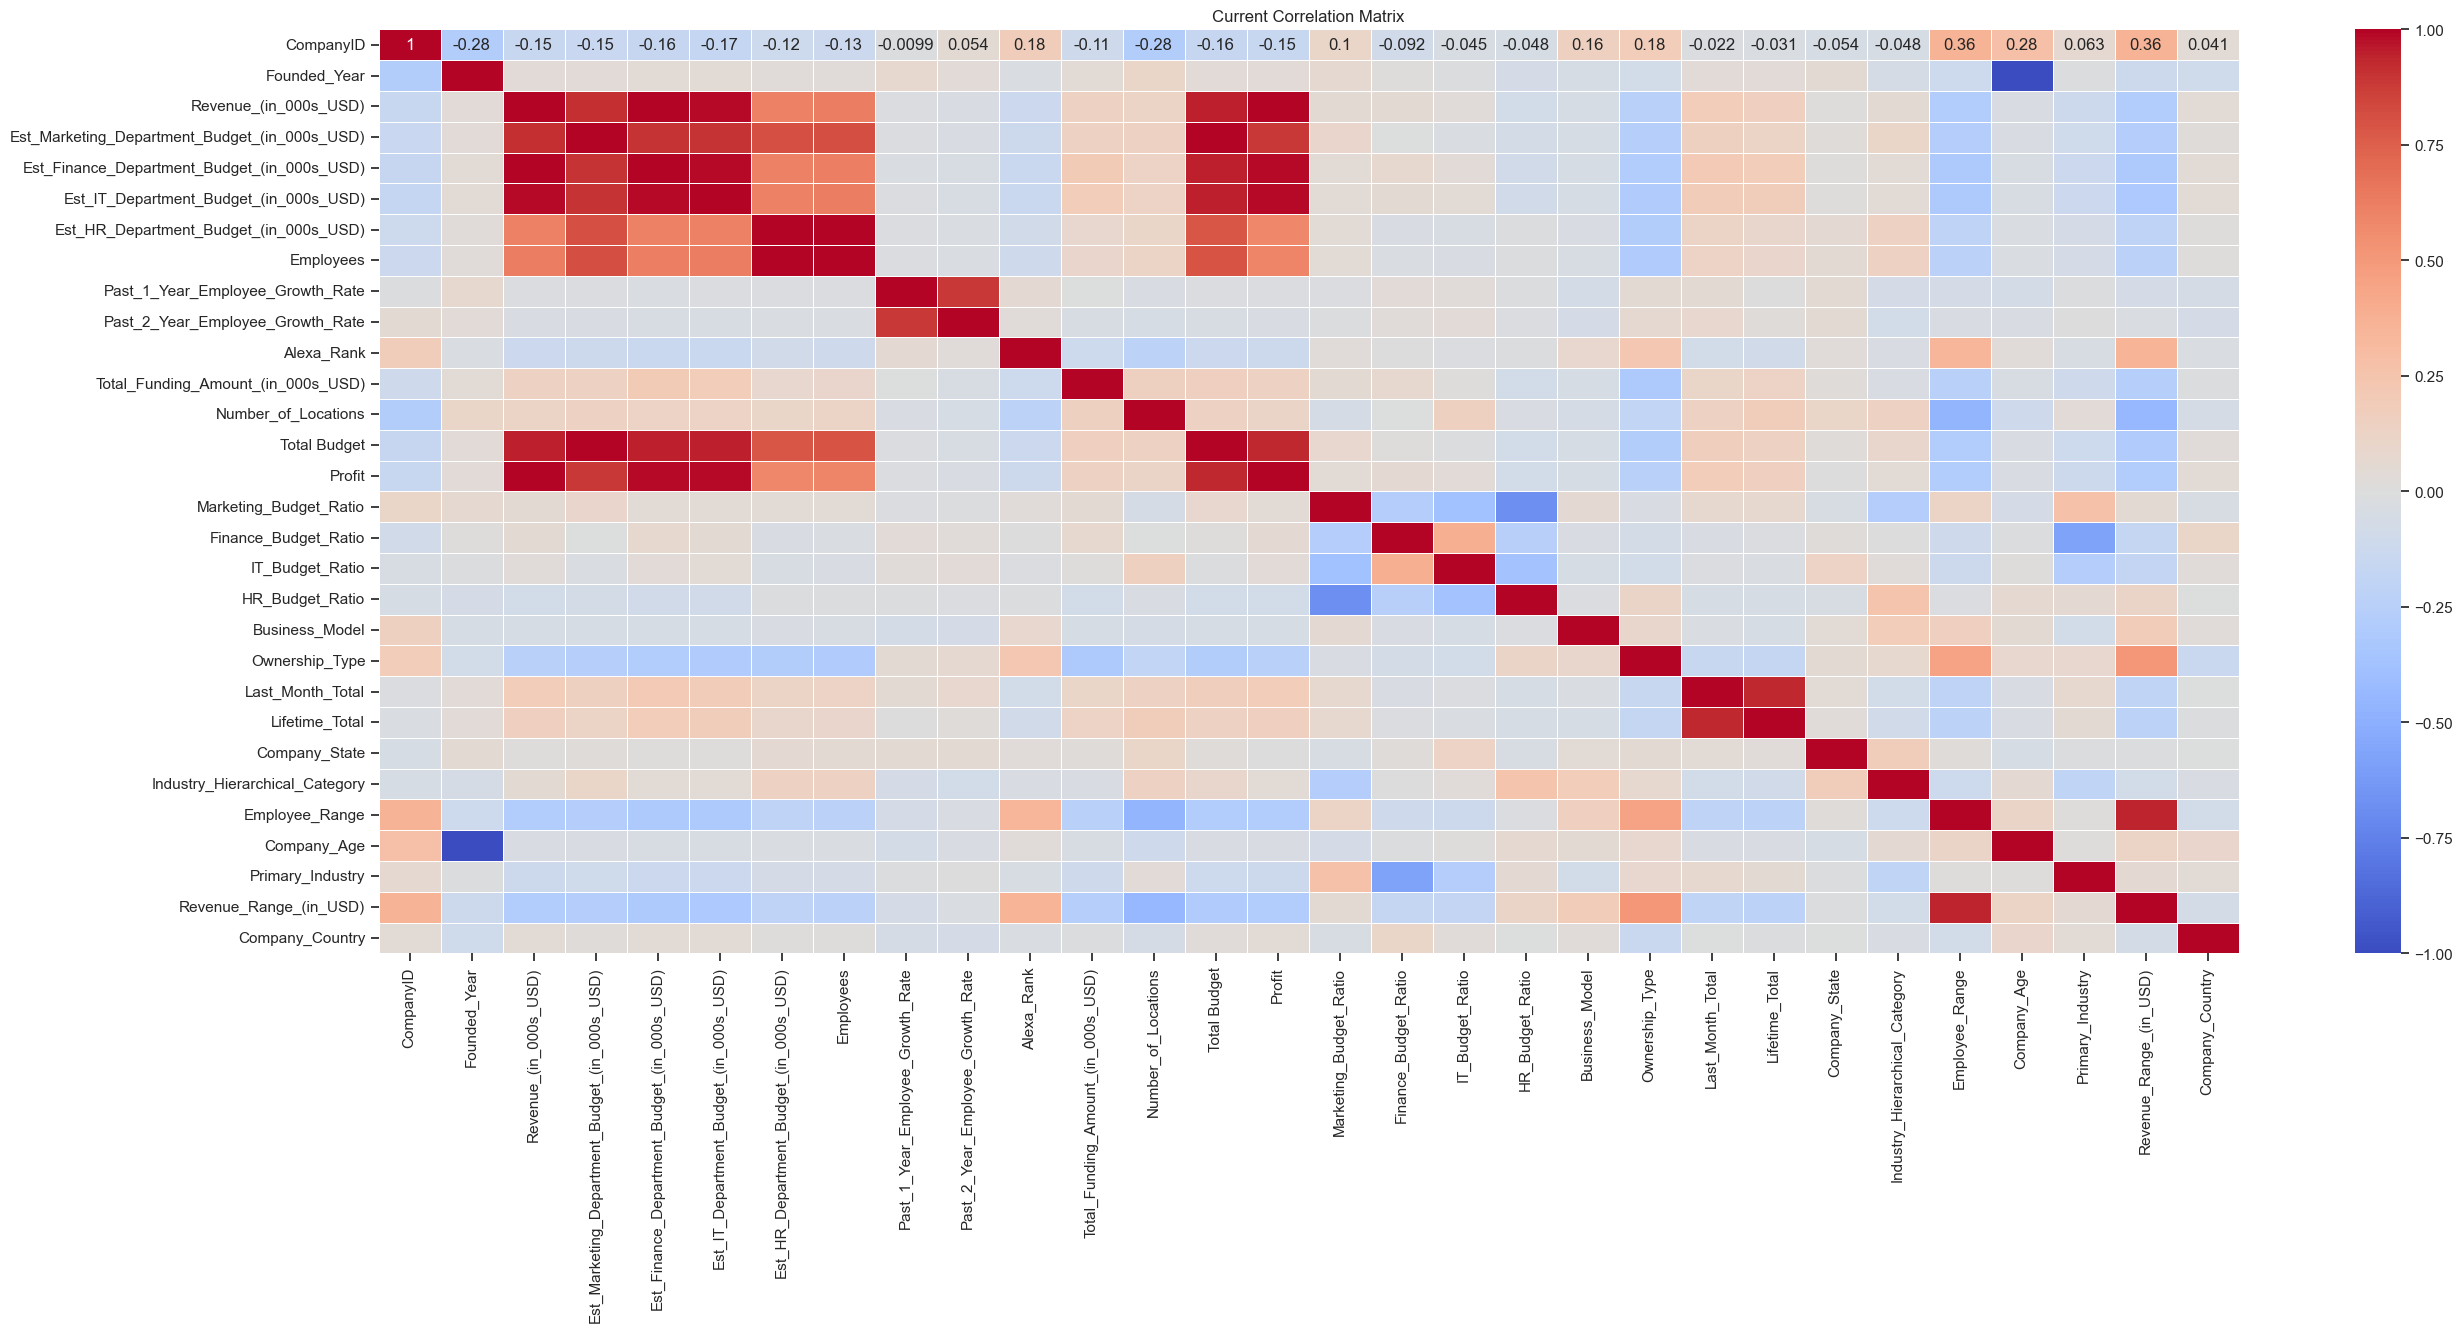

In [61]:
CurrentcorrelationMatrix = merged_data_lifetime.corr()# Calculating the correlation matrix for the 'agg2ccDF' DataFrame
CurrentcorrelationMatrix # Displaying the resulting correlation matrix
plt.figure(figsize=(30, 12)) # Creating a figure with a specific size for the heatmap plot
sns.heatmap(CurrentcorrelationMatrix, annot=True, cmap='coolwarm', linewidths=0.5) # Generating a heatmap of the correlation matrix with annotations, using the 'coolwarm' color map and setting linewidth for separation
plt.title('Current Correlation Matrix') # Setting the title of the heatmap plot
plt.show() # Showing the heatmap plot

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



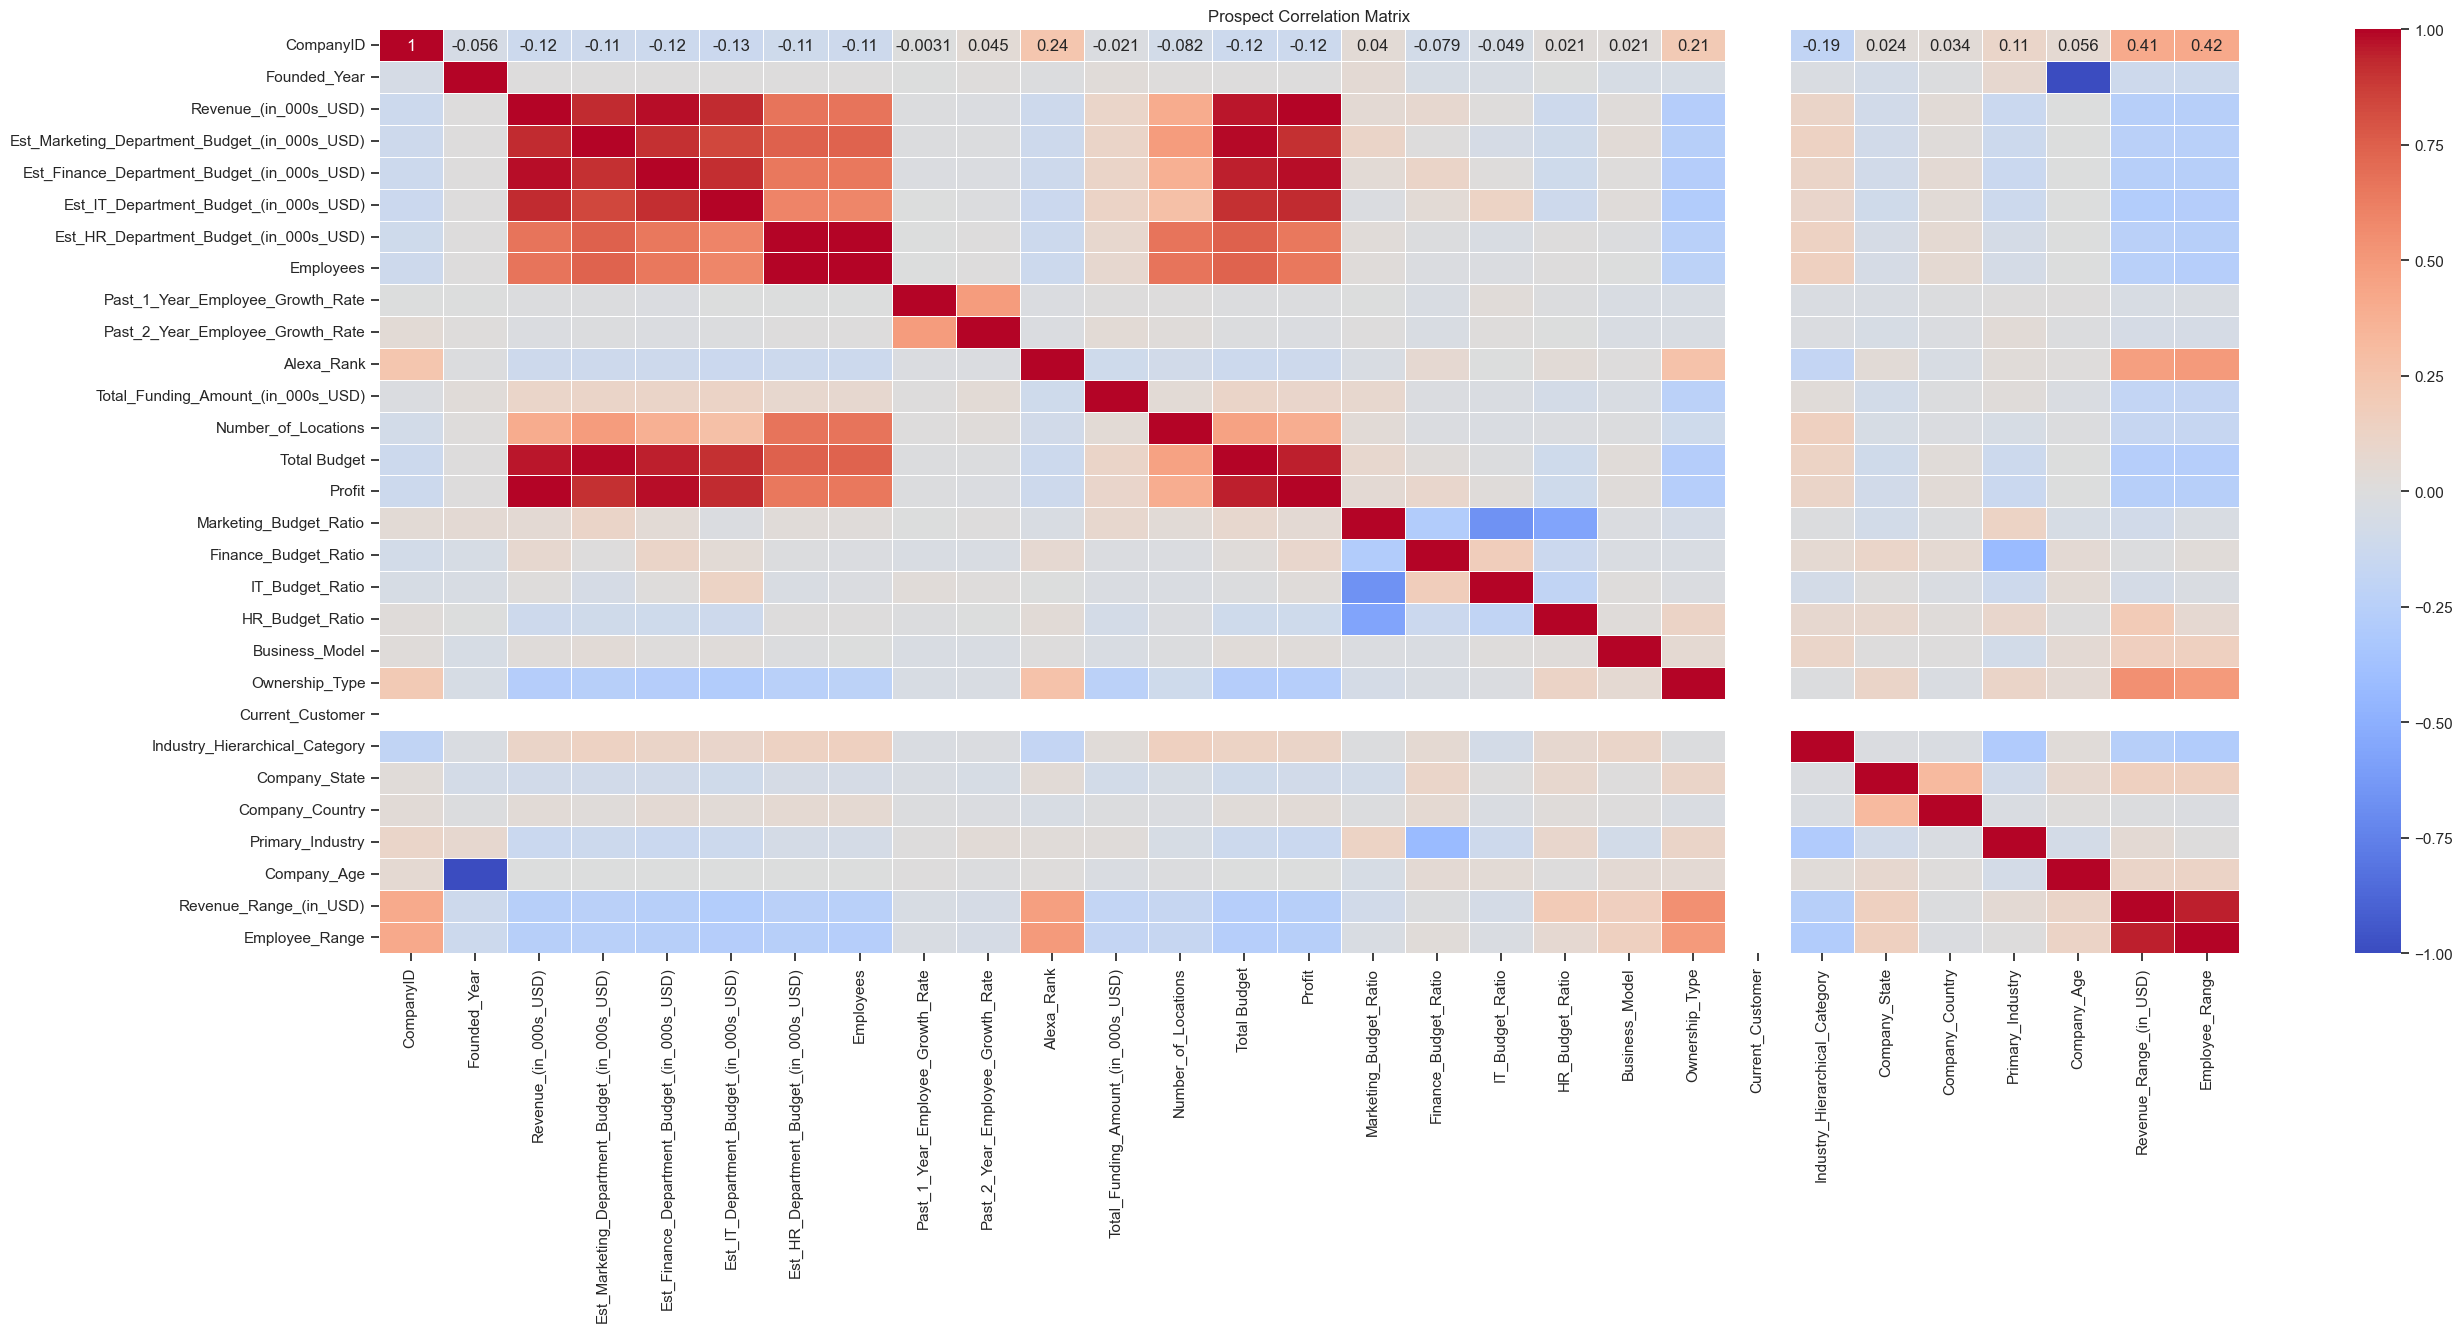

In [62]:
ProspectcorrelationMatrix = numericplDF.corr()# Calculating the correlation matrix for the 'agg2ccDF' DataFrame
ProspectcorrelationMatrix # Displaying the resulting correlation matrix
plt.figure(figsize=(30, 12)) # Creating a figure with a specific size for the heatmap plot
sns.heatmap(ProspectcorrelationMatrix, annot=True, cmap='coolwarm', linewidths=0.5) # Generating a heatmap of the correlation matrix with annotations, using the 'coolwarm' color map and setting linewidth for separation
plt.title('Prospect Correlation Matrix') # Setting the title of the heatmap plot
plt.show() # Showing the heatmap plot

### Logistic Regression for Current Customers using Business Model as Target Variable

Accuracy: 0.898989898989899
Confusion Matrix:
[[89  0]
 [10  0]]
Cross-Validation Accuracy: 0.9024708624708625


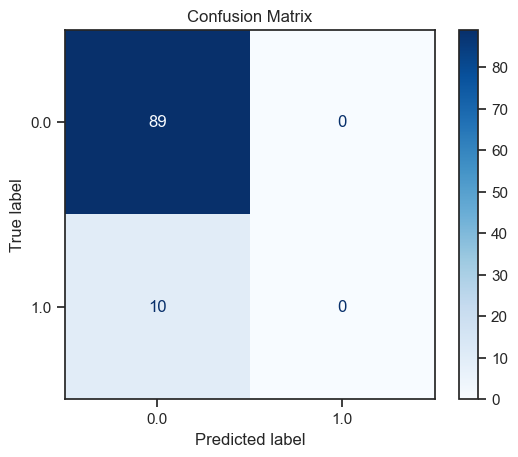

In [63]:
#Importing all necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Extracting features and target variable
features = merged_data_lifetime[['Revenue_(in_000s_USD)', 'Total Budget', 'Profit']]  
target = merged_data_lifetime['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Cross-validation
cv_accuracy = cross_val_score(model, features, target, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_accuracy.mean()}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression for Prospect Customers using Business Model as Target Variable

Accuracy: 0.9309153713298791
Confusion Matrix:
[[537   6]
 [ 34   2]]
Cross-Validation Accuracy: 0.9326074961308122


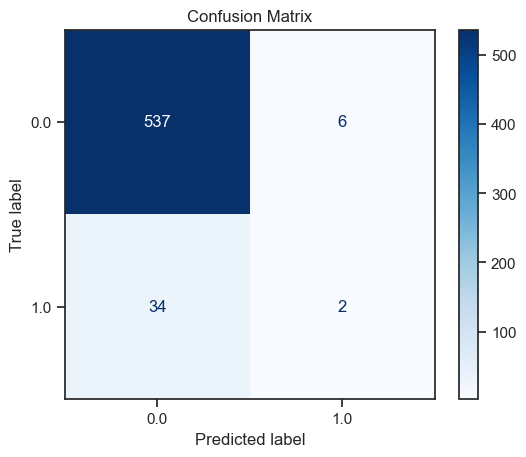

In [64]:
#Importing all necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Extracting features and target variable
features1 = numericplDF[['Revenue_(in_000s_USD)', 'Total Budget', 'Profit']]  # Using relevant features
target1 = numericplDF['Business_Model'].replace({'B2B': 0, 'B2C': 1})

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features1, target1, test_size=0.3, random_state=42)

# Creating and training the Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Making predictions on the test set
predictions1 = model1.predict(X_test)

# Evaluating the model
accuracy1 = accuracy_score(y_test, predictions1)
conf_matrix1 = confusion_matrix(y_test, predictions1)

#Printing the Accuracy and the Confusion Matrix
print(f'Accuracy: {accuracy1}')
print('Confusion Matrix:')
print(conf_matrix1)
cv_accuracy1 = cross_val_score(model1, features1, target1, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_accuracy1.mean()}')

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=model.classes_)
disp1.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Decision tree Regressor for Current Customers using Ownership Type as Target Variable

In [65]:
#Importing all necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Extracting features and target variable
features = merged_data_lifetime[['Est_IT_Department_Budget_(in_000s_USD)', 'Revenue_(in_000s_USD)', 'Employees']] #Using relevant features from the dataframe
target = merged_data_lifetime['Ownership_Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,)

# Creating and training the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Making predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluating the Decision Tree model
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)

#Printing mse, r2 and mae
print(f'Decision Tree Mean Squared Error: {tree_mse}')
print(f'Decision Tree R-squared (R2): {tree_r2}')
print(f'Decision Tree Mean Absolute Error (MAE): {tree_mae}')

Decision Tree Mean Squared Error: 0.12121212121212122
Decision Tree R-squared (R2): -0.2784503631961259
Decision Tree Mean Absolute Error (MAE): 0.12121212121212122


### Linear Regression using Billing as target variable

Last Month Billing Model Metrics:
R-squared: 0.2621935927168718
Mean Squared Error: 0.35137870736077553
Mean Absolute Error: 0.3412293401590249

Last Month Billing Model Coefficients:
                                  Feature  Coefficient
0  Est_IT_Department_Budget_(in_000s_USD)     0.228453
1                            Total Budget    -0.059099
2      Total_Funding_Amount_(in_000s_USD)     0.127968

Lifetime Billing Model Metrics:
R-squared: 0.3958249902328257
Mean Squared Error: 1.9186373350563974
Mean Absolute Error: 0.8846769805826689

Lifetime Billing Model Coefficients:
                                  Feature  Coefficient
0  Est_IT_Department_Budget_(in_000s_USD)     0.817262
1                            Total Budget    -0.429608
2      Total_Funding_Amount_(in_000s_USD)     0.418520


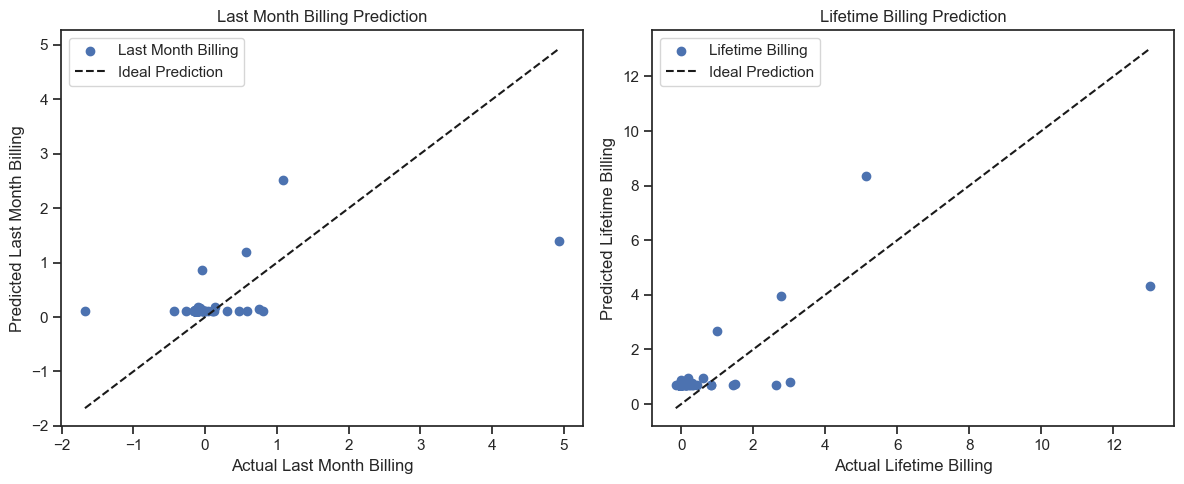

In [66]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Feature selection
selected_features = merged_data_lifetime[['Est_IT_Department_Budget_(in_000s_USD)','Total Budget','Total_Funding_Amount_(in_000s_USD)']]

# Target variables
last_month_billing = merged_data_lifetime['Last_Month_Total']
lifetime_billing = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train, X_test, y_last_month_train, y_last_month_test, y_lifetime_train, y_lifetime_test = train_test_split(
    selected_features, last_month_billing, lifetime_billing, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training for last month billing prediction
last_month_model = LinearRegression()
last_month_model.fit(X_train_scaled, y_last_month_train)

# Model training for lifetime billing prediction
lifetime_model = LinearRegression()
lifetime_model.fit(X_train_scaled, y_lifetime_train)

# Model predictions for last month billing
last_month_predictions = last_month_model.predict(X_test_scaled)

# Model predictions for lifetime billing
lifetime_predictions = lifetime_model.predict(X_test_scaled)

# Model evaluation for last month billing
last_month_r2 = r2_score(y_last_month_test, last_month_predictions)
last_month_mse = mean_squared_error(y_last_month_test, last_month_predictions)
last_month_mae = mean_absolute_error(y_last_month_test, last_month_predictions)

# Model evaluation for lifetime billing
lifetime_r2 = r2_score(y_lifetime_test, lifetime_predictions)
lifetime_mse = mean_squared_error(y_lifetime_test, lifetime_predictions)
lifetime_mae = mean_absolute_error(y_lifetime_test, lifetime_predictions)

# Feature coefficients for last month billing model
last_month_coefficients = pd.DataFrame({'Feature': selected_features.columns, 'Coefficient': last_month_model.coef_})

# Feature coefficients for lifetime billing model
lifetime_coefficients = pd.DataFrame({'Feature': selected_features.columns, 'Coefficient': lifetime_model.coef_})

# Print metrics for last month billing
print("Last Month Billing Model Metrics:")
print(f"R-squared: {last_month_r2}")
print(f"Mean Squared Error: {last_month_mse}")
print(f"Mean Absolute Error: {last_month_mae}")
print("\nLast Month Billing Model Coefficients:")
print(last_month_coefficients)

# Print metrics for lifetime billing
print("\nLifetime Billing Model Metrics:")
print(f"R-squared: {lifetime_r2}")
print(f"Mean Squared Error: {lifetime_mse}")
print(f"Mean Absolute Error: {lifetime_mae}")
print("\nLifetime Billing Model Coefficients:")
print(lifetime_coefficients)

# Plotting
plt.figure(figsize=(12, 5))

# Scatter plot for last month billing
plt.subplot(1, 2, 1)
plt.scatter(y_last_month_test, last_month_predictions, label='Last Month Billing')
plt.plot([y_last_month_test.min(), y_last_month_test.max()], [y_last_month_test.min(), y_last_month_test.max()], '--k', label='Ideal Prediction')
plt.xlabel('Actual Last Month Billing')
plt.ylabel('Predicted Last Month Billing')
plt.title("Last Month Billing Prediction")
plt.legend()

# Scatter plot for lifetime billing
plt.subplot(1, 2, 2)
plt.scatter(y_lifetime_test, lifetime_predictions, label='Lifetime Billing')
plt.plot([y_lifetime_test.min(), y_lifetime_test.max()], [y_lifetime_test.min(), y_lifetime_test.max()], '--k', label='Ideal Prediction')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.title("Lifetime Billing Prediction")
plt.legend()

plt.tight_layout()
plt.show()


### Ridge Regression using Billing as target variable

Last Month Billing Model Metrics:
R-squared: 0.2583912456378221
Mean Squared Error: 0.3531895669418049
Mean Absolute Error: 0.34131111158226907

Lifetime Billing Model Metrics:
R-squared: 0.38923961269917395
Mean Squared Error: 1.939550068945167
Mean Absolute Error: 0.885060885778733


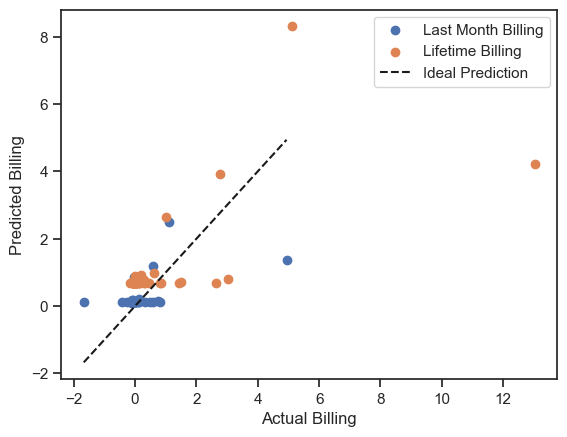

In [67]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Feature selection
features8 = merged_data_lifetime[['Est_IT_Department_Budget_(in_000s_USD)','Total_Funding_Amount_(in_000s_USD)','Total Budget']]

# Target variables
last_month_billing8 = merged_data_lifetime['Last_Month_Total']
lifetime_billing8 = merged_data_lifetime['Lifetime_Total']

# Split the data
X8_train, X8_test, y8_last_month_train, y8_last_month_test, y8_lifetime_train, y8_lifetime_test = train_test_split(
    features8, last_month_billing8, lifetime_billing8, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

# Model training
alpha = 1.0  # You can adjust the alpha parameter for Ridge Regression
last_month_model8 = Ridge(alpha=alpha)
last_month_model8.fit(X8_train_scaled, y8_last_month_train)

lifetime_model8 = Ridge(alpha=alpha)
lifetime_model8.fit(X8_train_scaled, y8_lifetime_train)

# Model predictions
last_month_predictions8 = last_month_model8.predict(X8_test_scaled)
lifetime_predictions8 = lifetime_model8.predict(X8_test_scaled)

# Model evaluation
last_month_r28 = r2_score(y8_last_month_test, last_month_predictions8)
last_month_mse8 = mean_squared_error(y8_last_month_test, last_month_predictions8)
last_month_mae8 = mean_absolute_error(y8_last_month_test, last_month_predictions8)

lifetime_r28 = r2_score(y8_lifetime_test, lifetime_predictions8)
lifetime_mse8 = mean_squared_error(y8_lifetime_test, lifetime_predictions8)
lifetime_mae8 = mean_absolute_error(y8_lifetime_test, lifetime_predictions8)

# Print metrics
print("Last Month Billing Model Metrics:")
print(f"R-squared: {last_month_r28}")
print(f"Mean Squared Error: {last_month_mse8}")
print(f"Mean Absolute Error: {last_month_mae8}")

print("\nLifetime Billing Model Metrics:")
print(f"R-squared: {lifetime_r28}")
print(f"Mean Squared Error: {lifetime_mse8}")
print(f"Mean Absolute Error: {lifetime_mae8}")

# Plotting
plt.scatter(y8_last_month_test, last_month_predictions8, label='Last Month Billing')
plt.scatter(y8_lifetime_test, lifetime_predictions8, label='Lifetime Billing')
plt.plot([y8_last_month_test.min(), y8_last_month_test.max()], [y8_last_month_test.min(), y8_last_month_test.max()], '--k', label='Ideal Prediction')
plt.xlabel('Actual Billing')
plt.ylabel('Predicted Billing')
plt.legend()
plt.show()

### Decision Tree Regressor using Billing as target variable

Last Month Billing Model Metrics:
R-squared: -5.2431509882537695
Mean Squared Error: 2.9732871691759875
Mean Absolute Error: 0.5252327335426571

Lifetime Billing Model Metrics:
R-squared: -1.0982861131905595
Mean Squared Error: 6.663383972053376
Mean Absolute Error: 0.8850717186759578


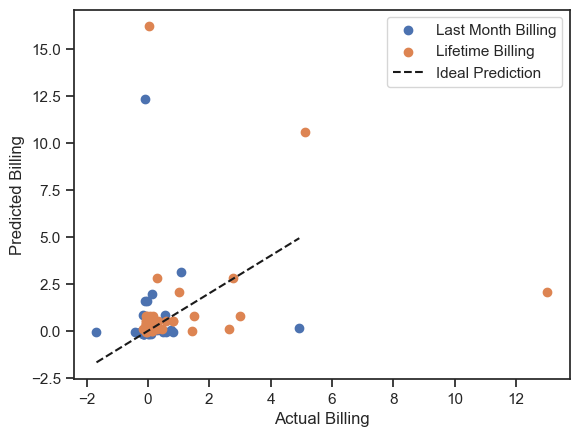

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Feature selection
new_features = merged_data_lifetime[['Est_IT_Department_Budget_(in_000s_USD)', 'Total_Funding_Amount_(in_000s_USD)', 'Total Budget']]

# Target variables
new_last_month_billing = merged_data_lifetime['Last_Month_Total']
new_lifetime_billing = merged_data_lifetime['Lifetime_Total']

# Split the data
X1_train, X1_test, y1_last_month_train, y1_last_month_test, y1_lifetime_train, y1_lifetime_test = train_test_split(
    new_features, new_last_month_billing, new_lifetime_billing, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Model training
new_last_month_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
new_last_month_model.fit(X1_train_scaled, y1_last_month_train)

new_lifetime_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
new_lifetime_model.fit(X1_train_scaled, y1_lifetime_train)

# Model predictions
new_last_month_predictions = new_last_month_model.predict(X1_test_scaled)
new_lifetime_predictions = new_lifetime_model.predict(X1_test_scaled)

# Model evaluation
new_last_month_r2 = r2_score(y1_last_month_test, new_last_month_predictions)
new_last_month_mse = mean_squared_error(y1_last_month_test, new_last_month_predictions)
new_last_month_mae = mean_absolute_error(y1_last_month_test, new_last_month_predictions)

new_lifetime_r2 = r2_score(y1_lifetime_test, new_lifetime_predictions)
new_lifetime_mse = mean_squared_error(y1_lifetime_test, new_lifetime_predictions)
new_lifetime_mae = mean_absolute_error(y1_lifetime_test, new_lifetime_predictions)

# Print metrics
print("Last Month Billing Model Metrics:")
print(f"R-squared: {new_last_month_r2}")
print(f"Mean Squared Error: {new_last_month_mse}")
print(f"Mean Absolute Error: {new_last_month_mae}")

print("\nLifetime Billing Model Metrics:")
print(f"R-squared: {new_lifetime_r2}")
print(f"Mean Squared Error: {new_lifetime_mse}")
print(f"Mean Absolute Error: {new_lifetime_mae}")

# Plotting
plt.scatter(y1_last_month_test, new_last_month_predictions, label='Last Month Billing')
plt.scatter(y1_lifetime_test, new_lifetime_predictions, label='Lifetime Billing')
plt.plot([y1_last_month_test.min(), y1_last_month_test.max()], [y1_last_month_test.min(), y1_last_month_test.max()], '--k', label='Ideal Prediction')
plt.xlabel('Actual Billing')
plt.ylabel('Predicted Billing')
plt.legend()
plt.show()


### Gradient Booster using Billing as target variable and using feature importances

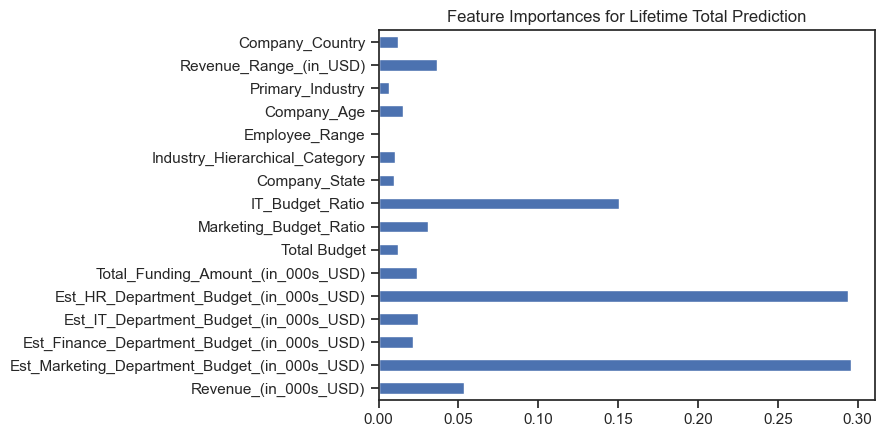

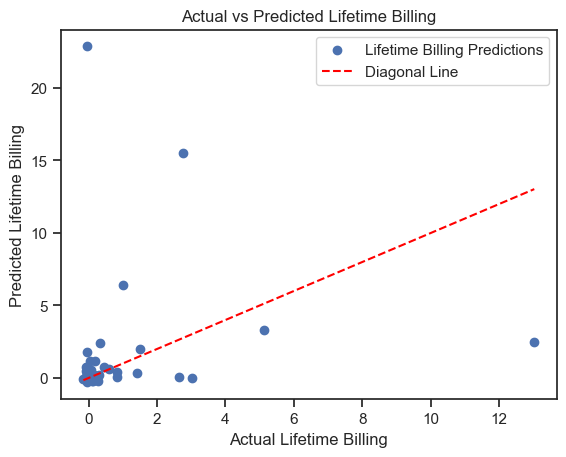

R2 Score for Lifetime Total: -3.119472472475203
Mean Squared Error for Lifetime Total: 13.081927518772781
Mean Absolute Error for Lifetime Total: 1.1923827662993745


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Prepare features and target variable for Lifetime Total
X_lifetime = merged_data_lifetime.drop(['CompanyID', 'Founded_Year','HR_Budget_Ratio','Finance_Budget_Ratio','Profit', 'Employees', 'Number_of_Locations', 'Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate', 'Alexa_Rank', 'Business_Model', 'Ownership_Type', 'Last_Month_Total', 'Lifetime_Total'], axis=1)
y_lifetime = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train_lifetime, X_test_lifetime, y_train_lifetime, y_test_lifetime = train_test_split(X_lifetime, y_lifetime, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_lifetime)
X_test_scaled = scaler.transform(X_test_lifetime)

# Create and train the Lifetime Total model with 1000 iterations
model_lifetime = GradientBoostingRegressor(n_estimators=1000)
model_lifetime.fit(X_train_scaled, y_train_lifetime)

# Extract feature importances
feature_importances_lifetime = model_lifetime.feature_importances_

# Display feature importances
Features_lifetime = X_lifetime.columns
Feature_importances_lifetime = pd.Series(feature_importances_lifetime, index=Features_lifetime)
Feature_importances_lifetime.plot.barh()  # Horizontal bar plot for better readability
plt.title("Feature Importances for Lifetime Total Prediction")
plt.show()

# Select top features based on importance
top_features_lifetime = Feature_importances_lifetime.nlargest(4).index
X_train_lifetime_selected = X_train_scaled[:, X_train_lifetime.columns.get_indexer(top_features_lifetime)]
X_test_lifetime_selected = X_test_scaled[:, X_test_lifetime.columns.get_indexer(top_features_lifetime)]

# Train the model on selected features
model_lifetime_selected = GradientBoostingRegressor(n_estimators=1000)
model_lifetime_selected.fit(X_train_lifetime_selected, y_train_lifetime)

# Make predictions on the test set
predictions_lifetime = model_lifetime_selected.predict(X_test_lifetime_selected)

# Evaluate performance
r2_lifetime = r2_score(y_test_lifetime, predictions_lifetime)
mse_lifetime = mean_squared_error(y_test_lifetime, predictions_lifetime)
mae_lifetime = mean_absolute_error(y_test_lifetime, predictions_lifetime)

plt.scatter(y_test_lifetime, predictions_lifetime, label='Lifetime Billing Predictions')
plt.plot([min(y_test_lifetime), max(y_test_lifetime)], [min(y_test_lifetime), max(y_test_lifetime)], linestyle='--', color='red', label='Diagonal Line')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.legend()
plt.title("Actual vs Predicted Lifetime Billing")
plt.show()

print(f'R2 Score for Lifetime Total: {r2_lifetime}')
print(f'Mean Squared Error for Lifetime Total: {mse_lifetime}')
print(f'Mean Absolute Error for Lifetime Total: {mae_lifetime}')


### CatBoost Regressor using Billing as target variable and using feature importances

0:	learn: 4.2933768	total: 65.4ms	remaining: 1m 5s
1:	learn: 4.1913199	total: 70.2ms	remaining: 35s
2:	learn: 4.0877520	total: 77.4ms	remaining: 25.7s
3:	learn: 3.9864793	total: 84.6ms	remaining: 21.1s
4:	learn: 3.8906836	total: 89.4ms	remaining: 17.8s
5:	learn: 3.8128506	total: 94.2ms	remaining: 15.6s
6:	learn: 3.7213271	total: 99.2ms	remaining: 14.1s
7:	learn: 3.6431991	total: 104ms	remaining: 12.9s
8:	learn: 3.5600568	total: 105ms	remaining: 11.6s
9:	learn: 3.4857463	total: 109ms	remaining: 10.8s
10:	learn: 3.4026705	total: 115ms	remaining: 10.3s
11:	learn: 3.3435272	total: 119ms	remaining: 9.83s
12:	learn: 3.2639027	total: 124ms	remaining: 9.39s
13:	learn: 3.1870164	total: 129ms	remaining: 9.05s
14:	learn: 3.1141689	total: 133ms	remaining: 8.73s
15:	learn: 3.0399995	total: 138ms	remaining: 8.46s
16:	learn: 2.9677810	total: 142ms	remaining: 8.22s
17:	learn: 2.8970389	total: 147ms	remaining: 8.01s
18:	learn: 2.8309652	total: 152ms	remaining: 7.83s
19:	learn: 2.7658119	total: 156ms	re

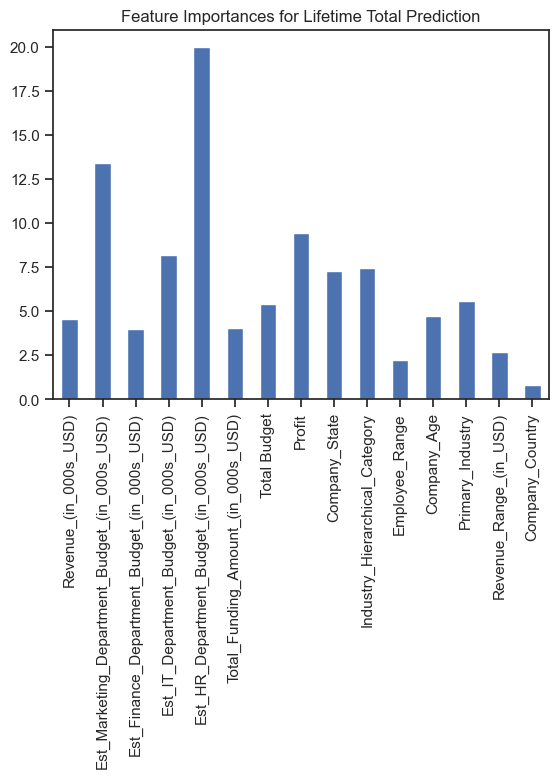

0:	learn: 4.3115841	total: 4.22ms	remaining: 4.22s
1:	learn: 4.2118849	total: 9.64ms	remaining: 4.81s
2:	learn: 4.1119819	total: 13.9ms	remaining: 4.62s
3:	learn: 4.0141765	total: 17.7ms	remaining: 4.42s
4:	learn: 3.9191425	total: 22.5ms	remaining: 4.48s
5:	learn: 3.8328308	total: 26.7ms	remaining: 4.43s
6:	learn: 3.7490803	total: 31.1ms	remaining: 4.41s
7:	learn: 3.6613251	total: 34.9ms	remaining: 4.33s
8:	learn: 3.5829382	total: 38.5ms	remaining: 4.23s
9:	learn: 3.5058365	total: 69ms	remaining: 6.83s
10:	learn: 3.4260456	total: 81.5ms	remaining: 7.32s
11:	learn: 3.3483599	total: 85.8ms	remaining: 7.06s
12:	learn: 3.2726249	total: 90.1ms	remaining: 6.84s
13:	learn: 3.2156015	total: 94.6ms	remaining: 6.66s
14:	learn: 3.1531851	total: 99.2ms	remaining: 6.52s
15:	learn: 3.0888678	total: 104ms	remaining: 6.38s
16:	learn: 3.0306077	total: 108ms	remaining: 6.25s
17:	learn: 2.9647207	total: 112ms	remaining: 6.13s
18:	learn: 2.9093012	total: 126ms	remaining: 6.5s
19:	learn: 2.8462456	total: 1

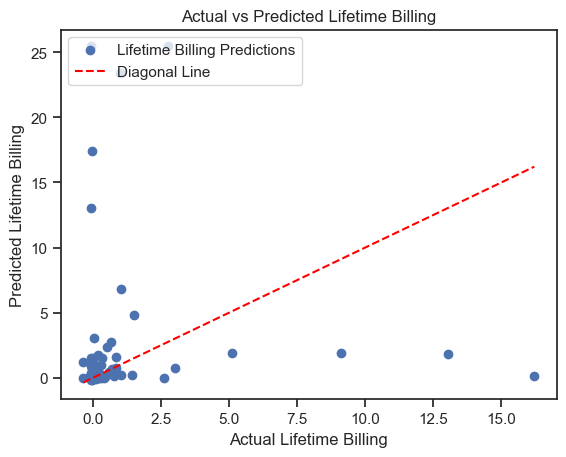

R2 Score for Lifetime Total: -4.0120239524976
Mean Squared Error for Lifetime Total: 27.14365994939825
Mean Absolute Error for Lifetime Total: 1.885826318927838


In [70]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Prepare features and target variable for Lifetime Total
X_lifetime_CBR = merged_data_lifetime.drop(['CompanyID','HR_Budget_Ratio', 'Marketing_Budget_Ratio','IT_Budget_Ratio','Finance_Budget_Ratio', 'Founded_Year', 'Employees','Number_of_Locations','Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate', 'Alexa_Rank', 'Business_Model', 'Ownership_Type', 'Last_Month_Total', 'Lifetime_Total'], axis=1)
y_lifetime_CBR = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train_lifetime_CBR, X_test_lifetime_CBR, y_train_lifetime_CBR, y_test_lifetime_CBR = train_test_split(X_lifetime_CBR, y_lifetime_CBR, test_size=0.3, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_lifetime_CBR_scaled = scaler.fit_transform(X_train_lifetime_CBR)
X_test_lifetime_CBR_scaled = scaler.transform(X_test_lifetime_CBR)

# Create and train the Lifetime Total model using CatBoostRegressor
model_lifetime_CBR = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', random_seed=42)
model_lifetime_CBR.fit(X_train_lifetime_CBR_scaled, y_train_lifetime_CBR)

# Get feature importances
feature_importances_lifetime_CBR = model_lifetime_CBR.get_feature_importance()

# Display feature importances
Features_lifetime_CBR = X_lifetime_CBR.columns
Feature_importances_lifetime_CBR = pd.Series(feature_importances_lifetime_CBR, index=Features_lifetime_CBR)
Feature_importances_lifetime_CBR.plot.bar()
plt.title("Feature Importances for Lifetime Total Prediction")
plt.show()

# Select top features based on importance
top_features_lifetime_CBR = Feature_importances_lifetime_CBR.nlargest(4).index
X_train_lifetime_selected_CBR = X_train_lifetime_CBR_scaled[:, X_train_lifetime_CBR.columns.get_indexer(top_features_lifetime_CBR)]
X_test_lifetime_selected_CBR = X_test_lifetime_CBR_scaled[:, X_test_lifetime_CBR.columns.get_indexer(top_features_lifetime_CBR)]

# Train the model on selected features
model_lifetime_selected_CBR = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', random_state=42)
model_lifetime_selected_CBR.fit(X_train_lifetime_selected_CBR, y_train_lifetime_CBR)

# Make predictions on the test set
predictions_lifetime_CBR = model_lifetime_selected_CBR.predict(X_test_lifetime_selected_CBR)

# Evaluate performance
r2_lifetime_CBR = r2_score(y_test_lifetime_CBR, predictions_lifetime_CBR)
mse_lifetime_CBR = mean_squared_error(y_test_lifetime_CBR, predictions_lifetime_CBR)
mae_lifetime_CBR = mean_absolute_error(y_test_lifetime_CBR, predictions_lifetime_CBR)

plt.scatter(y_test_lifetime_CBR, predictions_lifetime_CBR, label='Lifetime Billing Predictions')
plt.plot([min(y_test_lifetime_CBR), max(y_test_lifetime_CBR)], [min(y_test_lifetime_CBR), max(y_test_lifetime_CBR)], linestyle='--', color='red', label='Diagonal Line')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.legend(loc='upper left')
plt.title("Actual vs Predicted Lifetime Billing")
plt.show()

print(f'R2 Score for Lifetime Total: {r2_lifetime_CBR}')
print(f'Mean Squared Error for Lifetime Total: {mse_lifetime_CBR}')
print(f'Mean Absolute Error for Lifetime Total: {mae_lifetime_CBR}')


### XGB Regressor using Billing as target variable and using feature importances

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



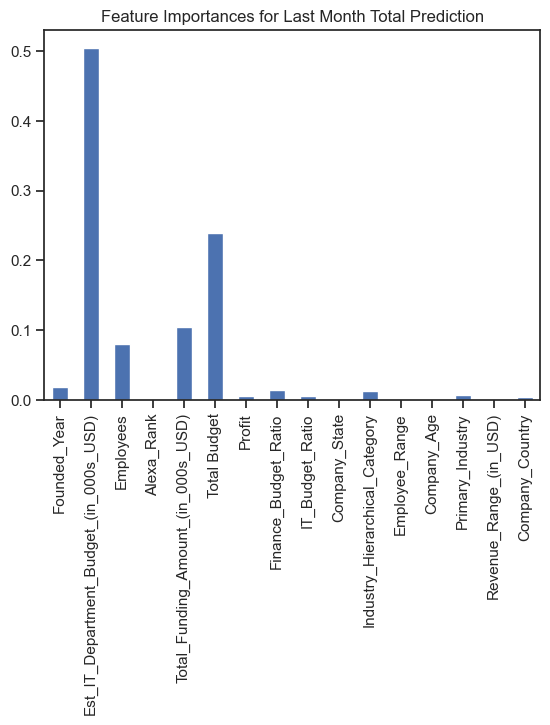

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



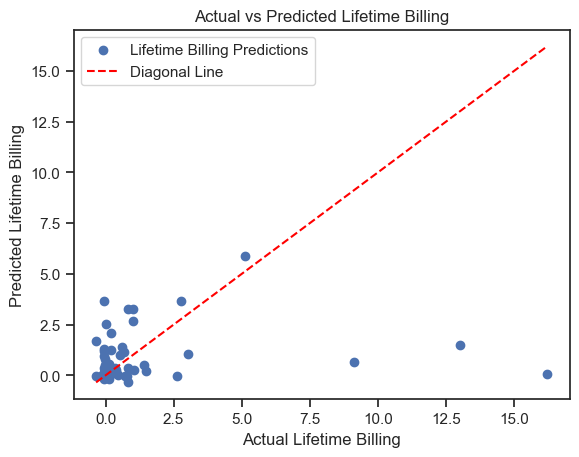

R2 Score for Last Month Total: 0.0007748250648584865
Mean Squared Error for Last Month Total: 5.4115121193308875
Mean Absolute Error for Last Month Total: 0.8344595895048375


In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Prepare features and target variable for Last Month Total
X_lifetime_xgb = merged_data_lifetime.drop(['CompanyID','HR_Budget_Ratio','Revenue_(in_000s_USD)','Est_HR_Department_Budget_(in_000s_USD)','Est_Finance_Department_Budget_(in_000s_USD)','Est_Marketing_Department_Budget_(in_000s_USD)','Marketing_Budget_Ratio','Number_of_Locations','Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate','Business_Model', 'Ownership_Type', 'Last_Month_Total', 'Lifetime_Total'], axis=1)
y_lifetime_xgb = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train_lifetime_xgb, X_test_lifetime_xgb, y_train_lifetime_xgb, y_test_lifetime_xgb = train_test_split(X_lifetime_xgb, y_lifetime_xgb, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_lifetime_xgb_scaled = scaler.fit_transform(X_train_lifetime_xgb)
X_test_lifetime_xgb_scaled = scaler.transform(X_test_lifetime_xgb)

# Create and train the Last Month Total model using XGBRegressor
model_lifetime_xgb = XGBRegressor(n_estimators=1000)
model_lifetime_xgb.fit(X_train_lifetime_xgb_scaled, y_train_lifetime_xgb)

# Extract feature importances
feature_importances_lifetime_xgb = model_lifetime_xgb.feature_importances_

# Display feature importances
features_lifetime_xgb = X_lifetime_xgb.columns
feature_importances_lifetime_xgb = pd.Series(feature_importances_lifetime_xgb, index=features_lifetime_xgb)
feature_importances_lifetime_xgb.plot.bar()
plt.title("Feature Importances for Last Month Total Prediction")
plt.show()

# Select top features based on importance
top_features_lifetime_xgb = feature_importances_lifetime_xgb.nlargest(4).index
X_train_lifetime_selected_xgb = X_train_lifetime_xgb_scaled[:, X_train_lifetime_xgb.columns.get_indexer(top_features_lifetime_xgb)]
X_test_lifetime_selected_xgb = X_test_lifetime_xgb_scaled[:, X_test_lifetime_xgb.columns.get_indexer(top_features_lifetime_xgb)]

# Train the model on selected features
model_lifetime_selected_xgb = XGBRegressor(n_estimators=1000)
model_lifetime_selected_xgb.fit(X_train_lifetime_selected_xgb, y_train_lifetime_xgb)

# Make predictions on the test set
predictions_lifetime_xgb = model_lifetime_selected_xgb.predict(X_test_lifetime_selected_xgb)

# Evaluate performance
r2_lifetime_xgb = r2_score(y_test_lifetime_xgb, predictions_lifetime_xgb)
mse_lifetime_xgb = mean_squared_error(y_test_lifetime_xgb, predictions_lifetime_xgb)
mae_lifetime_xgb = mean_absolute_error(y_test_lifetime_xgb, predictions_lifetime_xgb)

plt.scatter(y_test_lifetime_xgb, predictions_lifetime_xgb, label='Lifetime Billing Predictions')
plt.plot([min(y_test_lifetime_xgb), max(y_test_lifetime_xgb)], [min(y_test_lifetime_xgb), max(y_test_lifetime_xgb)], linestyle='--', color='red', label='Diagonal Line')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.legend()
plt.title("Actual vs Predicted Lifetime Billing")
plt.show()

print(f'R2 Score for Last Month Total: {r2_lifetime_xgb}')
print(f'Mean Squared Error for Last Month Total: {mse_lifetime_xgb}')
print(f'Mean Absolute Error for Last Month Total: {mae_lifetime_xgb}')


### LGBM Regressor using Billing as target variable and using feature importances

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 16
[LightGBM] [Info] Start training from score 0.837983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

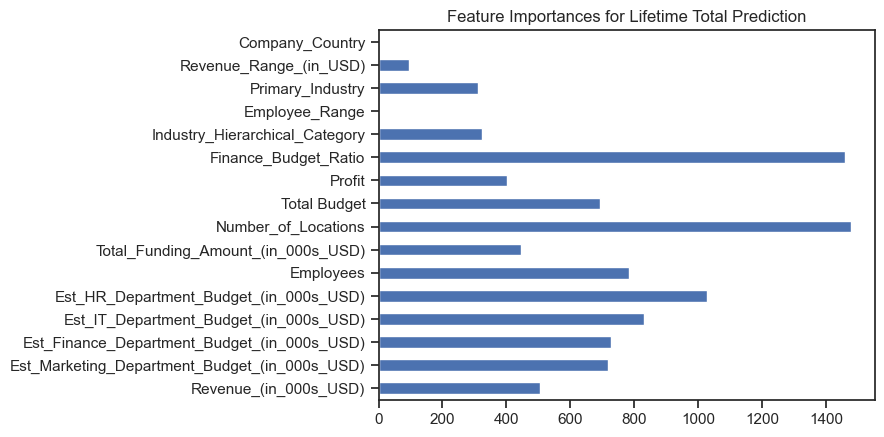

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] Start training from score 0.837983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

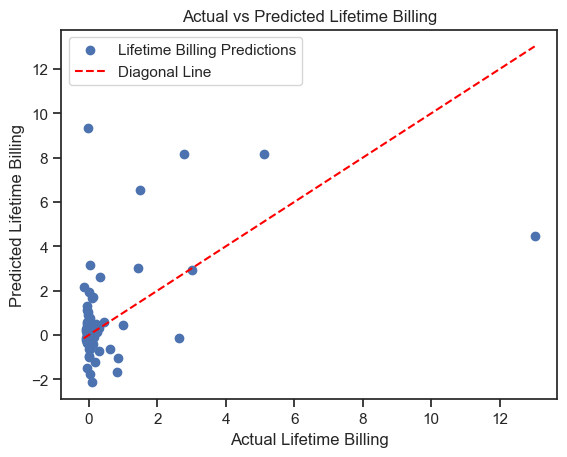

R2 Score for Lifetime Total: -0.43603112094666274
Mean Squared Error for Lifetime Total: 4.560306001423184
Mean Absolute Error for Lifetime Total: 1.2046749104163776


In [72]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Prepare features and target variable for Last Month Total
X_lifetime_lgbm = merged_data_lifetime.drop(['CompanyID', 'Founded_Year', 'Company_State', 'HR_Budget_Ratio', 'Company_Age', 'IT_Budget_Ratio', 'Alexa_Rank', 'Marketing_Budget_Ratio', 'Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate', 'Business_Model', 'Ownership_Type', 'Last_Month_Total', 'Lifetime_Total'], axis=1)
y_lifetime_lgbm = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train_lifetime_lgbm, X_test_lifetime_lgbm, y_train_lifetime_lgbm, y_test_lifetime_lgbm = train_test_split(X_lifetime_lgbm, y_lifetime_lgbm, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_lifetime_lgbm_scaled = scaler.fit_transform(X_train_lifetime_lgbm)
X_test_lifetime_lgbm_scaled = scaler.transform(X_test_lifetime_lgbm)

# Create and train the Last Month Total model using LGBMRegressor
model_lifetime_lgbm = LGBMRegressor(n_estimators=1000)
model_lifetime_lgbm.fit(X_train_lifetime_lgbm_scaled, y_train_lifetime_lgbm)

# Extract feature importances
feature_importances_lifetime_lgbm = model_lifetime_lgbm.feature_importances_

# Display feature importances
Features_lifetime_lgbm = X_lifetime_lgbm.columns
Feature_importances_lifetime_lgbm = pd.Series(feature_importances_lifetime_lgbm, index=Features_lifetime_lgbm)
Feature_importances_lifetime_lgbm.plot.barh()  # Horizontal bar plot for better readability
plt.title("Feature Importances for Lifetime Total Prediction")
plt.show()

# Select top features based on importance
top_features_lifetime_lgbm = Feature_importances_lifetime_lgbm.nlargest(4).index
X_train_lifetime_selected_lgbm = X_train_lifetime_lgbm_scaled[:, X_train_lifetime_lgbm.columns.get_indexer(top_features_lifetime_lgbm)]
X_test_lifetime_selected_lgbm = X_test_lifetime_lgbm_scaled[:, X_test_lifetime_lgbm.columns.get_indexer(top_features_lifetime_lgbm)]


# Train the model on selected features
model_lifetime_selected_lgbm = LGBMRegressor(n_estimators=1000)
model_lifetime_selected_lgbm.fit(X_train_lifetime_selected_lgbm, y_train_lifetime_lgbm)

# Make predictions on the test set
predictions_lifetime_lgbm = model_lifetime_selected_lgbm.predict(X_test_lifetime_selected_lgbm)

# Evaluate performance
r2_lifetime_lgbm_lifetime = r2_score(y_test_lifetime_lgbm, predictions_lifetime_lgbm)
mse_lifetime_lgbm_lifetime = mean_squared_error(y_test_lifetime_lgbm, predictions_lifetime_lgbm)
mae_lifetime_lgbm_lifetime = mean_absolute_error(y_test_lifetime_lgbm, predictions_lifetime_lgbm)

plt.scatter(y_test_lifetime_lgbm, predictions_lifetime_lgbm, label='Lifetime Billing Predictions')
plt.plot([min(y_test_lifetime_lgbm), max(y_test_lifetime_lgbm)], [min(y_test_lifetime_lgbm), max(y_test_lifetime_lgbm)], linestyle='--', color='red', label='Diagonal Line')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.legend()
plt.title("Actual vs Predicted Lifetime Billing")
plt.show()

print(f'R2 Score for Lifetime Total: {r2_lifetime_lgbm_lifetime}')
print(f'Mean Squared Error for Lifetime Total: {mse_lifetime_lgbm_lifetime}')
print(f'Mean Absolute Error for Lifetime Total: {mae_lifetime_lgbm_lifetime}')


### Extra Trees Regressor using Billing as target variable and using feature importances

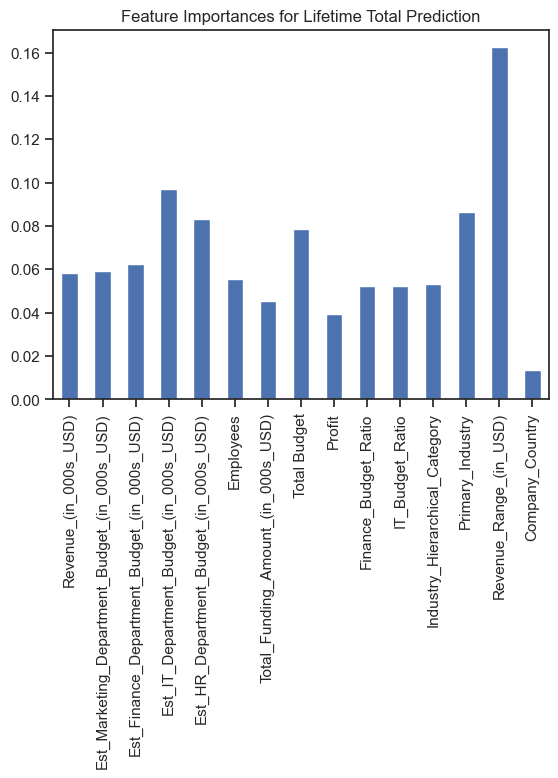

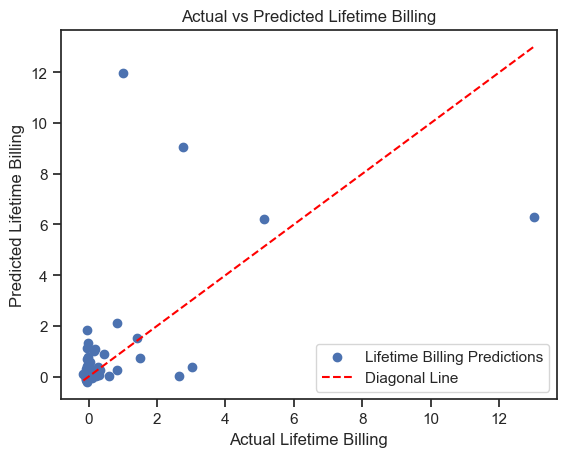

R2 Score for Lifetime Total: -0.11795559443400183
Mean Squared Error for Lifetime Total: 3.550215265015389
Mean Absolute Error for Lifetime Total: 0.7249167077843938


In [73]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
	

# Prepare features and target variable for Last Month Total
X_lifetime_ETR = merged_data_lifetime.drop(['CompanyID','Founded_Year','Employee_Range','Marketing_Budget_Ratio','Company_Age','Company_State','HR_Budget_Ratio','Number_of_Locations','Alexa_Rank','Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate','Business_Model', 'Ownership_Type', 'Last_Month_Total', 'Lifetime_Total'], axis=1)
y_lifetime_ETR = merged_data_lifetime['Lifetime_Total']

# Split the data into training and testing sets
X_train_lifetime_ETR, X_test_lifetime_ETR, y_train_lifetime_ETR, y_test_lifetime_ETR = train_test_split(X_lifetime_ETR, y_lifetime_ETR, test_size=0.2, random_state=42)

# Create and train the Last Month Total model using ExtraTreesRegressor
model_lifetime_ETR = ExtraTreesRegressor(n_estimators=100)
model_lifetime_ETR.fit(X_train_lifetime_ETR, y_train_lifetime_ETR)

# Extract feature importances
feature_importances_lifetime_ETR = model_lifetime_ETR.feature_importances_

# Display feature importances
Features_lifetime_ETR = X_lifetime_ETR.columns
Feature_importances_lifetime_ETR = pd.Series(feature_importances_lifetime_ETR, index=Features_lifetime_ETR)
Feature_importances_lifetime_ETR.plot.bar()
plt.title("Feature Importances for Lifetime Total Prediction")
plt.show()

# Select top features based on importance
top_features_lifetime_ETR = Feature_importances_lifetime_ETR.nlargest(4).index
X_train_lifetime_selected_ETR = X_train_lifetime_ETR[top_features_lifetime_ETR]
X_test_lifetime_selected_ETR = X_test_lifetime_ETR[top_features_lifetime_ETR]

# Train the model on selected features
model_lifetime_selected_ETR = ExtraTreesRegressor(n_estimators=100)
model_lifetime_selected_ETR.fit(X_train_lifetime_selected_ETR, y_train_lifetime_ETR)

# Make predictions on the test set
predictions_lifetime_ETR = model_lifetime_selected_ETR.predict(X_test_lifetime_selected_ETR)

# Evaluate performance
r2_lifetime_ETR = r2_score(y_test_lifetime_ETR, predictions_lifetime_ETR)
mse_lifetime_ETR = mean_squared_error(y_test_lifetime_ETR, predictions_lifetime_ETR)
mae_lifetime_ETR = mean_absolute_error(y_test_lifetime_ETR, predictions_lifetime_ETR)

plt.scatter(y_test_lifetime_ETR, predictions_lifetime_ETR, label='Lifetime Billing Predictions')
plt.plot([min(y_test_lifetime_ETR), max(y_test_lifetime_ETR)], [min(y_test_lifetime_ETR), max(y_test_lifetime_ETR)], linestyle='--', color='red', label='Diagonal Line')
plt.xlabel('Actual Lifetime Billing')
plt.ylabel('Predicted Lifetime Billing')
plt.legend()
plt.title("Actual vs Predicted Lifetime Billing")
plt.show()

print(f'R2 Score for Lifetime Total: {r2_lifetime_ETR}')
print(f'Mean Squared Error for Lifetime Total: {mse_lifetime_ETR}')
print(f'Mean Absolute Error for Lifetime Total: {mae_lifetime_ETR}')


### Log Transformation of Revenue Feature

In [74]:
epsilon = 1e-6
merged_data_lifetime['Revenue_(in_000s_USD)'] = np.log1p(merged_data_lifetime['Revenue_(in_000s_USD)'] + epsilon)

epsilon = 1e-6
numericplDF['Revenue_(in_000s_USD)'] = np.log1p(numericplDF['Revenue_(in_000s_USD)'] + epsilon)


### Training the model using Revenue as target variable

In [75]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = merged_data_lifetime[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]
y = merged_data_lifetime['Revenue_(in_000s_USD)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression using Revenue as target variable

Linear Regression: RMSE = 0.8931519331395387, R2 = 0.9140378311179144, MAE = 0.43728233209954503


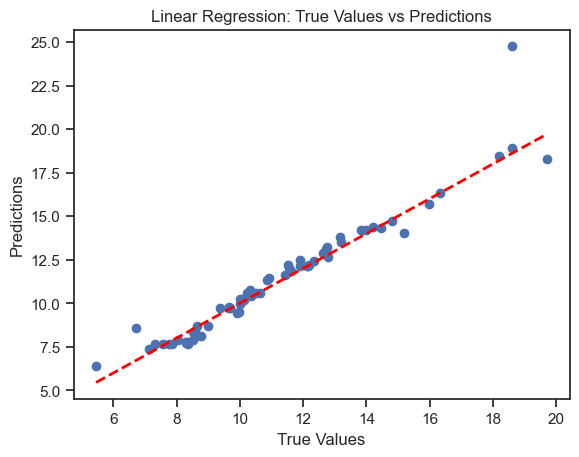

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# Fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate and print RMSE, R2, and MAE
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f'Linear Regression: RMSE = {rmse_linear}, R2 = {r2_linear}, MAE = {mae_linear}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True Values vs Predictions')
plt.show()



### Lasso Regression using Revenue as target variable

Lasso Regression: RMSE = 2.6446768993604852, R2 = 0.246294086097941, MAE = 1.956322776705871


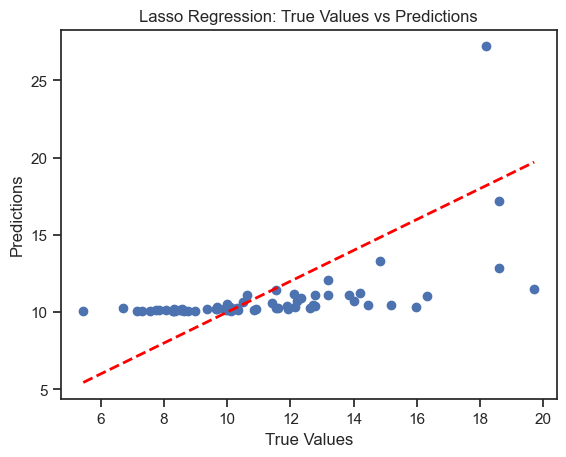

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Initialize the Lasso Regression model
lasso_model = Lasso(max_iter=1000)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f'Lasso Regression: RMSE = {rmse_lasso}, R2 = {r2_lasso}, MAE = {mae_lasso}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression: True Values vs Predictions')
plt.show()


### Decision Tree Regressor using Revenue as target variable

Decision Tree: RMSE = 1.2221806777974695, R2 = 0.839036463156698, MAE = 0.7646861333032919


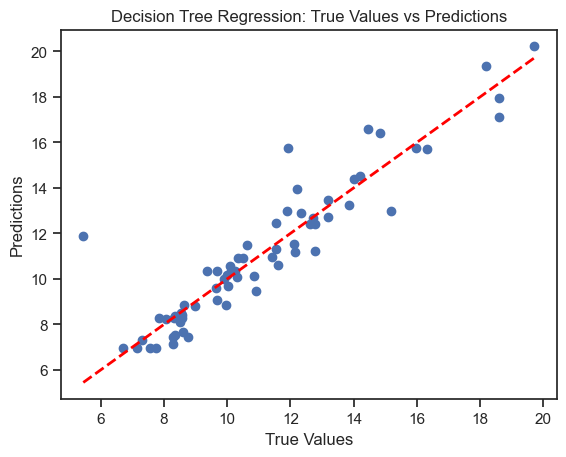

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Initialize the Decision Tree Regressor model
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f'Decision Tree: RMSE = {rmse_tree}, R2 = {r2_tree}, MAE = {mae_tree}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regression: True Values vs Predictions')
plt.show()


### Random Forest Regressor using Revenue target variable

Random Forest: RMSE = 0.9693222232175095, R2 = 0.8987504693133881, MAE = 0.5914855021311762
Top 300 Potential Customers:
      CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
1     155353090        1962.0              20.262490   
596   369938550        1924.0              18.825025   
191   459073254        2015.0              19.483773   
356     5851944        2000.0              17.601113   
185    60720958        1976.0              16.349207   
...         ...           ...                    ...   
1023   19890428        1987.0              14.260840   
526   113000732        1877.0              16.022260   
281    50136399        2010.0              16.266516   
493   351058000        2004.0              15.008319   
304    23675590        1948.0              16.802580   

      Est_Marketing_Department_Budget_(in_000s_USD)  \
1                                        76956868.0   
596                                       7491601.0   
191                                      

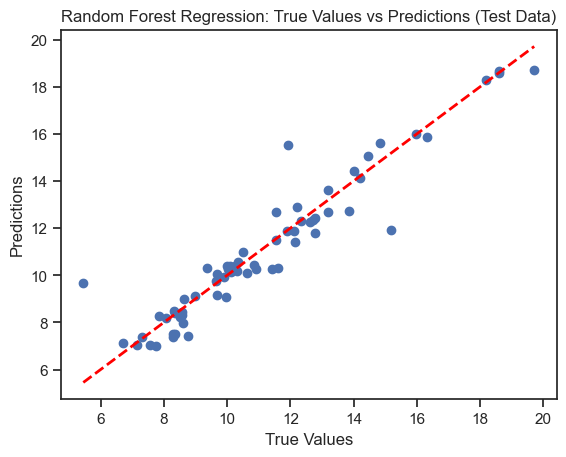

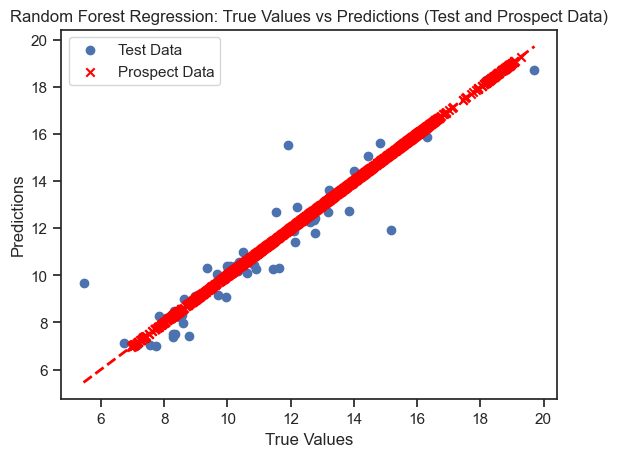

In [79]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest: RMSE = {rmse_rf}, R2 = {r2_rf}, MAE = {mae_rf}')

# Prospect features
prospect_features = numericplDF[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]

# Predictions for prospect data
predictions_prospects = rf_model.predict(prospect_features)

# Determine potential customers based on a threshold
threshold = 0.5
potential_customers = numericplDF.loc[predictions_prospects > threshold]

numericplDF['Predicted_Revenue'] = predictions_prospects

# Select the top 100 potential customers
top_300_potential_customers = numericplDF.nlargest(300, 'Predicted_Revenue')

# Save the top 100 potential customers to a CSV file
top_300_potential_customers.to_csv('top_300_potential_customers.csv', index=False)

# Display the list of top 100 potential customers
print("Top 300 Potential Customers:")
print(top_300_potential_customers)


# Plot predicted values vs true values for the test data
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression: True Values vs Predictions (Test Data)')
plt.show()

# Scatter plot for the test data
plt.scatter(y_test, y_pred_rf, label='Test Data')

# Scatter plot for the prospect data
plt.scatter(predictions_prospects, predictions_prospects, label='Prospect Data', marker='x', c='red')

# Plot diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Labeling and Title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Random Forest Regression: True Values vs Predictions (Test and Prospect Data)')
plt.show()


### Extra Trees Regressor using Revenue as target variable

Extra Trees: RMSE = 0.9461399368864425, R2 = 0.9035355197736042, MAE = 0.6471291138967982


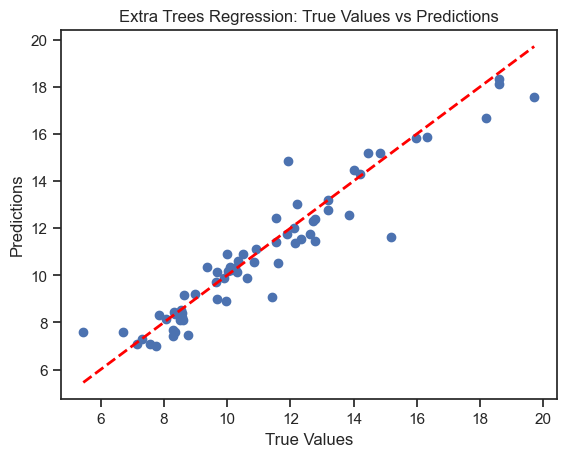

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the Extra Trees Regressor model
extra_trees_model = ExtraTreesRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
extra_trees_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_extra_trees = mean_squared_error(y_test, y_pred_extra_trees, squared=False)
r2_extra_trees = r2_score(y_test, y_pred_extra_trees)
mae_extra_trees = mean_absolute_error(y_test, y_pred_extra_trees)

print(f'Extra Trees: RMSE = {rmse_extra_trees}, R2 = {r2_extra_trees}, MAE = {mae_extra_trees}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_extra_trees)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Extra Trees Regression: True Values vs Predictions')
plt.show()


### AdaBoost Regressor using Revenue as target variable

AdaBoost: RMSE = 0.9691940384332622, R2 = 0.8987772463556889, MAE = 0.648800097602902


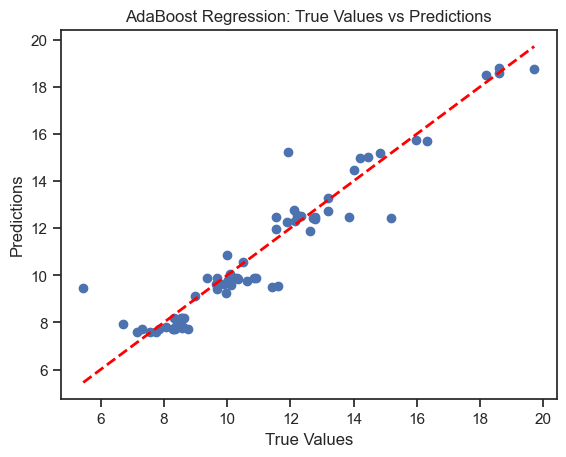

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=False)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

print(f'AdaBoost: RMSE = {rmse_adaboost}, R2 = {r2_adaboost}, MAE = {mae_adaboost}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_adaboost)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('AdaBoost Regression: True Values vs Predictions')
plt.show()


### Gradient Booster using Revenue as target variable

Gradient Boosting: RMSE = 1.1105485503325339, R2 = 0.8670979198487243, MAE = 0.7172665550062911


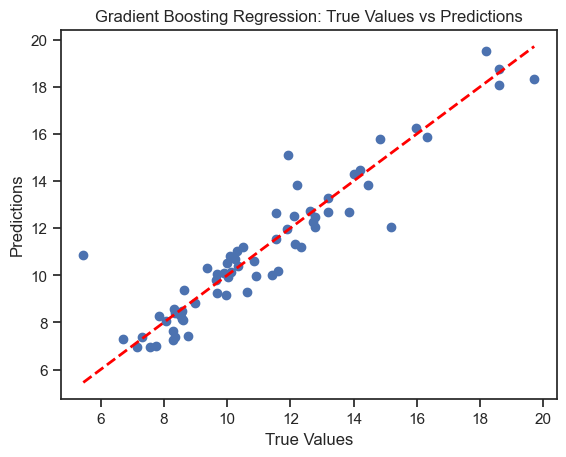

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f'Gradient Boosting: RMSE = {rmse_gb}, R2 = {r2_gb}, MAE = {mae_gb}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression: True Values vs Predictions')
plt.show()


### XGB Regressor using Revenue as target variable

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:427:

XGBoost: RMSE = 1.0557459394030333, R2 = 0.8798910089372913, MAE = 0.7073479244472073


/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/Sakshi/anaconda3/envs/TensorfLOW/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



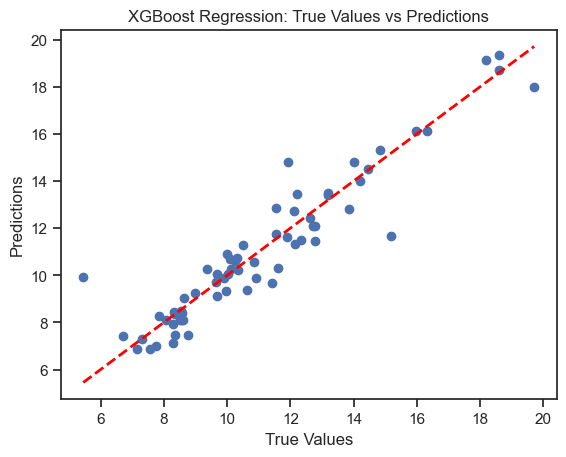

In [83]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f'XGBoost: RMSE = {rmse_xgb}, R2 = {r2_xgb}, MAE = {mae_xgb}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('XGBoost Regression: True Values vs Predictions')
plt.show()


### Catboost Regressor using Revenue as target variable

CatBoost: RMSE = 0.9825419939927019, R2 = 0.8959699225304298, MAE = 0.6424603532539223
Top 300 Potential Customers of Cat Boost Regressor:
     CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
596  369938550        1924.0              18.825025   
108   26968154        2006.0              16.908029   
191  459073254        2015.0              19.483773   
567   68863214        1984.0              16.454568   
122   39469842        1918.0              17.713573   
..         ...           ...                    ...   
617  345458296        2008.0              15.404441   
262   37323650        1986.0              15.481825   
215   29803080        1971.0              15.409185   
786    8258381        1984.0              15.261503   
112   11126273        1962.0              15.684450   

     Est_Marketing_Department_Budget_(in_000s_USD)  \
596                                      7491601.0   
108                                      2864225.0   
191                                   

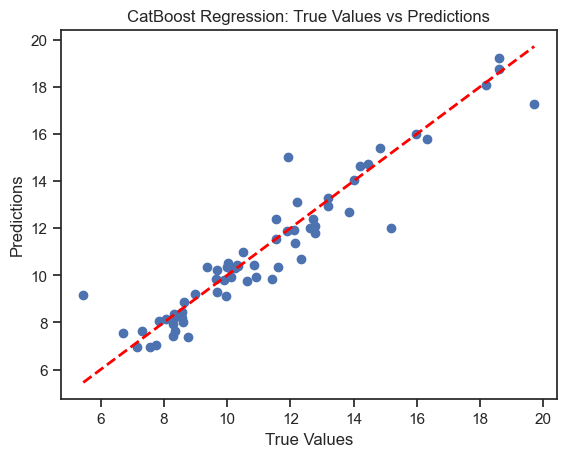

In [84]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the CatBoost Regressor model
catboost_model = CatBoostRegressor(n_estimators=1000, verbose=0, random_state=42)

# Fit the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE for the test data
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)
r2_catboost = r2_score(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)

print(f'CatBoost: RMSE = {rmse_catboost}, R2 = {r2_catboost}, MAE = {mae_catboost}')

# Prospect features
prospect_features_CBR = numericplDF[['Total_Funding_Amount_(in_000s_USD)', 'Number_of_Locations', 'Employees']]

# Predictions for prospect data
predictions_prospects_CBR = catboost_model.predict(prospect_features_CBR)

# Determine potential customers based on a threshold
threshold = 0.5
potential_customers_CBR = numericplDF.loc[predictions_prospects_CBR > threshold]

numericplDF['Predicted_Revenue_CBR'] = predictions_prospects_CBR

# Select the top 100 potential customers
top_300_potential_customers_CBR = numericplDF.nlargest(300, 'Predicted_Revenue_CBR')  # Replace with the actual column name

# Save the top 100 potential customers to a CSV file
top_300_potential_customers_CBR.to_csv('top_300_potential_customers_CBR.csv', index=False)

# Display the list of top 100 potential customers
print("Top 300 Potential Customers of Cat Boost Regressor:")
print(top_300_potential_customers_CBR)


# Plot predicted values vs true values
plt.scatter(y_test, y_pred_catboost)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('CatBoost Regression: True Values vs Predictions')
plt.show()


### LGBM Regressor using Revenue as target variable

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 3
[LightGBM] [Info] Start training from score 10.855628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

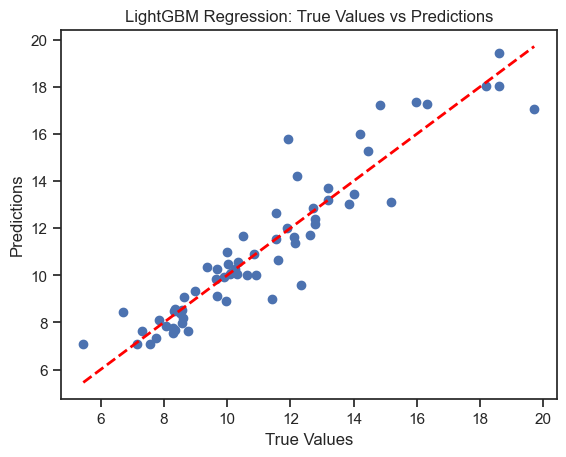

In [85]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the LightGBM Regressor model
lgbm_model = LGBMRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f'LightGBM: RMSE = {rmse_lgbm}, R2 = {r2_lgbm}, MAE = {mae_lgbm}')

# Plot predicted values vs true values
plt.scatter(y_test, y_pred_lgbm)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LightGBM Regression: True Values vs Predictions')
plt.show()


### Support Vector Regressor using Revenue as target variable

Support Vector Regression: RMSE = 2.8770207885950323, R2 = 0.10804554417730117, MAE = 2.1642735714506074


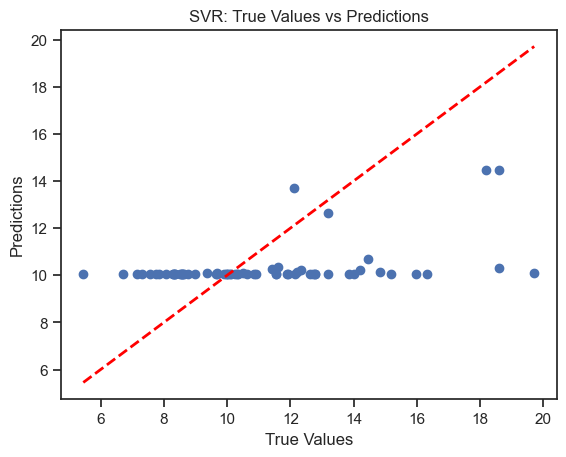

In [86]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the SVR model
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(X_test)

# Calculate and print RMSE, R2, and MAE
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Support Vector Regression: RMSE = {rmse_svr}, R2 = {r2_svr}, MAE = {mae_svr}')

plt.scatter(y_test, y_pred_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR: True Values vs Predictions')
plt.show()


### Neural Networks using Revenue as target variable

Epoch 1/100


2023-12-18 13:48:57.223722: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 11ms/step - loss: 120.6114 - val_loss: 121.9039
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 117.2377 - val_loss: 117.6162
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 113.4965 - val_loss: 113.1147
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 109.6265 - val_loss: 108.1133
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 105.1031 - val_loss: 102.3934
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 99.7873 - val_loss: 96.2070
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 93.9778 - val_loss: 89.2272
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 87.2468 - val_loss: 81.6296
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 79.7567 - val_loss: 73.4845
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 71.5511 - val_loss: 65.2976
Epoch 11/1

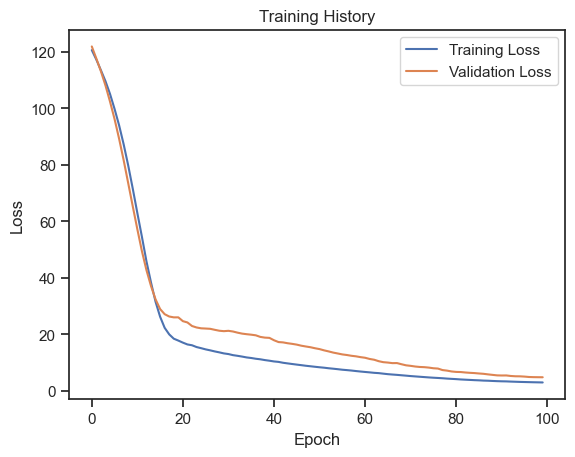

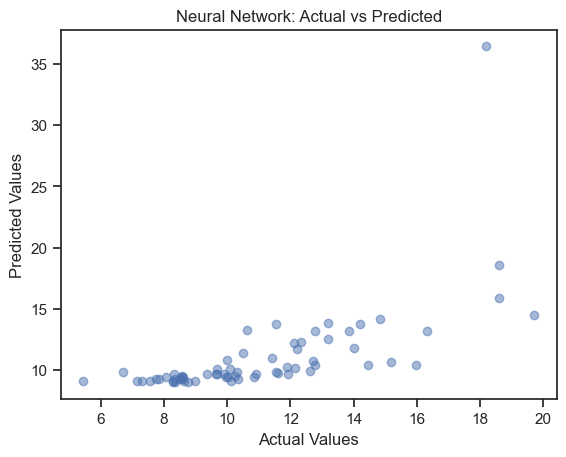

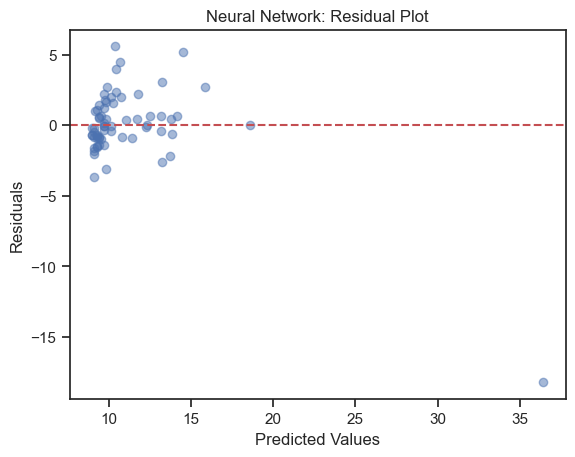

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predictions
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network: RMSE = {rmse_nn}, R2 = {r2_nn}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals_nn = y_test - y_pred_nn.flatten()
plt.scatter(y_pred_nn.flatten(), residuals_nn, alpha=0.5)
plt.title('Neural Network: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


### Comparing and merging the predicted potential customers generated through Random Forest and Catboost

In [88]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv('top_300_potential_customers.csv')
df2 = pd.read_csv('top_300_potential_customers_CBR.csv')

# Merge the DataFrames on the 'CompanyID' column
common_company_ids = pd.merge(df1, df2, on='CompanyID', how='inner')

# Specify the columns you want to display
selected_columns = ['CompanyID', 'Revenue_(in_000s_USD)_x', 'Predicted_Revenue_y', 'Predicted_Revenue_CBR']

# Display the head of 20 companies with specific columns
common_company_ids[selected_columns].head(20)

CompanyID  Revenue_(in_000s_USD)_x  Predicted_Revenue_y  \
0   155353090                20.262490            19.273038   
1   369938550                18.825025            19.110898   
2   459073254                19.483773            19.076607   
3     5851944                17.601113            19.075291   
4    60720958                16.349207            19.067816   
5   459963342                17.507012            19.067816   
6    68863214                16.454568            19.056537   
7   130203765                18.116666            18.995942   
8     3444162                19.733086            18.995942   
9   141738322                19.183449            18.984211   
10    3834943                17.147715            18.979496   
11   13830837                16.523561            18.943165   
12    2508566                18.638991            18.942809   
13   48187827                17.476505            18.941259   
14   41320983                18.727430            18.935751   
15   74203899                17.726253            18.929004   
16   39469842                17.713573            18.923990   
17   93323946                14.706279            18.922586   
18   16220332                18.895355            18.918763   
19   58804259                16.702376            18.917025   

    Predicted_Revenue_CBR  
0               17.796371  
1               19.754037  
2               19.287152  
3               18.790287  
4               18.711077  
5               18.589698  
6               19.287152  
7               18.167157  
8               17.588520  
9               18.857174  
10              18.213826  
11              18.834402  
12              18.568570  
13              18.697503  
14              18.555054  
15              18.440770  
16              19.120187  
17              18.628776  
18              18.903719  
19              19.004270

In [89]:
common_company_ids.to_csv('common_company_ids.csv', index=False)
